# Key Factors that cause Violent Crime within Baltimore

#Intro, Data Mainpulation, and EDA



Group Members: Prudhvi, Pooja, Luis, Alex, Abishek, Joseph

**Question:** What are the features that lead to a high rate of violent crime within a neighborhood in Baltimore from 2010 to 2020?



Intro: Baltimore still has a big problem with violent crime, and this affects the welfare and safety of individuals. This study intends to uncover the factors behind soaring levels of violent crimes witnessed in Baltimore from 2010 to 2020, with specific emphasis on shooting cases, aggravated assaults and murders. In line with these drivers, our findings therefore purport to offer practical solutions that can be used to reduce violent crime while improving community safety at large.

Problem Statement:

* Despite efforts to address crime rates, Baltimore has seen a persistent increase in violent crime, including shootings, aggravated assaults, and homicides, between 2010 and 2020.
* This rise in violent crime has negatively impacted the welfare and safety of individuals in Baltimore, creating a pervasive sense of insecurity and hindering community well-being.
* Understanding the root causes behind this surge in violent crime, such as socio-economic disparities, systemic issues, gang activity, drug trade, and strained community relations with law enforcement, is crucial for effective intervention.
* To address this pressing issue, practical solutions must be developed to target these underlying factors and reduce violent crime rates, ultimately improving community safety and well-being in Baltimore.

## Violent Crime

EDA - Joseph

Violent Crime is defined as shooting, aggravated assault, and homicide.

Target Variable Identified: Violent Crime in Baltimore measured by incident. Violent Crime includes crime labeled as shooting, aggravated assault, or homicide.

Dataset: The violent crime dataset is from baltimorecity.gov which has a downloadable CSV of recent crimes committed within the city of Baltimore between 2010-2020 with various information included for each crime including date, crime code, weapon, gender, race, age, ethnicity just to name a few. Of course, I am filtering it down to only include violent crimes.

Link to violent crime dataset: https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/explore?location=19.686012%2C-38.355650%2C12.00

Total size of my dataset before cleaning: (603402, 23) Total size of my dataset after cleaning and filtering to violent crimes only: (58537, 24)

Number of samples before cleaning: 603402 Number of samples after cleaning: 58537

Portion of missing values: Included with filtering of the 523626 samples above. In our joined dataset at the end there are some NaN values due to the lack of a value in a feature/target variable for a specific neighborhood (NaN values for violent crime dataset: Bellona-Gittings, Blythewood, Dundalk Marine Terminal). This could be for many reasons, but for our purposes we will either change the value to 0 or remove the row depending on which column is NaN.

Outliers: Some neighborhoods have very few or a lot of violent crimes and would be outliers considered outliers in this dataset: Some examples would include, Cedarcroft, Curtis Bay Industrial Area, Forest Park Golf Course, Greenmount Cemetery, Keswick, Belair-Edison, Berea, Broadway East).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

crime_df = pd.read_csv('/content/drive/Shareddrives/602 project /Part_1_Crime_Data.csv')\

#crime_df = pd.read_csv('Part_1_Crime_Data.csv')
crime_df.head()

<ipython-input-4-373223aef98e>:4: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('/content/drive/Shareddrives/602 project /Part_1_Crime_Data.csv')\


X          Y  RowID  CCNumber           CrimeDateTime CrimeCode  \
0 -76.593549  39.357869      1  12H05854  2012/08/11 21:00:00+00        7A   
1 -76.547922  39.336469      2  12H05411  2012/08/11 03:00:00+00        4A   
2 -76.543162  39.348994      3  12H05922  2012/08/11 23:30:00+00        6D   
3 -76.615621  39.295736      4  12H05661  2012/08/11 20:15:00+00        6J   
4 -76.602463  39.292888      5  12H05372  2012/08/11 03:30:00+00        4E   

         Description  Inside_Outside   Weapon   Post Gender   Age  \
0         AUTO THEFT             NaN      NaN  414.0      M   NaN   
1       AGG. ASSAULT             NaN  FIREARM  444.0      M  55.0   
2  LARCENY FROM AUTO             NaN      NaN  425.0    NaN   NaN   
3            LARCENY             NaN      NaN  124.0      F  26.0   
4     COMMON ASSAULT             NaN      NaN  211.0      F  24.0   

                        Race Ethnicity           Location Old_District  \
0                    UNKNOWN       NaN    5600 PURDUE AVE    NORTHEAST   
1  BLACK_OR_AFRICAN_AMERICAN       NaN   4400 LASALLE AVE    NORTHEAST   
2                    UNKNOWN       NaN  6100 FAIRWOOD AVE    NORTHEAST   
3                      WHITE       NaN   500 N CHARLES ST      CENTRAL   
4  BLACK_OR_AFRICAN_AMERICAN       NaN      1100 COMET ST    SOUTHEAST   

  New_District           Neighborhood   Latitude  Longitude  \
0          NaN     WOODBOURNE HEIGHTS  39.357869 -76.593549   
1          NaN              FRANKFORD  39.336469 -76.547922   
2          NaN         GLENHAM-BELHAR  39.348994 -76.543162   
3          NaN           MOUNT VERNON  39.295736 -76.615621   
4          NaN  PLEASANT VIEW GARDENS  39.292888 -76.602463   

                                GeoLocation           PremiseType  \
0                    (39.357869,-76.593549)  STREET                 
1                    (39.336469,-76.547922)     ROW/TOWNHOUSE-OCC   
2                    (39.348994,-76.543162)  PARKING LOT-INSIDE     
3  (39.295735576797313,-76.615620695709538)  STREET                 
4                    (39.292888,-76.602463)     ROW/TOWNHOUSE-OCC   

   Total_Incidents  
0                1  
1                1  
2                1  
3                1  
4                1

In [5]:
print("Amount of samples before cleaning: ")
print(crime_df.shape)
print("\n")

crime_desc = ['AGG. ASSAULT', 'HOMICIDE', 'SHOOTING']
crime_df = crime_df[crime_df['Description'].isin(crime_desc)].copy()

#get data from 2010 to 2020
crime_df['Year'] = crime_df['CrimeDateTime'].astype(str).str[:4]
crime_df = crime_df[(crime_df['Year'].astype(int) >= 2010) & (crime_df['Year'].astype(int) <= 2020)]


print("Amount of samples that are a violent crime: ")
print(crime_df.shape)

crime_df = crime_df.dropna(subset=['Neighborhood'])

Amount of samples before cleaning: 
(603402, 23)


Amount of samples that are a violent crime: 
(58537, 24)


In [6]:
# count the number of violent crimes within each neighborhood
nei_count = crime_df.groupby('Neighborhood').size().reset_index(name='Violent_Crimes')

nei_count

Neighborhood  Violent_Crimes
0            ABELL              96
1        ALLENDALE             338
..             ...             ...
273   YALE HEIGHTS             156
274  YORK-HOMELAND              20

[275 rows x 2 columns]

As you can see above, after data manipulation and data cleaning we have 274 Baltimore neighborhoods that are matched with their Violent Crime Count from 2010-2020.

##Vacant Building Notices

EDA - Alex

https://data.baltimorecity.gov/datasets/baltimore::vacant-building-notices/explore?location=39.296363%2C-76.620458%2C10.60&showTable=true

Dataset shows the vacant and building notices per property. Quantified to show the amount of vancancies by each negihborhood from 2010-2020.

In [7]:
import numpy as np
import pandas as pd

# Importing dataset
house_df = pd.read_csv("/content/drive/Shareddrives/602 project /Vacant_Building_Notices.csv")
#house_df = pd.read_csv("Vacant_Building_Notices.csv")
house_df.head()

X              Y  OBJECTID NoticeNum              DateNotice  \
0  1.411074e+06  598468.355480    723192   805231A  2012/01/25 15:37:00+00   
1  1.411088e+06  598469.087434    723193  1780434A  2019/04/20 08:55:00+00   
2  1.411131e+06  598471.043467    723196   927919A  2013/02/01 14:19:00+00   
3  1.411144e+06  598471.677324    723197  2106499A  2022/05/13 16:20:00+00   
4  1.411214e+06  598474.912882    723202  2078873A  2022/02/10 16:01:00+00   

   DateCancel  DateAbate      NT OWNER_ABBR HousingMarketTypology2017  \
0         NaN        NaN  Vacant        NaN                         I   
1         NaN        NaN  Vacant        NaN                         I   
2         NaN        NaN  Vacant        NaN                         I   
3         NaN        NaN  Vacant        NaN                         I   
4         NaN        NaN  Vacant        NaN                         I   

   Council_District                               Neighborhood  BLOCKLOT  \
0                 7  EASTERWOOD                                 0001 003   
1                 7  EASTERWOOD                                 0001 004   
2                 7  EASTERWOOD                                 0001 007   
3                 7  EASTERWOOD                                 0001 008   
4                 7  EASTERWOOD                                 0001 013   

            Address  
0  2041 W NORTH AVE  
1  2039 W NORTH AVE  
2  2033 W NORTH AVE  
3  2031 W NORTH AVE  
4  2021 W NORTH AVE

In [8]:
#get data from 2010 to 2020
print(house_df.shape)
house_df['Year'] = house_df['DateNotice'].astype(str).str[:4]
house_df = house_df[(house_df['Year'].astype(int) >= 2010) & (house_df['Year'].astype(int) <= 2020)]
house_df.shape

(13565, 14)


(5865, 15)

In [9]:
# Listing Neighborhoods with the amount of vancancies each one has
house_count = house_df.groupby('Neighborhood').size().reset_index(name='Vacancies')

#house_count = house_count.sort_values(ascending=False)

# Showing the original datasaet points
print('Number of sample points of dataset:', house_df.shape, '\n')

# Showing the sample points of the modified dataset
print('Number of sample points of the houses in each neighborhood:', house_count.shape, '\n')

# Displaying the modified dataset to see how many vacancies there are for each neighborhood
print(house_count)

Number of sample points of dataset: (5865, 15) 

Number of sample points of the houses in each neighborhood: (189, 2) 

                                  Neighborhood  Vacancies
0    ABELL                                              2
1    ALLENDALE                                         29
..                                         ...        ...
187  WRENLANE                                           1
188  YALE HEIGHTS                                       1

[189 rows x 2 columns]


In [10]:
house_count['Neighborhood'] = house_count['Neighborhood'].str.strip()
house_count

Neighborhood  Vacancies
0           ABELL          2
1       ALLENDALE         29
..            ...        ...
187      WRENLANE          1
188  YALE HEIGHTS          1

[189 rows x 2 columns]

## GUN OFFENDER REGISTRY

EDA - Luis

Link for gun offender registry dataset:
https://data.baltimorecity.gov/datasets/8cb25420508541b1ac6d9489b8ad0864_0/explore?location=0.934930%2C-76.620550%2C0.00&showTable=true

The following data frame shows the number of gun offender registry events for each registry after cleaning and formatting the individual dataset:

This dataset contains, (after cleaning up, the number of vacancies present in each listed neighborhood. However, the website is always updating, so the number is always fluctuating depending on when the dataset was downloaded at a certain time.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import pandas as pd

# gun_off_df = pd.read_csv('Gun_Offenders_Registry.csv')
gun_off_df=pd.read_csv('/content/drive/Shareddrives/602 project /Gun_Offenders_Registry.csv')
# gun_off_df.head()

print(gun_off_df.shape)

#get data from 2010 to 2020
gun_off_df['Year'] = gun_off_df['CreatedDate'].astype(str).str[:4]
gun_off_df = gun_off_df[(gun_off_df['Year'].astype(int) >= 2010) & (gun_off_df['Year'].astype(int) <= 2020)]
gun_off_df.shape

(3494, 23)


(1249, 24)

In [13]:
# Listing Neighborhoods with the amount of gun offender count each one has
gun_count = gun_off_df.groupby('Neighborhood').size().reset_index(name='Gun offenders')

#house_count = house_count.sort_values(ascending=False)

# Showing the original datasaet points
print('Number of sample points of dataset:', gun_off_df.shape, '\n')

# Showing the sample points of the modified dataset
print('Number of sample points of the gun offender count in each neighborhood:', gun_count.shape, '\n')

# Displaying the modified dataset to see how many vacancies there are for each neighborhood
print(gun_count)

Number of sample points of dataset: (1249, 24) 

Number of sample points of the gun offender count in each neighborhood: (190, 2) 

     Neighborhood  Gun offenders
0           Abell              2
1       Allendale              9
..            ...            ...
188      Wrenlane              1
189  Yale Heights              5

[190 rows x 2 columns]


In [14]:
# Grouping by Neighborhood
gun_off_df1 = gun_off_df.groupby('Neighborhood').size().reset_index(name='Gun_Offender_Count')

#making neighborhoods all caps
gun_off_df1['Neighborhood'] = gun_off_df1['Neighborhood'].str.upper()

gun_off_df1


Neighborhood  Gun_Offender_Count
0           ABELL                   2
1       ALLENDALE                   9
..            ...                 ...
188      WRENLANE                   1
189  YALE HEIGHTS                   5

[190 rows x 2 columns]

In [15]:
neighborhood_counts = gun_off_df1['Neighborhood'].value_counts()
num_unique_neighborhoods = len(neighborhood_counts)
unique_neighborhoods = neighborhood_counts.index.tolist()

print("Number of unique neighborhoods:", num_unique_neighborhoods)
print("Unique neighborhoods:")
print(unique_neighborhoods)



Number of unique neighborhoods: 190
Unique neighborhoods:
['ABELL', 'PATTERSON PARK NEIGHBORHOOD', 'OLDTOWN', 'OLIVER', 'ORCHARD RIDGE', 'ORIGINAL NORTHWOOD', 'PANWAY/BRADDISH AVENUE', 'PARK CIRCLE', 'PARKLANE', 'PARKSIDE', 'PARKVIEW/WOODBROOK', 'PATTERSON PLACE', "O'DONNELL HEIGHTS", 'PEN LUCY', 'PENN NORTH', 'PENN-FALLSWAY', 'PENROSE/FAYETTE STREET OUTREACH', 'PERKINS HOMES', 'PERRING LOCH', 'PIMLICO GOOD NEIGHBORS', 'PLEASANT VIEW GARDENS', 'POPPLETON', 'OAKLEE', 'NORTHWEST COMMUNITY ACTION', 'RAMBLEWOOD', 'MILLHILL', 'LUCILLE PARK', 'MADISON PARK', 'MADISON-EASTEND', 'MCELDERRY PARK', 'MEDFORD', 'MID-GOVANS', 'MID-TOWN BELVEDERE', 'MIDDLE EAST', 'MIDTOWN-EDMONDSON', 'MILTON-MONTFORD', 'NORTH HARFORD ROAD', 'MONDAWMIN', 'MORAVIA-WALTHER', 'MORRELL PARK', 'MOSHER', 'MOUNT HOLLY', 'MOUNT VERNON', 'MOUNT WINANS', 'NEW NORTHWOOD', 'NEW SOUTHWEST/MOUNT CLARE', 'PURNELL', 'REISTERSTOWN STATION', 'ALLENDALE', 'WESTGATE', 'WALBROOK', 'WALTHERSON', 'WASHINGTON HILL', 'WASHINGTON VILLAGE/PIGT

## Baltimore city arrests

EDA - Pooja

Link for BDP arrests dataset: https://data.baltimorecity.gov/datasets/bpd-arrests/explore?location=38.975551%2C-76.515650%2C8.93

Baltimore city arrests (arrest charges, such as assault, larceny, destruction of property)


The dataset was initially made up of 370,757 records, giving out information such as the geographical, demographic and offense related nature of each arrest event.
* Post-Cleaning Overview:
* Entries Before Cleaning: 370,757
* Entries After Cleaning: 370,571
* Total Entries Removed: 186
* Duplicate Entries Identified and Removed: 0




In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/drive/Shareddrives/602 project /BPD_Arrests.csv')


print(dataset.shape)

#get data from 2010 to 2020
dataset['Year'] = dataset['ArrestDateTime'].astype(str).str[:4]
dataset = dataset[(dataset['Year'].astype(int) >= 2010) & (dataset['Year'].astype(int) <= 2020)]
dataset.shape

(370757, 20)


(331293, 21)

In [17]:
dataset.head()

X            Y  RowID IncidentNumber  ArrestNumber   Age Gender  \
70  1406816.356  597714.6559     71       20A08559    21000024.0  27.0      M   
71  1412034.573  594711.1039     72       21L07949    21000021.0  45.0      F   
72  1404205.426  583937.1638     73            NaN    21000011.0  42.0      F   
73  1418787.105  576817.7303     74       20L08536    21000006.0  26.0      M   
74  1418787.105  576817.7303     75       20L08536    21000014.0  19.0      M   

   Race          ArrestDateTime         ArrestLocation  \
70    B  2020/12/31 23:50:00+00       2900 PRESBURY ST   
71    B  2020/12/31 23:45:00+00          900 MONROE ST   
72    W  2020/12/31 23:40:00+00  1000 PINE HEIGHTS AVE   
73    B  2020/12/31 21:45:00+00     700 CHERRY HILL RD   
74    B  2020/12/31 21:45:00+00     700 CHERRY HILL RD   

           IncidentOffence       IncidentLocation  Charge   ChargeDescription  \
70   96BINVESTIGATIVE STOP       2900 PRESBURY ST  1 0692  HAND GUN VIOLATION   
71  5FBURG. OTH. (NOFORCE)          900 MONROE ST  2 0480          AUTO THEFT   
72         Unknown Offense  1000 PINE HEIGHTS AVE  1 1415  2ND DEGREE ASSAULT   
73         Unknown Offense     700 CHERRY HILL RD  1 0233                PWID   
74         Unknown Offense     700 CHERRY HILL RD  1 0233                PWID   

     District   Post                Neighborhood  Latitude  Longitude  \
70  Southwest  813.0  Northwest Community Action   39.3074   -76.6661   
71    Western  722.0           Midtown-Edmondson   39.2991   -76.6477   
72  Southwest  832.0                 Violetville   39.2696   -76.6755   
73   Southern  922.0                 Cherry Hill   39.2499   -76.6241   
74   Southern  922.0                 Cherry Hill   39.2499   -76.6241   

           GeoLocation  Year  
70  (39.3074,-76.6661)  2020  
71  (39.2991,-76.6477)  2020  
72  (39.2696,-76.6755)  2020  
73  (39.2499,-76.6241)  2020  
74  (39.2499,-76.6241)  2020

In [18]:
# Step 1: Handling Missing Values
# For demonstration, we'll flag missing values for key columns and drop rows where critical information is missing.
# We'll consider 'ArrestDateTime', 'Age', 'Gender', 'Race', and 'ChargeDescription' as critical for this example.

critical_columns = ['ArrestDateTime', 'Age', 'Gender', 'Race', 'ChargeDescription']
data_cleaned = dataset.dropna(subset=critical_columns)

# Step 2: Checking for and Removing Duplicate Entries
data_cleaned = data_cleaned.drop_duplicates()

# Step 3: Ensuring Consistency in Date Formats
data_cleaned['ArrestDateTime'] = pd.to_datetime(data_cleaned['ArrestDateTime'], errors='coerce')

# Checking the result of cleaning
cleaning_summary = {
    "original_rows": dataset.shape[0],
    "cleaned_rows": data_cleaned.shape[0],
    "removed_rows": dataset.shape[0] - data_cleaned.shape[0],
    "duplicate_rows_removed": dataset.shape[0] - dataset.drop_duplicates().shape[0]
}
cleaning_summary



{'original_rows': 331293,
 'cleaned_rows': 331168,
 'removed_rows': 125,
 'duplicate_rows_removed': 0}

In [19]:
# Grouping by neighborhood
dataset_df = dataset.groupby('Neighborhood').size().reset_index(name='Arrests')

dataset_df['Neighborhood'] = dataset_df['Neighborhood'].str.upper()

dataset_df


Neighborhood  Arrests
0            ABELL      280
1        ALLENDALE      889
..             ...      ...
274   YALE HEIGHTS      233
275  YORK-HOMELAND       47

[276 rows x 2 columns]

In [20]:
datasetdf2 = dataset.groupby('ChargeDescription').size().reset_index(name='Count')
datasetdf2_sorted = datasetdf2.sort_values(by='ChargeDescription', ascending=True)

datasetdf2_sorted


ChargeDescription  Count
0      !ST DEGREE ASSAUALT      1
1       !ST DEGREE ASSAULT      3
...                    ...    ...
12912            WRONG WAY      1
12913   ZND DEGREE ASSAULT      1

[12914 rows x 2 columns]

##ENVIRONMENTAL CITATIONS

EDA - VENKATA PRUDHVI

Link for the environmental dataset: https://data.baltimorecity.gov/datasets/ff02bcc083724c2e84f6be1f4d05b450_0/explore

In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/Shareddrives/602 project /Environmental_Citations.csv')

print(data.shape)

#get data from 2010 to 2020
data['Year'] = data['ViolationDate'].astype(str).str[:4]
data = data[(data['Year'].astype(int) >= 2010) & (data['Year'].astype(int) <= 2020)]
data.shape


(16000, 31)


(9500, 32)

In [22]:
# Display the first few rows of the dataset to understand its structure
data.head()

OBJECTID  CitationNo LienCode           ViolationDate  \
54        55     2985455        N  2017/01/06 05:00:00+00   
55        56     2988384        N  2016/05/08 04:00:00+00   
56        57     2988392        N  2016/05/08 04:00:00+00   
57        58     2988426        N  2016/05/11 04:00:00+00   
58        59     2988434        N  2016/05/11 04:00:00+00   

                   DueDate                                             Agency  \
54  2017/02/10 05:00:00+00  BALTIMORE CITY FIRE DEPARTMENT                ...   
55  2016/06/07 04:00:00+00  BALTIMORE CITY FIRE DEPARTMENT                ...   
56  2016/06/07 04:00:00+00  BALTIMORE CITY FIRE DEPARTMENT                ...   
57  2016/06/10 04:00:00+00  BALTIMORE CITY FIRE DEPARTMENT                ...   
58  2016/06/10 04:00:00+00  BALTIMORE CITY FIRE DEPARTMENT                ...   

    FineAmount                                        Description  Balance  \
54         500  OCCUPANCY PROHIBITED BEFORE APPROVAL          ...   1500.0   
55         250  FAILURE TO COMPLY                             ...    750.0   
56         200  PERMITS REQUIRED                              ...    600.0   
57         200  UNSAFE CONDITIONS                             ...    600.0   
58         250  UNSAFE CONDITIONS                             ...    750.0   

   LastPaidDate  LastPaidAmount HearingDate HearingRequestReceivedDate  \
54          NaN             0.0         NaN                        NaN   
55          NaN             0.0         NaN                        NaN   
56          NaN             0.0         NaN                        NaN   
57          NaN             0.0         NaN                        NaN   
58          NaN             0.0         NaN                        NaN   

   CitationStatus ViolationCodeArticle ViolationCodeSection  \
54       O                    IF                 105.3.3      
55       O                    IF                 111.4        
56       O                    IF                 105.1.1      
57       O                    IF                 110.1.1      
58       O                    IF                 110.1.1      

     ViolationLocation  Block   Lot OfficerID OfficerPresenceRequested  \
54   1129 MARYLAND AVE                   1185                            
55  1803 FREDERICK AVE                   42                              
56  1803 FREDERICK AVE                   43                              
57  1803 FREDERICK AVE                   42                              
58  1803 FREDERICK AVE                   42                              

   HearingStatus HearTime  TotalPaid  TotalAbated  TotalVoided   Neighborhood  \
54                               0.0          0.0          0.0  Broadway East   
55                               0.0          0.0          0.0  Broadway East   
56                               0.0          0.0          0.0  Broadway East   
57                               0.0          0.0          0.0  Broadway East   
58                               0.0          0.0          0.0  Broadway East   

   PoliceDistrict  CouncilDistrict                    Location  \
54        Eastern             12.0  (39.30939394,-76.58893951)   
55        Eastern             12.0  (39.30939394,-76.58893951)   
56        Eastern             12.0  (39.30939394,-76.58893951)   
57        Eastern             12.0  (39.30939394,-76.58893951)   
58        Eastern             12.0  (39.30939394,-76.58893951)   

                                GlobalID  Year  
54  31da6c14-6b9f-405f-9dd0-3f89e17d31b3  2017  
55  b32dbb53-5c14-4547-a0bb-2635abd437dd  2016  
56  5b3ac806-f97e-4570-ae57-91423ec10f00  2016  
57  17b9a4f3-5f4a-47a0-bc96-076201e6af16  2016  
58  561a17c3-1439-4e4c-aff2-00aa039828d1  2016

In [23]:
# Grouping by Neighborhood and counting the citations
citations_by_neighborhood = data.groupby('Neighborhood').size().reset_index(name='CitationsCount')

# Converting 'Neighborhood' to uppercase for consistency
citations_by_neighborhood['Neighborhood'] = citations_by_neighborhood['Neighborhood'].str.upper()

# Sorting the dataset by 'Neighborhood'
citations_by_neighborhood_sorted = citations_by_neighborhood.sort_values(by='Neighborhood', ascending=True)

# Grouping by Description and counting the citations
citations_by_description = data.groupby('Description').size().reset_index(name='Count')
citations_by_description_sorted = citations_by_description.sort_values(by='Description', ascending=True)

citations_by_neighborhood_sorted, citations_by_description_sorted


(     Neighborhood  CitationsCount
 0           ABELL               3
 1       ALLENDALE              10
 ..            ...             ...
 206     WYNDHURST               1
 207  YALE HEIGHTS               3
 
 [208 rows x 2 columns],
                                            Description  Count
 0    ABANDONMENT OF ANIMAL                         ...     11
 1    ADVERTISEMENT - MISREPRESENTING FROZEN FOOD AS...      1
 ..                                                 ...    ...
 134  WALKING SURFACES NOT CLEANED AN FREE OF TRASH ...      1
 135  WORK WITHOUT PROPER PERMIT                    ...     15
 
 [136 rows x 2 columns])

##311 service requests


311 service requests are non-emergency requests made by residents to city authorities. These requests cover a wide range of issues like noise complaints, pothole repairs, and trash collection etc

[Link for the 311 service requests data](https://drive.google.com/drive/folders/1FU5yCt5MhncSc297j4RJThmzzn_KzXYc?usp=share_link)

EDA - Abishek

In [24]:
# Donot run unless the data is as in the specified path
'''

# merging data from different years and only keeping necessary features

from google.colab import drive
import pandas as pd


path = '/content/drive/My Drive/311 Data/311_Customer_Service_Requests_{}.csv'


years = range(2010, 2021)
dataframes = []

for year in years:
    file_path = path.format(year)
    # Load data with specified columns
    df = pd.read_csv(file_path, usecols=[
        'SRType', 'MethodReceived', 'CreatedDate',
        'Agency', 'Outcome', 'ZipCode',
        'Neighborhood', 'PoliceDistrict'
    ],dtype={'ZipCode': str}, low_memory=False)

    # Adding the 'Year' column
    df['Year'] = year
    df = df.dropna(subset=['Neighborhood'])
    # Append cleaned DataFrame to the list
    dataframes.append(df)

# Merge all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to Google Drive
# combined_df.to_csv('/content/drive/My Drive/311 Data/311_Customer_Service_Requests_2010_20.csv', index=False)

combined_df.to_csv('/content/drive/My Drive/311 Data/311_Customer_Service_Requests_2010_20.csv', index=False)

print(combined_df.info())
print(combined_df.head())

'''

"\n\n# merging data from different years and only keeping necessary features\n\nfrom google.colab import drive\nimport pandas as pd\n\n\npath = '/content/drive/My Drive/311 Data/311_Customer_Service_Requests_{}.csv'\n\n\nyears = range(2010, 2021)\ndataframes = []\n\nfor year in years:\n    file_path = path.format(year)\n    # Load data with specified columns\n    df = pd.read_csv(file_path, usecols=[\n        'SRType', 'MethodReceived', 'CreatedDate',\n        'Agency', 'Outcome', 'ZipCode',\n        'Neighborhood', 'PoliceDistrict'\n    ],dtype={'ZipCode': str}, low_memory=False)\n\n    # Adding the 'Year' column\n    df['Year'] = year\n    df = df.dropna(subset=['Neighborhood'])\n    # Append cleaned DataFrame to the list\n    dataframes.append(df)\n\n# Merge all DataFrames into one\ncombined_df = pd.concat(dataframes, ignore_index=True)\n\n# Save the combined DataFrame to Google Drive\n# combined_df.to_csv('/content/drive/My Drive/311 Data/311_Customer_Service_Requests_2010_20.csv',

In [25]:
# using data obtained by previous merging

df_311=pd.read_csv('/content/drive/Shareddrives/602-311 service requests/311_Customer_Service_Requests_2010_20.csv')

<ipython-input-25-0de451a6d7c0>:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311=pd.read_csv('/content/drive/Shareddrives/602-311 service requests/311_Customer_Service_Requests_2010_20.csv')


In [26]:
df_311.shape

(6332575, 9)

In [27]:
print(df_311.isnull().sum())


SRType                0
MethodReceived    19479
                  ...  
PoliceDistrict    16647
Year                  0
Length: 9, dtype: int64


In [28]:
# Print the list of column names in the DataFrame
print(df_311.columns)


Index(['SRType', 'MethodReceived', 'CreatedDate', 'Agency', 'Outcome',
       'ZipCode', 'Neighborhood', 'PoliceDistrict', 'Year'],
      dtype='object')


In [29]:
df_311.head()

SRType MethodReceived             CreatedDate  \
0  SW-Rat Rubout Proactive       Internal  2010/10/08 20:00:00+00   
1  SW-Rat Rubout Proactive       Internal  2010/10/08 20:00:00+00   
2  SW-Rat Rubout Proactive       Internal  2010/10/08 20:00:00+00   
3  SW-Rat Rubout Proactive       Internal  2010/10/08 20:00:00+00   
4  SW-Rat Rubout Proactive       Internal  2010/10/08 20:00:00+00   

        Agency Outcome  ZipCode     Neighborhood PoliceDistrict  Year  
0  Solid Waste     NaN  21206.0  Belair-Parkside   NORTHEASTERN  2010  
1  Solid Waste     NaN  21206.0  Belair-Parkside   NORTHEASTERN  2010  
2  Solid Waste     NaN  21206.0  Belair-Parkside   NORTHEASTERN  2010  
3  Solid Waste     NaN  21206.0  Belair-Parkside   NORTHEASTERN  2010  
4  Solid Waste     NaN  21213.0    Belair-Edison   NORTHEASTERN  2010

In [30]:
print(df_311.describe())

               Year
count  6.332575e+06
mean   2.015396e+03
...             ...
75%    2.018000e+03
max    2.020000e+03

[8 rows x 1 columns]


In [31]:
print(df_311.nunique())


SRType            343
MethodReceived     12
                 ... 
PoliceDistrict     20
Year               11
Length: 9, dtype: int64


In [32]:
df_311['Neighborhood'] = df_311['Neighborhood'].str.upper()


In [33]:
#number of reports per neighborhood
neighborhood_counts = df_311['Neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'ReportCount']
print(neighborhood_counts.head(10))



            Neighborhood  ReportCount
0          BELAIR-EDISON       182066
1                 CANTON       126146
..                   ...          ...
8       CARROLLTON RIDGE        91042
9   CENTRAL PARK HEIGHTS        83378

[10 rows x 2 columns]


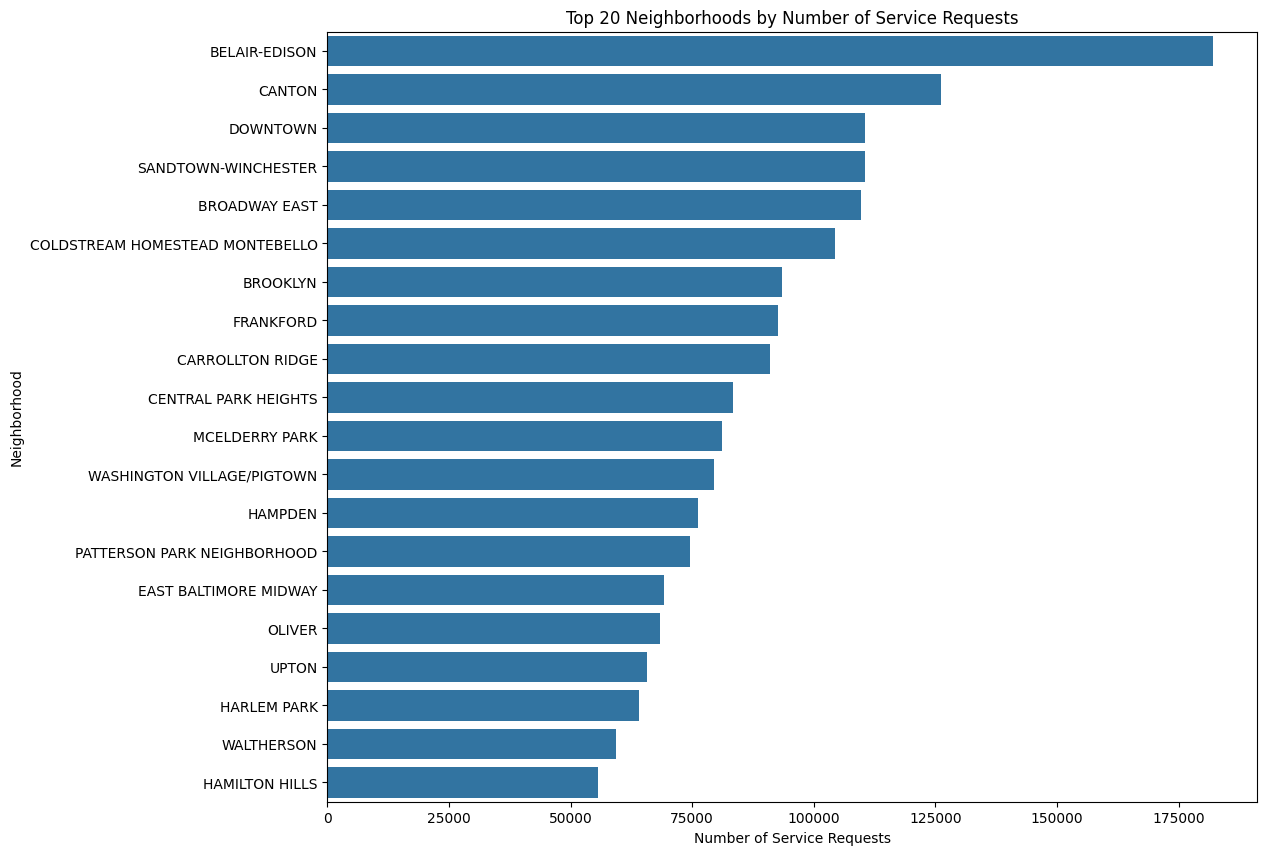

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the number of reports per neighborhood
plt.figure(figsize=(12, 10))
sns.barplot(y='Neighborhood', x='ReportCount', data=neighborhood_counts.head(20))
plt.title('Top 20 Neighborhoods by Number of Service Requests')
plt.xlabel('Number of Service Requests')
plt.ylabel('Neighborhood')
plt.show()

In [35]:
top_10_neighborhood_list = df_311['Neighborhood'].value_counts().head(10).index.tolist()
print(top_10_neighborhood_list)

['BELAIR-EDISON', 'CANTON', 'DOWNTOWN', 'SANDTOWN-WINCHESTER', 'BROADWAY EAST', 'COLDSTREAM HOMESTEAD MONTEBELLO', 'BROOKLYN', 'FRANKFORD', 'CARROLLTON RIDGE', 'CENTRAL PARK HEIGHTS']


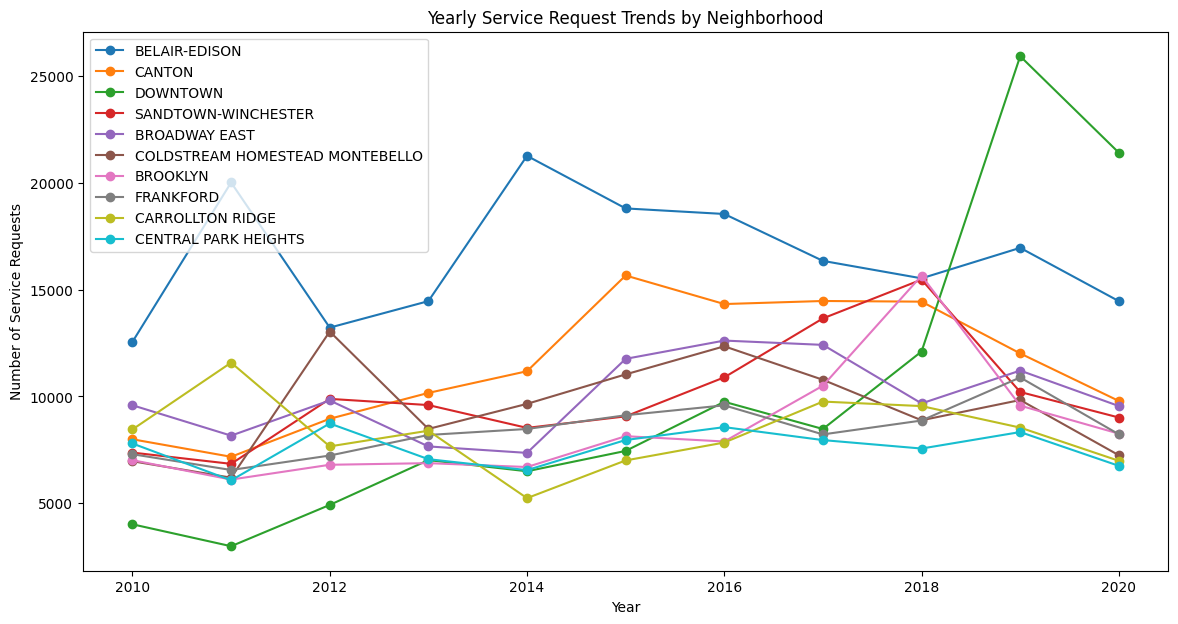

In [36]:
#Creating a pivot table to see the trend of reports over the years by neighborhood

neighborhood_trends = df_311.pivot_table(index='Year', columns='Neighborhood', values='SRType', aggfunc='count')
neighborhood_trends = neighborhood_trends.fillna(0)  # Replaceing NaN with 0 for years where no reports were filed

# Plotting trends for specific neighborhoods
plt.figure(figsize=(14, 7))
neighborhoods_to_plot = top_10_neighborhood_list # Adjust this list based on neighborhoods of interest
for neighborhood in neighborhoods_to_plot:
    plt.plot(neighborhood_trends.index, neighborhood_trends[neighborhood], marker='o', label=neighborhood)
plt.title('Yearly Service Request Trends by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Number of Service Requests')
plt.legend()
plt.show()


In [37]:
df_311['Neighborhood']=df_311['Neighborhood'].str.upper()

In [38]:
unique_nb= sorted(df_311['Neighborhood'].unique())
print(len(unique_nb))
print(unique_nb)

292
['ABELL', 'ALLENDALE', 'ARCADIA', 'ARLINGTON', 'ARMISTEAD GARDENS', 'ASHBURTON', 'BALTIMORE HIGHLANDS', 'BALTIMORE-LINWOOD', 'BARCLAY', 'BARRE CIRCLE', 'BAYVIEW', 'BEECHFIELD', 'BELAIR-EDISON', 'BELAIR-PARKSIDE', 'BELLONA-GITTINGS', 'BELVEDERE', 'BEREA', 'BETTER WAVERLY', 'BEVERLY HILLS', 'BIDDLE STREET', 'BLYTHEWOOD', 'BOLTON HILL', 'BOOTH-BOYD', 'BOYD-BOOTH', 'BREWERS HILL', 'BRIDGEVIEW/GREENLAWN', 'BROADWAY EAST', 'BROENING MANOR', 'BROOKLYN', 'BURLEITH-LEIGHTON', "BUTCHER'S HILL", 'CALLAWAY-GARRISON', 'CAMERON VILLAGE', 'CANTON', 'CANTON INDUSTRIAL AREA', 'CARE', 'CARROLL - CAMDEN INDUSTRIAL AREA', 'CARROLL PARK', 'CARROLL-SOUTH HILTON', 'CARROLLTON RIDGE', 'CEDARCROFT', 'CEDMONT', 'CEDONIA', 'CENTRAL FOREST PARK', 'CENTRAL PARK HEIGHTS', 'CHARLES NORTH', 'CHARLES VILLAGE', 'CHERRY HILL', 'CHESWOLDE', 'CHINQUAPIN PARK', 'CHINQUAPIN PARK-BELVEDERE', 'CHRISTOPHER', 'CLAREMONT-FREEDOM', 'CLIFTON PARK', 'COLDSPRING', 'COLDSTREAM HOMESTEAD MONTEBELLO', 'CONCERNED CITIZENS OF FOREST 

In [39]:
top_10_neighborhood_list = df_311['Neighborhood'].value_counts().head(10).index.tolist()
print(top_10_neighborhood_list)

['BELAIR-EDISON', 'CANTON', 'DOWNTOWN', 'SANDTOWN-WINCHESTER', 'BROADWAY EAST', 'COLDSTREAM HOMESTEAD MONTEBELLO', 'BROOKLYN', 'FRANKFORD', 'CARROLLTON RIDGE', 'CENTRAL PARK HEIGHTS']


In [40]:

# Count the occurrences of each neighborhood
cnt = df_311['Neighborhood'].value_counts()

# Create a DataFrame from the counts
cnt_311_df = pd.DataFrame(cnt).reset_index()

# Rename the columns to 'Neighborhood' and 'Count'
cnt_311_df.columns = ['Neighborhood', '311 Req']
cnt_311_df

Neighborhood  311 Req
0    BELAIR-EDISON   182066
1           CANTON   126146
..             ...      ...
290           EAST        1
291           WEST        1

[292 rows x 2 columns]

##2020 Census Population, Male, Female, Med_Age, Square Area

EDA - Joseph

Link to dataset: https://data.baltimorecity.gov/datasets/8112521d3e284518b9fa497a188bfb45_0/explore

In [41]:
# Importing dataset
pop_df = pd.read_csv("/content/drive/Shareddrives/602 project /Neighborhoods_NSA.csv")
pop_df.head()

OBJECTID                                GlobalID  \
0         1  {B7BB065F-004A-45C5-9725-FF3192EC7E7B}   
1         2  {6C9FDB1D-34E5-41AD-AB20-3A5356C82999}   
2         3  {8C224625-0E52-4740-A6CB-2609673AE917}   
3         4  {3DAD706F-5B48-4726-B644-74449660C61A}   
4         5  {AB768767-7B70-4DFA-924D-DA17FB48A0F6}   

                         Name  Population  White  Blk_AfAm  AmInd_AkNa  Asian  \
0                  Beechfield        4013    462      3191           3    108   
1             Belair-Parkside         449     91       302           2     12   
2  Curtis Bay Industrial Area          20      6         8           0      0   
3                    Eastwood         764    314        81           4      7   
4     Forest Park Golf Course         358     14       305           5      2   

   NatHaw_Pac  Other_Race  TwoOrMore  Hisp_Lat  Male  Female  Total_Units  \
0           0         105        144       164  1820    2193         1721   
1           0           4         38        17   207     242          174   
2           0           6          0         4     8      12            1   
3           0         301         57       377   339     425          286   
4           0          27          5        13   164     194          135   

   Occ_Occupied  Occ_Vacant  Tenure_Owner  Tenure_Renter  Vacant_ForRent  \
0          1592         129           914            678              82   
1           152          22            92             60               0   
2             1           0             0              1               0   
3           272          14           126            146               9   
4           123          12            92             31               7   

   Vacant_ForSale  Vacant_Other_All  HH_Total  HH_Family  HH_Married  \
0               9                38      1592       1013         403   
1              12                10       152        104          48   
2               0                 0         1          0           0   
3               0                 5       272        156          94   
4               0                 5       123         81          28   

   HH_OtherFamily  HH_Male_NoSpouse  HH_Female_NoSpouse  HH_NonFamily  \
0             610               115                 495           579   
1              56                13                  43            48   
2               0                 0                   0             1   
3              62                18                  44           116   
4              53                 4                  49            42   

   HH_NonFamilyAlone  HH_NonFamilyNotAlone  HH18_With18  HH18_FamilyWith18  \
0                476                   103          511                505   
1                 39                     9           62                 62   
2                  0                     1            0                  0   
3                 96                    20          105                103   
4                 36                     6           36                 36   

   HH18_NonFamilyWith18  HH18_No18  HH18_FamilyNo18  HH18_NonFamilyNo18  \
0                     6       1081              508                 573   
1                     0         90               42                  48   
2                     0          1                0                   1   
3                     2        167               53                 114   
4                     0         87               45                  42   

   Age_U5  Age_5_9  Age_10_14  Age_15_17  Age_18_21  Age_22_24  Age_25_29  \
0     280      258        254         82        216        139        299   
1      26       21         33         12         15         15         35   
2       5        6          0          1          1          0          0   
3      60       47         71         10         47         31         76   
4      19       12         24          9         12         12         21   

   Age_30_

In [42]:
pop_df.describe()

OBJECTID    Population         White      Blk_AfAm  AmInd_AkNa  \
count     279.0    279.000000    279.000000    279.000000  279.000000   
mean      140.0   2099.290323    584.318996   1213.172043    8.286738   
...         ...           ...           ...           ...         ...   
75%       209.5   2677.500000    562.500000   1634.500000    9.000000   
max       279.0  17135.000000  10408.000000  14596.000000   90.000000   

             Asian  NatHaw_Pac   Other_Race   TwoOrMore     Hisp_Lat  \
count   279.000000  279.000000   279.000000  279.000000   279.000000   
mean     76.021505    0.666667   100.523297  116.301075   164.612903   
...            ...         ...          ...         ...          ...   
75%      54.000000    1.000000    61.500000  134.500000   140.000000   
max    2094.000000    9.000000  1927.000000  957.000000  2636.000000   

              Male       Female  Total_Units  Occ_Occupied  Occ_Vacant  \
count   279.000000   279.000000   279.000000    279.000000  279.000000   
mean    984.351254  1114.939068  1051.039427    901.326165  149.713262   
...            ...          ...          ...           ...         ...   
75%    1222.500000  1415.000000  1314.000000   1106.000000  196.000000   
max    7764.000000  9371.000000  7848.000000   7226.000000  928.000000   

       Tenure_Owner  Tenure_Renter  Vacant_ForRent  Vacant_ForSale  \
count    279.000000     279.000000       279.00000      279.000000   
mean     390.681004     510.645161        62.97491       14.322581   
...             ...            ...             ...             ...   
75%      482.000000     647.000000        79.50000       19.000000   
max     3826.000000    4556.000000       820.00000      153.000000   

       Vacant_Other_All     HH_Total    HH_Family   HH_Married  \
count        279.000000   279.000000   279.000000   279.000000   
mean          72.415771   901.326165   453.014337   207.681004   
...                 ...          ...          ...          ...   
75%           93.500000  1106.000000   570.500000   247.500000   
max          597.000000  7226.000000  4152.000000  1925.000000   

       HH_OtherFamily  HH_Male_NoSpouse  HH_Female_NoSpouse  HH_NonFamily  \
count      279.000000        279.000000          279.000000    279.000000   
mean       245.333333         53.043011          192.290323    448.311828   
...               ...               ...                 ...           ...   
75%        315.000000         72.000000          244.500000    531.500000   
max       2527.000000        518.000000         2158.000000   4108.000000   

       HH_NonFamilyAlone  HH_NonFamilyNotAlone  HH18_With18  \
count         279.000000            279.000000   279.000000   
mean          348.799283             99.512545   222.304659   
...                  ...                   ...          ...   
75%           437.000000            108.000000   273.500000   
max          3200.000000           1643.000000  2232.000000   

       HH18_FamilyWith18  HH18_NonFamilyWith18    HH18_No18  HH18_FamilyNo18  \
count         279.000000            279.000000   279.000000       279.000000   
mean          219.240143              3.064516   679.021505       233.774194   
...                  ...                   ...          ...              ...   
75%           269.000000              5.000000   800.000000       298.500000   
max          2205.000000             27.000000  5672.000000      1947.000000   

       HH18_NonFamilyNo18       Age_U5     Age_5_9    Age_10_14   Age_15_17  \
count          279.000000   279.000000   279.00000   279.000000  279.000000   
mean           445.247312   114.899642   113.74552   115.236559   32.630824   
...                   ...          ...         ...          ...         ...   
75%            527.500000   142.500000   144.50000   144.000000   42.000000   
max           4097.000000  1044.000000  1125.00000  1109.000000  325.000000   

         Age_18_21    Age_22_24    Age_25_29    Age_30_34   Age_35_39  \
c

In [43]:

pop_filter_df = pop_df[['Name', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area']]
pop_filter_df = pop_filter_df.rename(columns={'Name': 'Neighborhood'})
pop_filter_df['Neighborhood'] = pop_filter_df['Neighborhood'].str.upper()
pop_filter_df.shape

(279, 6)

In [44]:
pop_filter_df.head()

Neighborhood  Population  Male  Female    Med_Age  \
0                  BEECHFIELD        4013  1820    2193  37.400002   
1             BELAIR-PARKSIDE         449   207     242  37.099998   
2  CURTIS BAY INDUSTRIAL AREA          20     8      12   9.500000   
3                    EASTWOOD         764   339     425  33.599998   
4     FOREST PARK GOLF COURSE         358   164     194  45.900002   

    Shape__Area  
0  1.122317e+07  
1  9.546408e+05  
2  1.167327e+07  
3  7.796221e+05  
4  2.871665e+06

##Correlation between features and target variable

Merge data - Joseph

In [45]:
crime_merge = pd.merge(nei_count, house_count, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, gun_off_df1, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, dataset_df, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, citations_by_neighborhood_sorted, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, cnt_311_df, on='Neighborhood', how='left')
crime_merge = pd.merge(crime_merge, pop_filter_df, on='Neighborhood', how='left')

crime_merge.describe()

Violent_Crimes   Vacancies  Gun_Offender_Count      Arrests  \
count      276.000000  189.000000          191.000000   275.000000   
mean       214.692029   31.031746            5.314136   773.767273   
...               ...         ...                 ...          ...   
75%        261.000000   36.000000            7.000000   855.500000   
max       1646.000000  371.000000           50.000000  9236.000000   

       CitationsCount        311 Req    Population         Male  Female  \
count      208.000000     276.000000    265.000000   265.000000   265.0   
mean        45.629808   23325.492754   2174.218868  1020.218868  1154.0   
...               ...            ...           ...          ...     ...   
75%         28.000000   30601.250000   2695.000000  1249.000000  1448.0   
max       4431.000000  182066.000000  17135.000000  7764.000000  9371.0   

          Med_Age   Shape__Area  
count  258.000000  2.650000e+02  
mean    38.570930  8.290197e+06  
...           ...           ...  
75%     41.900002  9.606440e+06  
max     70.699997  6.704615e+07  

[8 rows x 11 columns]

The Mean violent crime count is 214.69 and the median is 135.5. We are creating a column to classify a neighborhood as a 'high crime' neighborhood or not.

 Based on the graph below, you can see how many outliers we have that have a high count of violent crime. Usually the median may be a better choice to divide the dataset up, but for our purposes it would be best to categorize a violent crime at bit of a higher threshold so we will use the 75th quartile value of 261.

 It is important to note this will create an imbalanced dataset when basing off the crime category.

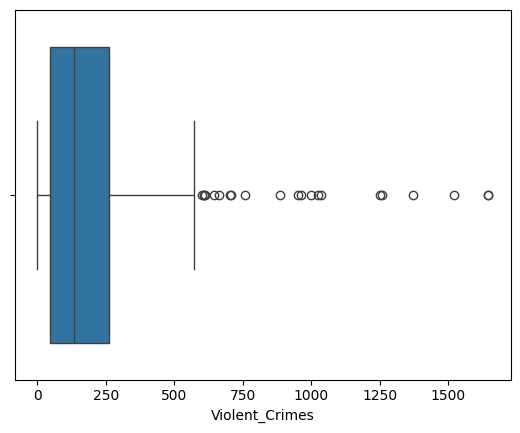

In [46]:
import seaborn as sns

sns.boxplot(data=crime_merge['Violent_Crimes'], orient='h')
plt.show()

In [47]:
#create categories of high and low crime based on crime counts, there is a good breaking point around 300
# 0 = low, 1 = high

for idx, row in crime_merge.iterrows():
  if row['Violent_Crimes'] > 260:
    crime_merge.loc[idx, 'Crime_Category'] = 1
  else:
    crime_merge.loc[idx, 'Crime_Category'] = 0

#clean data further - drop rows w/ arrets, pop, male, female, median age, or shape area as NAN, but keep rows with vacancies, gun count, citation count, or 311 req as NAN and convert to 0
crime_merge = crime_merge.dropna(subset=['Arrests', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area']).copy()

crime_merge['Vacancies'].fillna(0, inplace=True)
crime_merge['Gun_Offender_Count'].fillna(0, inplace=True)
crime_merge['CitationsCount'].fillna(0, inplace=True)
crime_merge['311 Req'].fillna(0, inplace=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Shape of Neighborhood Dataset")
print(crime_merge.shape)
crime_merge

Shape of Neighborhood Dataset
(257, 13)


Neighborhood  Violent_Crimes  Vacancies  \
0                                ABELL              96        2.0   
1                            ALLENDALE             338       29.0   
2                              ARCADIA              72        0.0   
3                            ARLINGTON             348       51.0   
4                    ARMISTEAD GARDENS             170        0.0   
5                            ASHBURTON             108        3.0   
6                  BALTIMORE HIGHLANDS             527       12.0   
7                              BARCLAY             400       13.0   
8                         BARRE CIRCLE              29        0.0   
9                              BAYVIEW             127        2.0   
10                          BEECHFIELD             151        3.0   
11                       BELAIR-EDISON            1252       50.0   
12                     BELAIR-PARKSIDE              47        1.0   
13                           BELVEDERE              26        0.0   
14                               BEREA             480       50.0   
15                      BETTER WAVERLY             357       20.0   
16                       BEVERLY HILLS              29        0.0   
17                       BIDDLE STREET             164       52.0   
18                         BOLTON HILL             137        2.0   
19                          BOYD-BOOTH             160       67.0   
20                        BREWERS HILL              44        0.0   
21                BRIDGEVIEW/GREENLAWN             275       11.0   
22                       BROADWAY EAST             953      371.0   
23                      BROENING MANOR             140        2.0   
24                            BROOKLYN            1373       80.0   
27                   CALLAWAY-GARRISON             107        4.0   
28                     CAMERON VILLAGE              80        0.0   
29                              CANTON             260        8.0   
30              CANTON INDUSTRIAL AREA              61        0.0   
31                                CARE             175       16.0   
32    CARROLL - CAMDEN INDUSTRIAL AREA             177        2.0   
34                CARROLL-SOUTH HILTON             162       31.0   
35                    CARROLLTON RIDGE             962      312.0   
36                          CEDARCROFT               2        0.0   
37                             CEDMONT             140        3.0   
38                             CEDONIA             150        0.0   
39                 CENTRAL FOREST PARK             103        5.0   
40                CENTRAL PARK HEIGHTS             999      171.0   
41                       CHARLES NORTH             365        1.0   
42                     CHARLES VILLAGE             190        2.0   
43                         CHERRY HILL            1026       40.0   
44                           CHESWOLDE              34        0.0   
45                     CHINQUAPIN PARK              45        0.0   
46                        CLIFTON PARK             175        1.0   
47                          COLDSPRING              59        0.0   
48     COLDSTREAM HOMESTEAD MONTEBELLO             887      158.0   
49   CONCERNED CITIZENS OF FOREST PARK             123        8.0   
50          COPPIN HEIGHTS/ASH-CO-EAST             326       87.0   
51                       CROSS COUNTRY              37        1.0   
52                          CROSS KEYS              22        0.0   
53                          CURTIS BAY             551       52.0   
54          CURTIS BAY INDUSTRIAL AREA               4        0.0   
55                             CYLBURN             185        6.0   
56                         DARLEY PARK             193       39.0   
57                         DICKEYVILLE              24        0.0   
58                            DOLFIELD             194        5.0   
59                          DORCHESTER             216        9.0   
60                      

In [48]:
#convert to CSV
file_path = 'Nei_Violent_Crime.csv'
crime_merge.to_csv(file_path, index=False)

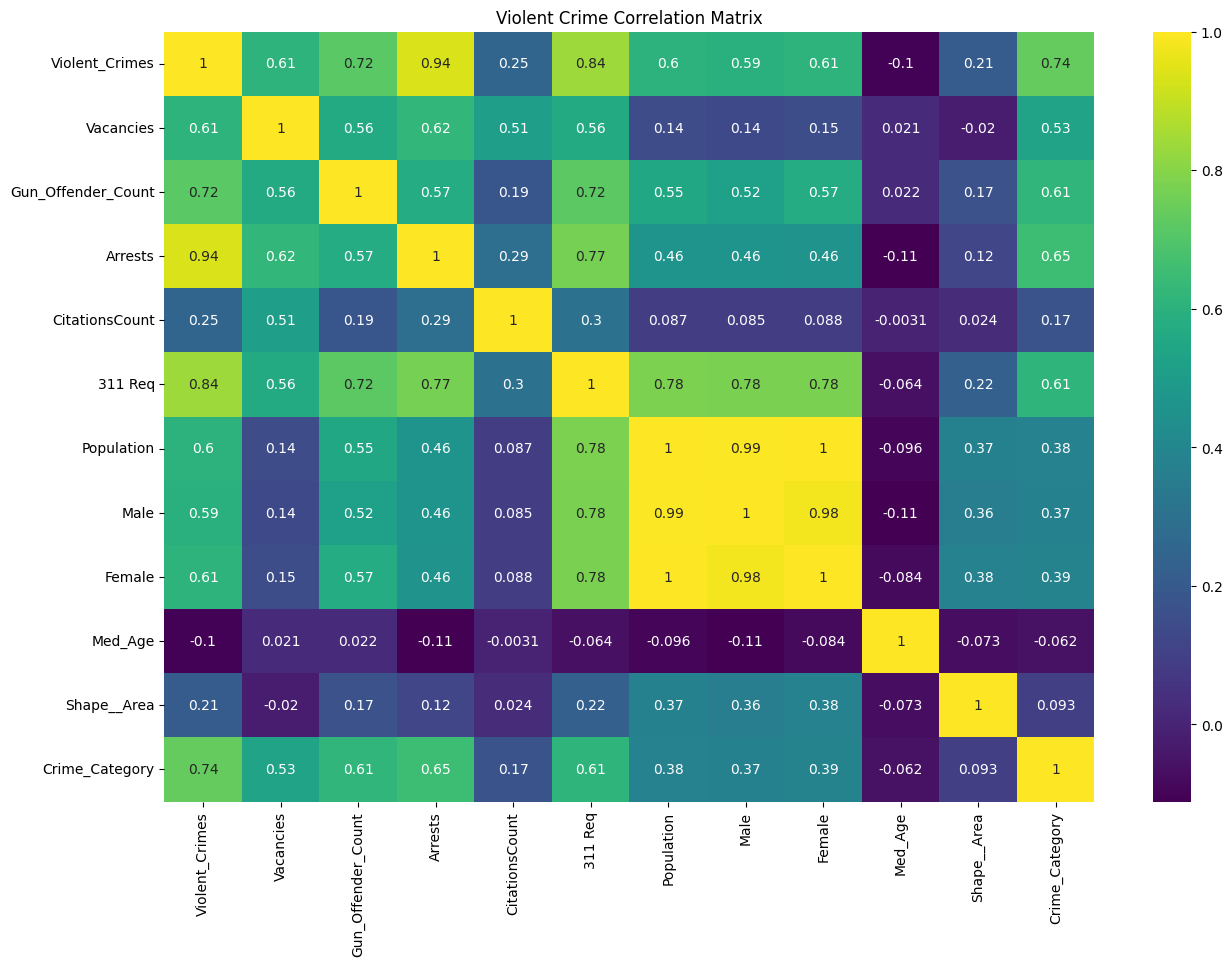

In [49]:
no_nei_df = crime_merge.drop(columns=['Neighborhood'])
correlation_matrix = no_nei_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Violent Crime Correlation Matrix')
plt.show()

In [50]:
no_nei_df.corr()

Violent_Crimes  Vacancies  Gun_Offender_Count   Arrests  \
Violent_Crimes            1.000000   0.607431            0.717701  0.936882   
Vacancies                 0.607431   1.000000            0.564815  0.621616   
Gun_Offender_Count        0.717701   0.564815            1.000000  0.571061   
Arrests                   0.936882   0.621616            0.571061  1.000000   
CitationsCount            0.248318   0.508429            0.188148  0.285230   
311 Req                   0.835248   0.563047            0.719959  0.767107   
Population                0.602961   0.141033            0.548701  0.462023   
Male                      0.593813   0.135086            0.515649  0.462409   
Female                    0.605850   0.145037            0.572943  0.457773   
Med_Age                  -0.103273   0.020728            0.021890 -0.111342   
Shape__Area               0.206320  -0.020380            0.167018  0.119837   
Crime_Category            0.738856   0.531927            0.613654  0.650551   

                    CitationsCount   311 Req  Population      Male    Female  \
Violent_Crimes            0.248318  0.835248    0.602961  0.593813  0.605850   
Vacancies                 0.508429  0.563047    0.141033  0.135086  0.145037   
Gun_Offender_Count        0.188148  0.719959    0.548701  0.515649  0.572943   
Arrests                   0.285230  0.767107    0.462023  0.462409  0.457773   
CitationsCount            1.000000  0.304996    0.086983  0.084870  0.088092   
311 Req                   0.304996  1.000000    0.781629  0.778109  0.778087   
Population                0.086983  0.781629    1.000000  0.994829  0.996052   
Male                      0.084870  0.778109    0.994829  1.000000  0.981886   
Female                    0.088092  0.778087    0.996052  0.981886  1.000000   
Med_Age                  -0.003073 -0.064289   -0.095952 -0.109183 -0.083575   
Shape__Area               0.023686  0.223279    0.370588  0.357496  0.378893   
Crime_Category            0.174404  0.611436    0.381991  0.373852  0.385869   

                     Med_Age  Shape__Area  Crime_Category  
Violent_Crimes     -0.103273     0.206320        0.738856  
Vacancies           0.020728    -0.020380        0.531927  
Gun_Offender_Count  0.021890     0.167018        0.613654  
Arrests            -0.111342     0.119837        0.650551  
CitationsCount     -0.003073     0.023686        0.174404  
311 Req            -0.064289     0.223279        0.611436  
Population         -0.095952     0.370588        0.381991  
Male               -0.109183     0.357496        0.373852  
Female             -0.083575     0.378893        0.385869  
Med_Age             1.000000    -0.073402       -0.062103  
Shape__Area        -0.073402     1.000000        0.092713  
Crime_Category     -0.062103     0.092713        1.000000

Above you can see the dataset for our target variable (violent crimes) and features (gun count, arrests, citations, 311, population, gender, median age, and area) in each neighborhood of Baltimore. From the correlation matrix it seems that Violent Crimes are heavily correlated with Arrests and 311 Requests.

Below we will use different models to see if these correlation results hold true.

# Buliding Models


## Linear regressor, polynomial(quadratic) regressor, tree regressor

Luis

In [51]:
import pandas as pd
import numpy as np
import pandas as pd
# Load the dataset
file_path = '/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv'
#file_path = '/content/Nei_Violent_Crime.csv'
df = pd.read_csv(file_path)
df.head()

Neighborhood  Violent_Crimes  Vacancies  Gun_Offender_Count  Arrests  \
0              ABELL              96        2.0                 2.0    280.0   
1          ALLENDALE             338       29.0                 9.0    889.0   
2            ARCADIA              72        0.0                 1.0    346.0   
3          ARLINGTON             348       51.0                 7.0   2226.0   
4  ARMISTEAD GARDENS             170        0.0                 0.0    443.0   

   CitationsCount  311 Req  Population    Male  Female    Med_Age  \
0             3.0    15612       975.0   473.0   502.0  33.400002   
1            10.0    40209      3354.0  1489.0  1865.0  43.700001   
2             6.0    15160      1077.0   501.0   576.0  41.900002   
3            27.0    27143      2163.0  1034.0  1129.0  49.299999   
4             1.0     8528      3779.0  1822.0  1957.0  34.299999   

    Shape__Area  Crime_Category  
0  2.033969e+06             0.0  
1  1.195420e+07             1.0  
2  6.301562e+06             0.0  
3  5.034912e+06             1.0  
4  1.345781e+07             0.0

In [52]:
unique_categories = df['Crime_Category'].unique()
print(unique_categories)

[0. 1.]


In [53]:
# Handling missing values by imputing the median
df['Vacancies'] = df['Vacancies'].fillna(df['Vacancies'].median())
df['Gun_Offender_Count'] = df['Gun_Offender_Count'].fillna(df['Gun_Offender_Count'].median())
df['CitationsCount'] = df['CitationsCount'].fillna(df['CitationsCount'].median())
df['311 Req'] = df['311 Req'].fillna(df['311 Req'].median())

# Check the dataset to ensure missing values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood        257 non-null    object 
 1   Violent_Crimes      257 non-null    int64  
 2   Vacancies           257 non-null    float64
 3   Gun_Offender_Count  257 non-null    float64
 4   Arrests             257 non-null    float64
 5   CitationsCount      257 non-null    float64
 6   311 Req             257 non-null    int64  
 7   Population          257 non-null    float64
 8   Male                257 non-null    float64
 9   Female              257 non-null    float64
 10  Med_Age             257 non-null    float64
 11  Shape__Area         257 non-null    float64
 12  Crime_Category      257 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 26.2+ KB


In [54]:
# Count missing values in each column
missing_values_count = df.isna().sum()

# Print number of missing values in each column
print(missing_values_count)

Neighborhood          0
Violent_Crimes        0
Vacancies             0
Gun_Offender_Count    0
Arrests               0
CitationsCount        0
311 Req               0
Population            0
Male                  0
Female                0
Med_Age               0
Shape__Area           0
Crime_Category        0
dtype: int64


### Linear regression

We will start by training all our feature with out giving preference to the one with higher correlatio related to our target, to see how the model does and have a general idea of what is happening.

In [55]:
#Define the features to use and the target
X = df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', '311 Req', 'Population', 'Male', 'Female','Med_Age', 'Shape__Area']]  # Features
y = df['Violent_Crimes']  # Target

In [56]:
#We train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [57]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data
y_pred = reg.predict(X_test)     # Finding the predictions of the model for test dataset

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 2.57274030e-01  1.05097230e+01  1.56510549e-01 -2.63471230e-02
 -4.00167882e-04  1.01470156e-02 -9.36072604e-03  1.95077416e-02
 -5.68905471e-01  1.62228875e-06] 

Intercept: 32.28946046784088


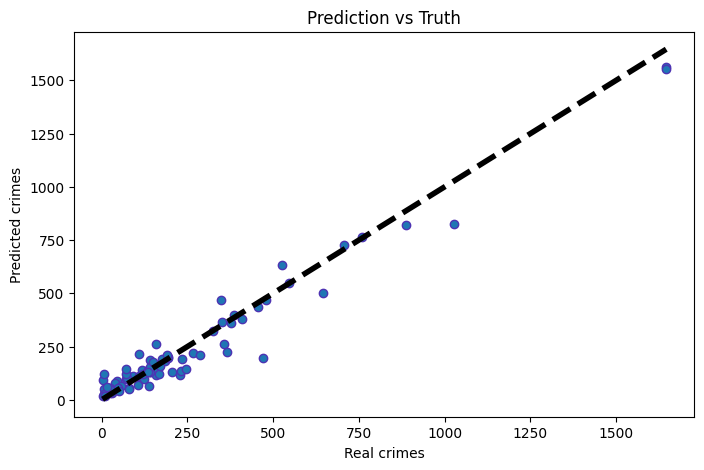

In [58]:
import matplotlib.pyplot as plt
# Let's plot predictions vs Truth for 'CRIMES'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crimes')
ax.set_ylabel('Predicted crimes')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

The model performed very good, it falls under the ideal category, although probably the reason for this is due 3 of the features are colinear with each other, creating some noise and it seems most of the features have great correlation with the target(this will be seen in the pearson heat map)

We did not use Lasso regularization to fix high variance, lasso is employed as a feature selection tool, as seen below.

In [59]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import Lasso

penalty_factor = [0.009, 0.09, 0.5, 3, 30]

for a in penalty_factor:
    lasso = Lasso(alpha=a, max_iter=int(10e5), tol=1e-4)   # Instantiate lasso regression
    lasso.fit(X_train, y_train)        # Fit the train data

    r2_train_score = lasso.score(X_train, y_train)   # Calculating R^2 score for train dataset
    y_pred = lasso.predict(X_test)       # Finding predictions of the model for test dataset
    r2_test_score = lasso.score(X_test, y_test)        # Calculating R^2 score for test dataset

    print('Penalty Factor:', a)
    print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
    print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
    print('Coefficients of Linear Model:', lasso.coef_, '\n')
    print('Intercept:', lasso.intercept_, '\n******************************')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+04, tolerance: 1.219e+03
  model = cd_fast.enet_coordinate_descent(


Penalty Factor: 0.009
R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 2.57257924e-01  1.05087144e+01  1.56513234e-01 -2.63485790e-02
 -4.00052687e-04  9.93600677e-03 -9.15388224e-03  1.97223722e-02
 -5.68624726e-01  1.62228846e-06] 

Intercept: 32.278316230328926 
******************************
Penalty Factor: 0.09
R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 2.57112893e-01  1.04996217e+01  1.56537424e-01 -2.63617133e-02
 -3.99013475e-04  7.44027701e-04 -0.00000000e+00  2.89474710e-02
 -5.66101469e-01  1.62228464e-06] 

Intercept: 32.17816580311808 
******************************
Penalty Factor: 0.5
R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9539 

Coefficients of Linear Model: [ 2.56378827e-01  1.04536028e+01  1.56659855e-01 -2.64281839e-02
 -3.93754238e-04  5.51439428e-04 -0.00000000e+00  2.93074907e-02
 -5.53328031e-01  1.62226

From lasso, Gun_offender_count is the one that seems will be the feature with nonzero weights at the end, I used different penalty factor(0.009, 0.09, 0.5, 3, 30)to see the weight transition to 0, and although i couldnt get many weights to become 0, it is noticeable that the weightsrelated to Gun_offender_count will be the last to turn 0.

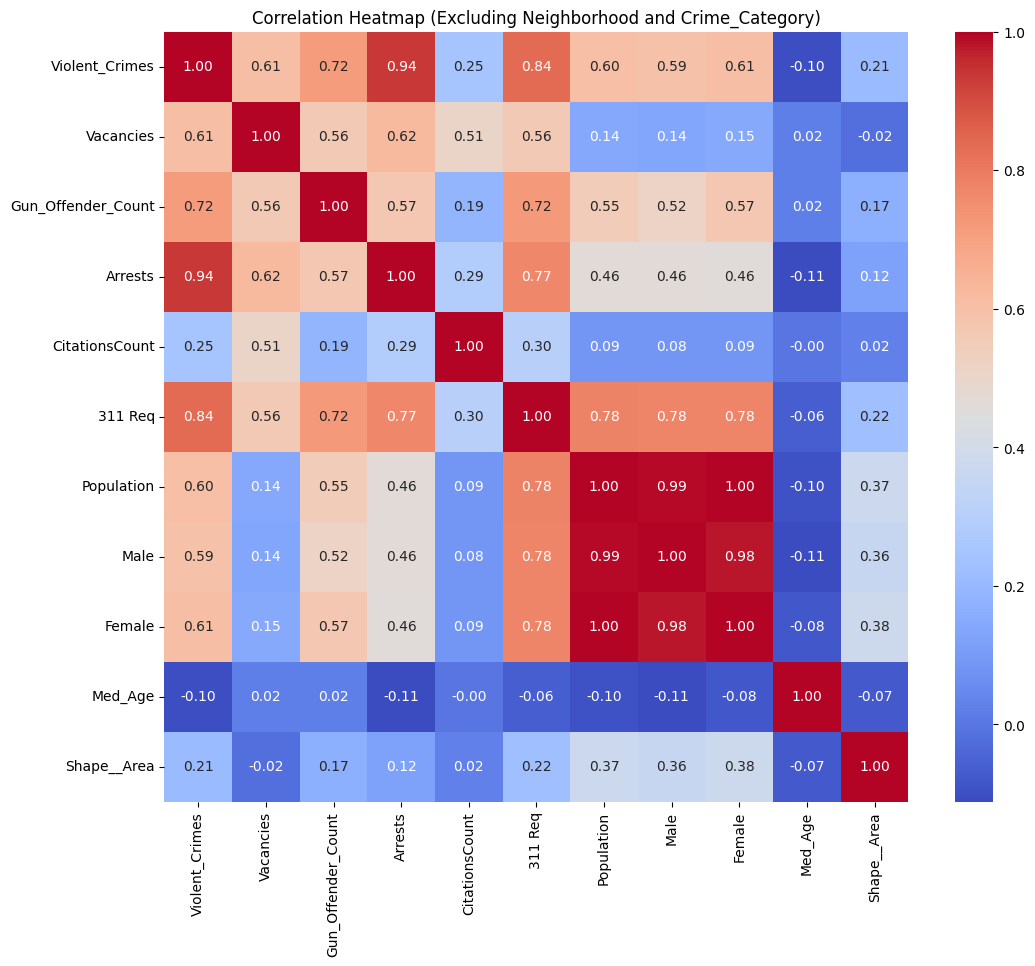

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Neighborhood' and 'Crime_Category' columns
df_numeric = df.drop(['Neighborhood', 'Crime_Category'], axis=1)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Neighborhood and Crime_Category)')
plt.show()

Ass seen above, population, male and female, are very correlated with each other, so it would not make much sense putting them individually. Ass seen in the first row, arrests, 311 request and Gun_Offender_Count are the ones that are higher correlated to our targe(violent_crimes)

We choose arrests, 311 request and Gun_Offender_Count due the fact that those were the ones with higher correlation related to the target in our Pearson correlation heat map. For lasso regression Gun_offender_count is the one with nonzero weights, That is the reason why we will use the three feature above to try to improve our regression.

In [61]:
X1 = df[['Arrests', '311 Req', 'Gun_Offender_Count']]  # Features
y1 = df['Violent_Crimes']  # Target

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=3)

In [63]:
reg = LinearRegression()         # Instantiate
reg.fit(X1_train, y1_train)        # Fit the train data
y1_pred = reg.predict(X1_test)     # Finding the predictions of the model for test dataset

r2_train_score = reg.score(X1_train, y1_train)   # Calculating R^2 score for train
r2_test_score = reg.score(X1_test, y1_test)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9197 

R^2 score for test dataset =  0.9522 

Coefficients of Linear Model: [1.46901263e-01 1.43537758e-03 1.15412747e+01] 

Intercept: 24.511323276540367


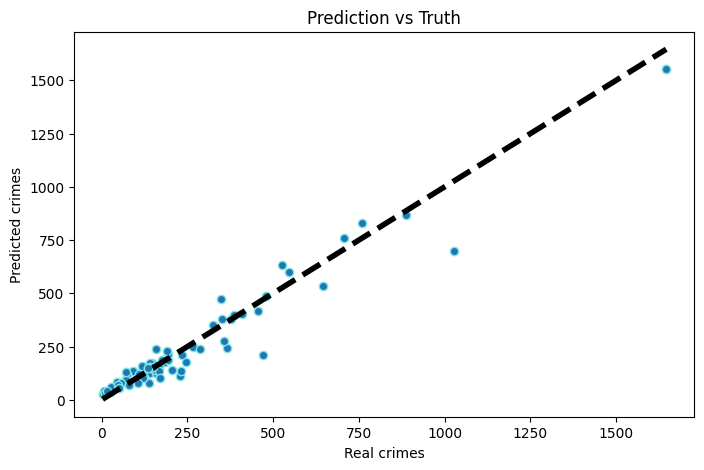

In [64]:
# Let's plot predictions vs Truth for 'CRIMES'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y1_test, y1_pred, edgecolors=(0.5, 0.9, 0.9))  # Scatter plot for predictions vs truth
ax.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crimes')
ax.set_ylabel('Predicted crimes')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

For this lionear regression our r^2 values are 0.9197 for the train and 0.9522 for the test data, the gap between these values grew compared to the last one, but my perception about this regression is that is a more consistent one due the fact we got rid of factor that might just had caused noise in the model like male, female and population.

### Quadratic regression

In [65]:
# Rename the features
renamed_df = df.rename(columns={
    'Vacancies': 'x1',
    'Gun_Offender_Count': 'x2',
    'Arrests': 'x3',
    'CitationsCount': 'x4',
    '311 Req': 'x5',
    'Population': 'x6',
    'Male': 'x7',
    'Female': 'x8',
    'Med_Age': 'x9',
    'Shape__Area': 'x10'

})

# Display the new DataFrame
renamed_df.head()

Neighborhood  Violent_Crimes    x1   x2      x3    x4     x5      x6  \
0              ABELL              96   2.0  2.0   280.0   3.0  15612   975.0   
1          ALLENDALE             338  29.0  9.0   889.0  10.0  40209  3354.0   
2            ARCADIA              72   0.0  1.0   346.0   6.0  15160  1077.0   
3          ARLINGTON             348  51.0  7.0  2226.0  27.0  27143  2163.0   
4  ARMISTEAD GARDENS             170   0.0  0.0   443.0   1.0   8528  3779.0   

       x7      x8         x9           x10  Crime_Category  
0   473.0   502.0  33.400002  2.033969e+06             0.0  
1  1489.0  1865.0  43.700001  1.195420e+07             1.0  
2   501.0   576.0  41.900002  6.301562e+06             0.0  
3  1034.0  1129.0  49.299999  5.034912e+06             1.0  
4  1822.0  1957.0  34.299999  1.345781e+07             0.0

In [66]:
renamed_df1 = renamed_df.drop(columns=['Neighborhood', 'Violent_Crimes','Crime_Category'])

In [67]:
def add_quadratic_monomials(renamed_df1):
    new_df = renamed_df1.copy()
    features = renamed_df1.columns
    for feature in features:
        squared_column_name = f"{feature}x2"
        new_df[squared_column_name] = renamed_df1[feature]
    return new_df

# Assuming df is the DataFrame with the features x1 to x9
new_df = add_quadratic_monomials(renamed_df1)


In [68]:
new_df

x1    x2      x3      x4      x5       x6      x7      x8         x9  \
0      2.0   2.0   280.0     3.0   15612    975.0   473.0   502.0  33.400002   
1     29.0   9.0   889.0    10.0   40209   3354.0  1489.0  1865.0  43.700001   
2      0.0   1.0   346.0     6.0   15160   1077.0   501.0   576.0  41.900002   
3     51.0   7.0  2226.0    27.0   27143   2163.0  1034.0  1129.0  49.299999   
4      0.0   0.0   443.0     1.0    8528   3779.0  1822.0  1957.0  34.299999   
5      3.0   3.0   240.0     2.0   24573   2243.0  1013.0  1230.0  46.700001   
6     12.0   7.0  3231.0    40.0   38143   3143.0  1660.0  1483.0  31.200001   
7     13.0   7.0  1323.0    21.0   36247   2692.0  1213.0  1479.0  35.099998   
8      0.0   0.0    69.0     7.0    6556    300.0   167.0   133.0  34.299999   
9      2.0   1.0   457.0    13.0   27386   2944.0  1496.0  1448.0  34.099998   
10     3.0   4.0   320.0    14.0   25799   4013.0  1820.0  2193.0  37.400002   
11    50.0  50.0  4199.0   182.0  182066  14680.0  6498.0  8182.0  38.599998   
12     1.0   0.0   247.0     4.0    6763    449.0   207.0   242.0  37.099998   
13     0.0   0.0    36.0     4.0    8152    706.0   288.0   418.0  41.799999   
14    50.0   9.0  1934.0    20.0   53804   3469.0  1556.0  1913.0  42.599998   
15    20.0   7.0   828.0     7.0   32790   2622.0  1166.0  1456.0  35.200001   
16     0.0   0.0    82.0     0.0    6745    637.0   307.0   330.0  46.900002   
17    52.0   1.0   855.0    25.0   19711    935.0   465.0   470.0  39.000000   
18     2.0   0.0   319.0     6.0   28181   5034.0  2218.0  2816.0  40.599998   
19    67.0   4.0   952.0    18.0   13263    516.0   255.0   261.0  36.299999   
20     0.0   0.0   213.0     5.0   17339   2356.0  1159.0  1197.0  32.000000   
21    11.0   4.0   609.0     2.0   19422   1679.0   762.0   917.0  39.700001   
22   371.0  13.0  5191.0  4431.0  109807   3376.0  1562.0  1814.0  39.000000   
23     2.0   0.0   548.0    13.0   16016   1971.0  1010.0   961.0  31.900000   
24    80.0  16.0  4842.0   104.0   93534   9549.0  4575.0  4974.0  31.600000   
25     4.0   0.0   233.0    18.0   14535   1582.0   750.0   832.0  45.299999   
26     0.0   3.0   126.0     4.0   13079   1310.0   560.0   750.0  44.400002   
27     8.0   1.0   798.0    22.0  126146  12725.0  6203.0  6522.0  34.400002   
28     0.0   0.0   231.0     1.0   10816    108.0    58.0    50.0  25.700001   
29    16.0   2.0   875.0    31.0   23634   1422.0   647.0   775.0  35.099998   
30     2.0   0.0   918.0     2.0    8903     27.0    15.0    12.0  34.500000   
31    31.0   3.0   406.0    26.0   17619   1241.0   548.0   693.0  37.000000   
32   312.0   8.0  4927.0   295.0   91042   2318.0  1151.0  1167.0  34.599998   
33     0.0   0.0    22.0     0.0    3926    626.0   302.0   324.0  45.200001   
34     3.0   5.0   270.0     0.0   21617   2524.0  1221.0  1303.0  40.000000   
35     0.0   6.0   400.0     3.0   20546   3168.0  1415.0  1753.0  39.200001   
36     5.0   1.0   344.0    10.0   10825   1097.0   522.0   575.0  46.099998   
37   171.0  22.0  4462.0   177.0   83378   4339.0  2007.0  2332.0  40.500000   
38     1.0   0.0  1290.0     8.0   21415   1085.0   613.0   472.0  40.099998   
39     2.0   2.0   513.0     7.0   38060   8749.0  4352.0  4397.0  28.500000   
40    40.0  16.0  2952.0     7.0   39116   7647.0  3181.0  4466.0  30.299999   
41     0.0   1.0    39.0     3.0   20684   7613.0  3578.0  4035.0  31.900000   
42     0.0   2.0    82.0     0.0   13201   1247.0   577.0   670.0  43.400002   
43     1.0   0.0  1028.0     0.0    8986     16.0     9.0     7.0  43.000000   
44     0.0   1.0    43.0     0.0    5826   1108.0   556.0   552.0  52.700001   
45   158.0  16.0  3448.0   348.0  104465   5638.0  2618.0  3020.0  38.799999   
46     8.0   1.0   380.0    12.0   11120   1141.0   553.0   588.0  41.099998   
47    87.0  12.0   900.0    45.0   39869   1845.0   807.0  1038.0  39.299999   
48     1.0   0.0    39.0     0.0   21277   5305.0  2476.0  2829.0  33.200001   
49     0

In [69]:
X2 = new_df # Features
y2 = renamed_df['Violent_Crimes']  # Target

In [70]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=3)

In [71]:
reg = LinearRegression()         # Instantiate
reg.fit(X2_train, y2_train)        # Fit the train data
y2_pred = reg.predict(X2_test)     # Finding the predictions of the model for test dataset

r2_train_score = reg.score(X2_train, y2_train)   # Calculating R^2 score for train
r2_test_score = reg.score(X2_test, y2_test)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 1.28637015e-01  5.25486153e+00  7.82552744e-02 -1.31735615e-02
 -2.00083941e-04  5.07350779e-03 -4.68036302e-03  9.75387081e-03
 -2.84452735e-01  8.10830947e-07  1.28637015e-01  5.25486153e+00
  7.82552744e-02 -1.31735615e-02 -2.00083941e-04  5.07350779e-03
 -4.68036302e-03  9.75387080e-03 -2.84452735e-01  8.11457805e-07] 

Intercept: 32.2894604679079


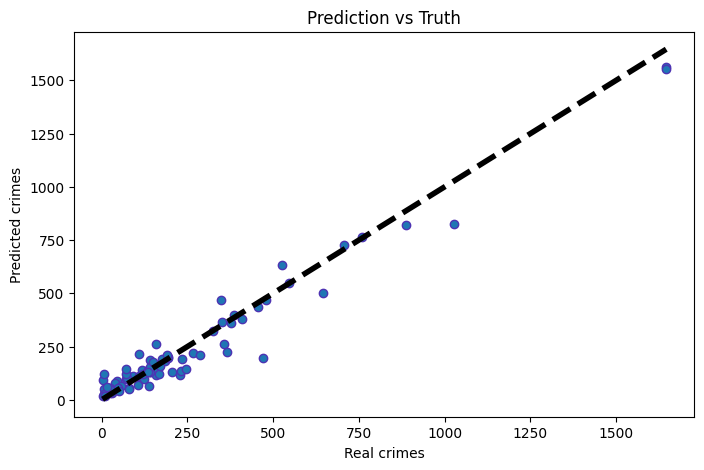

In [72]:
# Let's plot predictions vs Truth for 'CRIMES'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y2_test, y2_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crimes')
ax.set_ylabel('Predicted crimes')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

The cuadratic regression came out as the first linear regression.
Quadratic regression:
R^2 score for train dataset = 0.9324
R^2 score for test dataset = 0.9538
It is important to say that all features were used, to see any important change related to our original linear regression

### Tree regressor

In [73]:
# Drop 'Neighborhood' and 'Crime_Category' columns
df.drop(['Neighborhood', 'Crime_Category'], axis=1, inplace=True)

# Move 'Violent_Crimes' column to the last position
cols = df.columns.tolist()
cols.remove('Violent_Crimes')
cols.append('Violent_Crimes')
df = df[cols]

In [74]:
 # Defining the features and the target
X = df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', '311 Req', 'Population', 'Male', 'Female','Med_Age', 'Shape__Area']]  # Features
y = df['Violent_Crimes']  # Target

In [75]:
# Importing 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor
tr_reg = DecisionTreeRegressor() # Instantiating the tree regressor
tr_reg.fit(X, y) # Fitting the data

DecisionTreeRegressor()

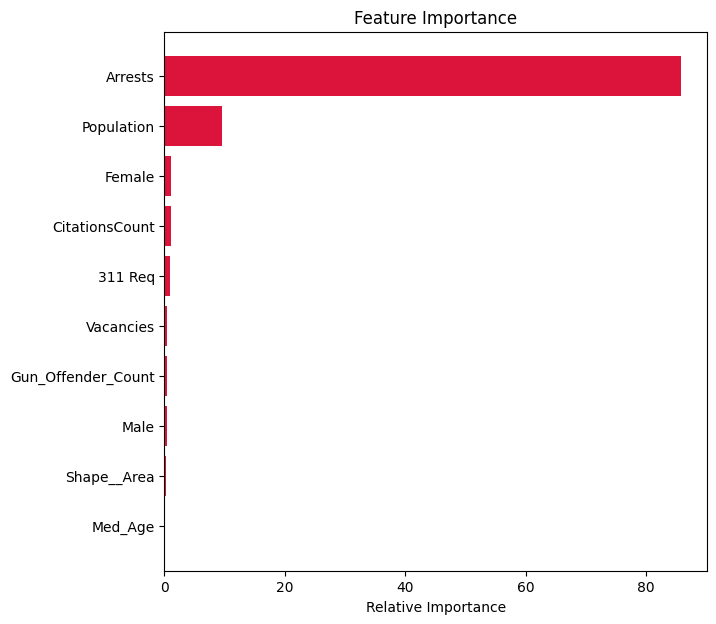

In [76]:
# Calculating the feature importance
feature_importance = tr_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
# Displaying feature importance through bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[:-1][sorted_idx])
plt.show()

For tree regressor feature importance calculation we got arrests as the most important one, followed by female, it is neccessary to mention that the there is a big gap betwen the most important and the second mos timportant feature. Arrest as seen here and in the two other feature selection algorithm, seems to be of big importance to predict our target.

In [77]:
# Defining the features and the target
X = df[['Arrests', 'Female']]  # Features
y = df['Violent_Crimes']  # Target

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

In [79]:
# Constructing a tree regressor
tr_reg = DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
# Finding the predictions of the tree regressor for train and test subsets
train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [81]:
r2_train_score = tr_reg.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.8906 



In [82]:
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
# Using 'GridSearchCV' to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=3),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [84]:
# Displaying the best parameters

grid_search_cv.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=14, random_state=3)

In [85]:
# Retraining the tree regressor with the best hyperparameters

tr_reg = DecisionTreeRegressor(max_leaf_nodes=14, random_state=3)
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=14, random_state=3)

In [86]:
# Finding the predictions of the latter tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [87]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.975 

R^2 score for test dataset =  0.896 



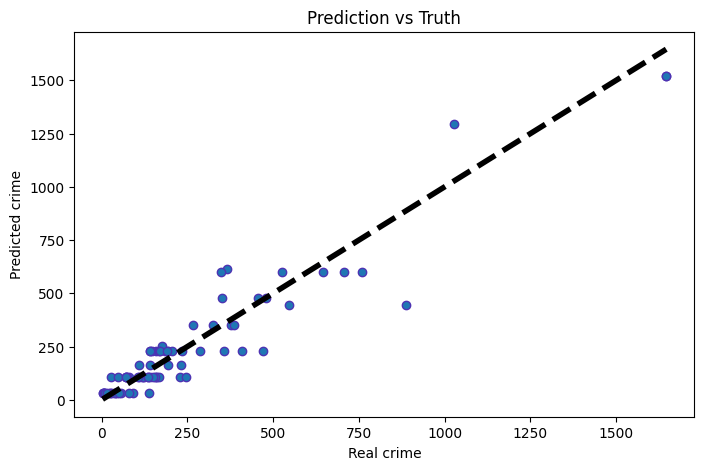

In [88]:
# Let's plot predictions vs ground truth for 'PRICE'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crime')
ax.set_ylabel('Predicted crime')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

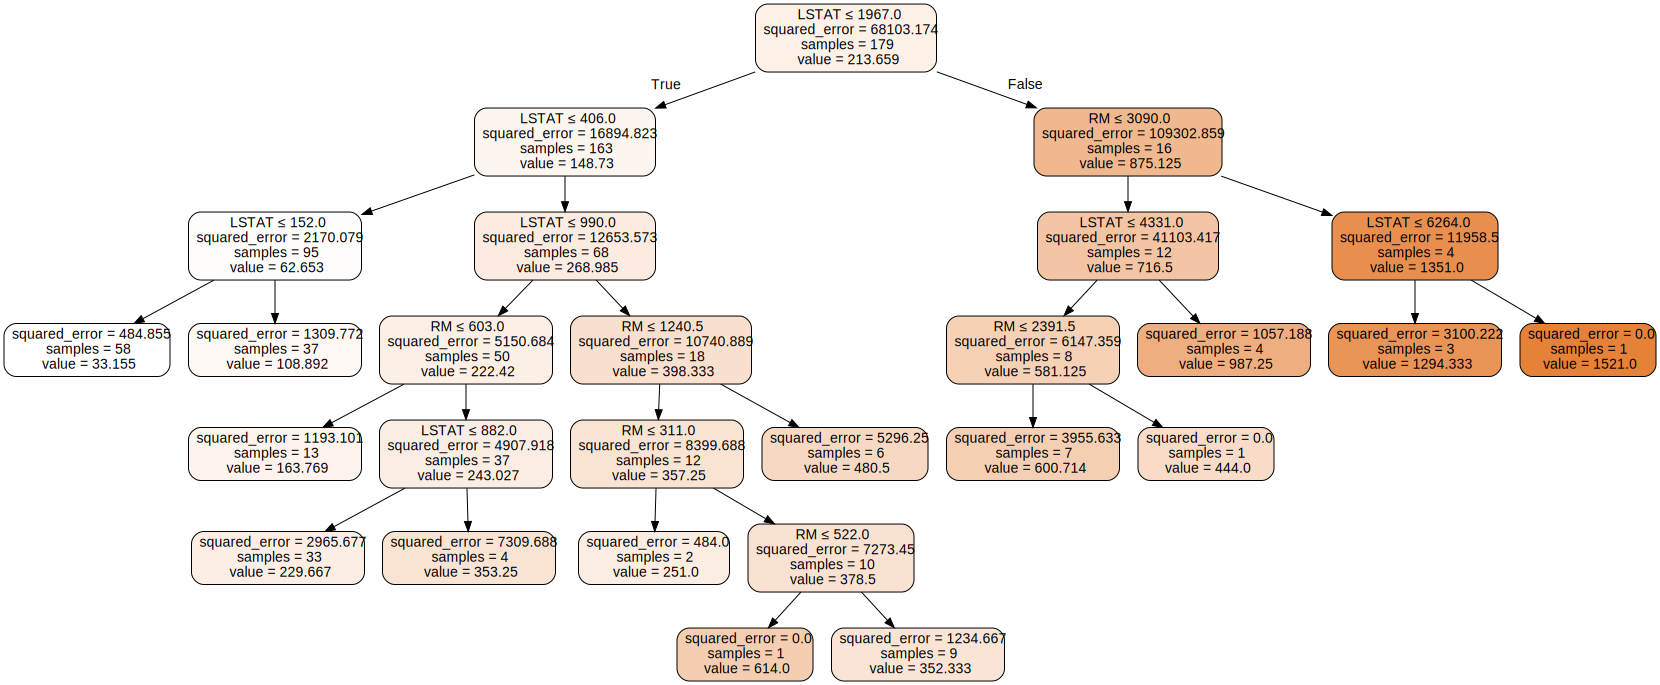

In [89]:
# Displaying the tree graph

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tr_reg, out_file=None,
                      feature_names=["LSTAT", "RM"],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)

graph

For our tree regressor:
R^2 score for train dataset = 1.0
R^2 score for test dataset = 0.9031
High variance
Tree regressor after ideal tree parameters:
R^2 score for train dataset = 0.975
R^2 score for test dataset = 0.896
High variance
As we can see both R^2 have some kind of variance in them, which probably is not high, but it is higher compared to the other R^2's. I would trust the linear regression model with the selected features more, because of the type of features we are working with(continous features and targets). There is still a lot to say related to the ideal feature, and this will depend on the other models we will try in this project.

##Deep Learning Models

###Neural Network

Pooja and Prudhvi

In [90]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv'
data = pd.read_csv(file_path)

# Display the first few rows and a summary of the dataset
data_head = data.head()
data_info = data.info()
data.describe(), data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood        257 non-null    object 
 1   Violent_Crimes      257 non-null    int64  
 2   Vacancies           257 non-null    float64
 3   Gun_Offender_Count  257 non-null    float64
 4   Arrests             257 non-null    float64
 5   CitationsCount      257 non-null    float64
 6   311 Req             257 non-null    int64  
 7   Population          257 non-null    float64
 8   Male                257 non-null    float64
 9   Female              257 non-null    float64
 10  Med_Age             257 non-null    float64
 11  Shape__Area         257 non-null    float64
 12  Crime_Category      257 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 26.2+ KB


(       Violent_Crimes   Vacancies  Gun_Offender_Count      Arrests  \
 count      257.000000  257.000000          257.000000   257.000000   
 mean       224.404669   22.011673            3.840467   807.595331   
 std        276.498502   50.488588            5.523550  1290.800009   
 min          1.000000    0.000000            0.000000     2.000000   
 25%         54.000000    0.000000            0.000000   121.000000   
 50%        140.000000    2.000000            2.000000   377.000000   
 75%        271.000000   16.000000            5.000000   870.000000   
 max       1646.000000  371.000000           50.000000  9236.000000   
 
        CitationsCount        311 Req    Population         Male       Female  \
 count      257.000000     257.000000    257.000000   257.000000   257.000000   
 mean        36.482490   24320.564202   2240.003891  1051.163424  1188.840467   
 std        277.897296   24889.733980   2299.771588  1077.449385  1232.760483   
 min          0.000000     744.0000

In [91]:
# Handling missing values by imputing the median
data['Vacancies'] = data['Vacancies'].fillna(data['Vacancies'].median())
data['Gun_Offender_Count'] = data['Gun_Offender_Count'].fillna(data['Gun_Offender_Count'].median())
data['CitationsCount'] = data['CitationsCount'].fillna(data['CitationsCount'].median())

# Check the dataset to ensure missing values are filled
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood        257 non-null    object 
 1   Violent_Crimes      257 non-null    int64  
 2   Vacancies           257 non-null    float64
 3   Gun_Offender_Count  257 non-null    float64
 4   Arrests             257 non-null    float64
 5   CitationsCount      257 non-null    float64
 6   311 Req             257 non-null    int64  
 7   Population          257 non-null    float64
 8   Male                257 non-null    float64
 9   Female              257 non-null    float64
 10  Med_Age             257 non-null    float64
 11  Shape__Area         257 non-null    float64
 12  Crime_Category      257 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 26.2+ KB


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
categorical_cols = data.select_dtypes(exclude=['number']).columns.tolist()

# Impute missing values
# For numeric columns, use median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
# For categorical columns, use mode (or a constant if mode computation is complex)
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Remove categorical data from the dataset used for correlation
numeric_data = data[numeric_cols]

# Check correlations for numeric data including the target variable
correlation_matrix = numeric_data.corr()
print(correlation_matrix['Violent_Crimes'].sort_values(ascending=False))

# Normalize the numeric data
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Split the data into features and target
target = data['Violent_Crimes']
features = data.drop(columns=['Violent_Crimes', 'Neighborhood', 'Crime_Category'])  # Explicitly remove categorical

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Violent_Crimes        1.000000
Arrests               0.936882
311 Req               0.835248
Crime_Category        0.738856
Gun_Offender_Count    0.717701
Vacancies             0.607431
Female                0.605850
Population            0.602961
Male                  0.593813
CitationsCount        0.248318
Shape__Area           0.206320
Med_Age              -0.103273
Name: Violent_Crimes, dtype: float64
Training set: (179, 10) (179,)
Validation set: (39, 10) (39,)
Test set: (39, 10) (39,)


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression; no activation function
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)



Epoch 1/50
6/6 [==============================] - 5s 150ms/step - loss: 0.5412 - val_loss: 0.1648
Epoch 2/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1688 - val_loss: 0.0837
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1221 - val_loss: 0.0638
Epoch 4/50
6/6 [==============================] - 0s 54ms/step - loss: 0.1029 - val_loss: 0.0541
Epoch 5/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0777 - val_loss: 0.0457
Epoch 6/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0630 - val_loss: 0.0445
Epoch 7/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0609 - val_loss: 0.0403
Epoch 8/50
6/6 [==============================] - 0s 45ms/step - loss: 0.0559 - val_loss: 0.0359
Epoch 9/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0498 - val_loss: 0.0340
Epoch 10/50
6/6 [==============================] - 0s 30ms/step - loss: 0.0470 - val_loss: 0.0310
Epoch 11/50
6/6 [===========

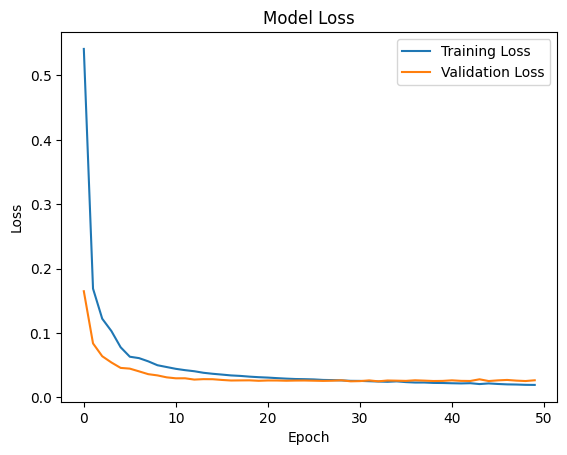

In [94]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1. Feature Importance from the Model


In [95]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.inspection import permutation_importance

def wrapped_predict(model, X):
    # Make predictions and reshape, necessary for compatibility
    return model.predict(X).ravel()

# Define a custom scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Compute permutation importance
result = permutation_importance(estimator=model, X=X_val, y=y_val, n_repeats=10,
                                random_state=42, scoring=mse_scorer, n_jobs=-1)


2/2 [==============================] - 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [96]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.inspection import permutation_importance

def wrapped_predict(model, X):
    # Make predictions and reshape, necessary for compatibility
    return model.predict(X).ravel()

# Define a custom scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Compute permutation importance
result = permutation_importance(estimator=model, X=X_val, y=y_val, n_repeats=10,
                                random_state=42, scoring=mse_scorer, n_jobs=-1)


2/2 [==============================] - 0s 6ms/step


In [97]:
# Map importances to feature names
importance_scores = result.importances_mean
feature_importance = {feature: score for feature, score in zip(X_val.columns, importance_scores)}

# Print sorted features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Arrests: 0.2805128777403322
Gun_Offender_Count: 0.04992646580791762
Shape__Area: 0.04530968254374852
311 Req: 0.02124300554729566
Population: 0.010089283318709622
Med_Age: 0.009519849837882597
Male: 0.008168087816479023
Female: 0.0075968252404885
Vacancies: 0.005002923287255693
CitationsCount: 0.0009444560911470529


2. model agnostic methods

In [98]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=34968f74e7480c49d20fdf27ae04c4036f7699a63ad54fc740b8c99c032b2c40
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [99]:
import lime
import lime.lime_tabular

# Create a Lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Violent_Crimes'],
                                                   mode='regression')

# Explain a single prediction from the validation set
exp = explainer.explain_instance(X_val.iloc[0], model.predict, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)


157/157 [==============================] - 0s 2ms/step


- Features like "Arrests," "Gun_Offender_Count," and "Vacancies" have relatively high positive coefficients. This suggests that higher values of these features are associated with a higher rate of violent crime.
- Features like "Population" and "Female" have negative coefficients, indicating a negative correlation with the violent crime rate. This suggests that higher population density or a higher proportion of females might be associated with a lower rate of violent crime.

### DNN

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess the data
data = pd.read_csv('/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv')

# Define features (X) and target variable (y)
X = data.drop(['Violent_Crimes', 'Neighborhood'], axis=1)  # Adjust columns as needed
y = data['Violent_Crimes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Use linear activation for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Extract feature importance from the model (e.g., weights)
feature_importance = model.layers[0].get_weights()[0]  # Example for the first layer weights


Epoch 1/50
6/6 [==============================] - 1s 37ms/step - loss: 107851.7891 - val_loss: 221450.4375
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 107524.2891 - val_loss: 221022.2500
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 107184.9531 - val_loss: 220505.7812
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 106856.6250 - val_loss: 219831.2500
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 106339.8516 - val_loss: 218912.5781
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 105588.1562 - val_loss: 217696.2188
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 104745.5859 - val_loss: 216212.0781
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 103659.9297 - val_loss: 214359.3438
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 102332.8516 - val_loss: 211868.3438
Epoch 10/50
6/6 [=====================

In [101]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [102]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras_tuner as kt
# Define a model-building function
def build_model(hp):
    model = Sequential()
    # Tune number of units in the first layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu', input_shape=(X_train.shape[1],)))

    # Tune number of hidden layers and units
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))

    # Output layer for regression
    model.add(Dense(1, activation='linear'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='mean_squared_error')
    return model

# Initialize the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning',
    project_name='violent_crime_model'
)

# Start the search
tuner.search(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
model = tuner.hypermodel.build(best_hps)

# Train the best model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Trial 10 Complete [00h 00m 14s]
val_loss: 25490.7861328125

Best val_loss So Far: 5599.901611328125
Total elapsed time: 00h 02m 37s
Epoch 1/50
6/6 [==============================] - 2s 69ms/step - loss: 101826.3750 - val_loss: 162438.5781
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 46888.5625 - val_loss: 34285.8594
Epoch 3/50
6/6 [==============================] - 0s 17ms/step - loss: 13821.8096 - val_loss: 37010.2617
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 11552.9150 - val_loss: 22257.6973
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 7747.8218 - val_loss: 26421.0820
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 7596.6934 - val_loss: 12795.4531
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 7192.9316 - val_loss: 24003.0742
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 7119.8726 - val_loss: 11578.4600
Epoch 9/50
6/6 [==============

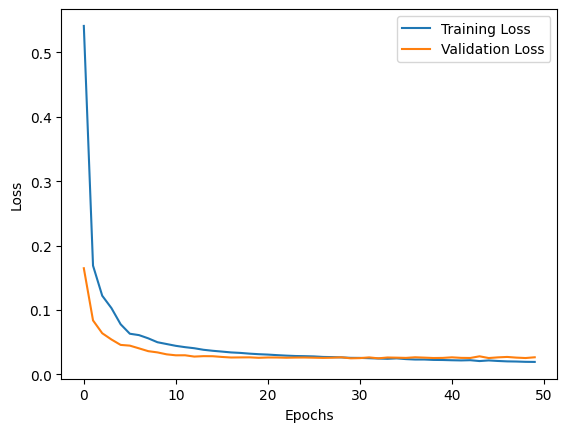

In [103]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


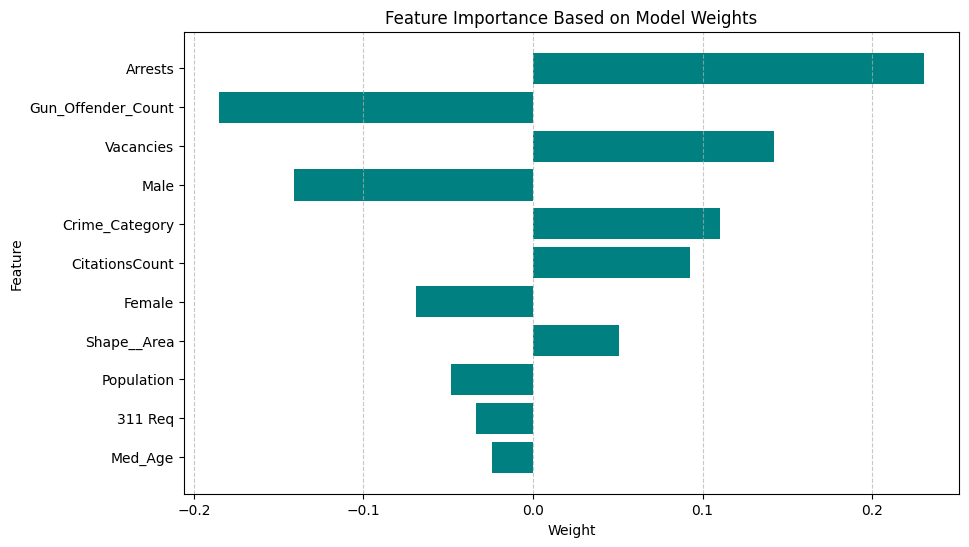

In [104]:
import matplotlib.pyplot as plt

# Extract weights from the first layer
weights = model.layers[0].get_weights()[0]

# Map weights to feature names
feature_names = X.columns
weight_map = dict(zip(feature_names, weights.flatten()))

# Sort features by weight magnitude
sorted_weights = sorted(weight_map.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract sorted feature names and their corresponding weights
features_sorted = [x[0] for x in sorted_weights]
weights_sorted = [x[1] for x in sorted_weights]

# Plot the sorted feature weights
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, weights_sorted, color='teal')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Model Weights')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest weight at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


we can infer that there is a positive correlation between arrests, crime category, population, vacancies, and the female population with higher rates of violent crime within Baltimore neighborhoods from 2010 to 2023.

### RNN

In [105]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [106]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.9 MB/s eta 0:00:00


In [107]:
# Importing basic tensorflow modules

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, SimpleRNN, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [108]:
data.shape
data.sample(5)

Neighborhood  Violent_Crimes  Vacancies  Gun_Offender_Count  Arrests  \
114        IRVINGTON             456       19.0                16.0   1054.0   
105     HOES HEIGHTS              11        0.0                 0.0     80.0   
234       WALTHERSON             306        9.0                 9.0    856.0   
12   BELAIR-PARKSIDE              47        1.0                 0.0    247.0   
147         MILLHILL             380       58.0                 4.0   1386.0   

     CitationsCount  311 Req  Population    Male  Female    Med_Age  \
114            30.0    35685      3743.0  1711.0  2032.0  39.299999   
105             0.0     7991       930.0   450.0   480.0  39.299999   
234            22.0    59344      6181.0  2898.0  3283.0  40.500000   
12              4.0     6763       449.0   207.0   242.0  37.099998   
147            39.0    25564      1404.0   682.0   722.0  37.200001   

      Shape__Area  Crime_Category  
114  2.413899e+07             1.0  
105  2.159542e+06             0.0  
234  2.060551e+07             1.0  
12   9.546408e+05             0.0  
147  5.879578e+06             1.0

In [109]:
import numpy as np

# Define a function that arranges the dataset in the form of (B,T,d) numpy array (T=n_day)
def time_sequence(data, n_day):
    X = []
    y = []
    for i in range(len(data)-n_day):
        a = []
        for j in range(n_day):
            a.append([data.iloc[i+j]['Vacancies'], data.iloc[i+j]['Gun_Offender_Count'], data.iloc[i+j]['Arrests'], data.iloc[i+j]['CitationsCount'], data.iloc[i+j]['311 Req'], data.iloc[i+j]['Population'], data.iloc[i+j]['Male'], data.iloc[i+j]['Female'], data.iloc[i+j]['Med_Age'], data.iloc[i+j]['Shape__Area']])
        b = data.iloc[i+n_day]['Violent_Crimes']  # Assuming 'Violent_Crimes' is the target variable
        X.append(a)
        y.append(b)
    X = np.array(X)
    y = np.array(y)
    return X, y

# Assuming df is your DataFrame containing the dataset
n_day = 5  # Number of days in each sequence
X, y = time_sequence(data, n_day)


In [110]:
# Forming the sequence input data for the interval of 50 days

n_days = 50

start_time = time.time()
X, y = time_sequence(data, n_days)
print("Computing time: %s seconds" % (round(time.time() - start_time, 3)))

Computing time: 10.312 seconds


In [111]:
print('Xshape: ', X.shape)
print('Y shape:', y.shape)

Xshape:  (207, 50, 10)
Y shape: (207,)


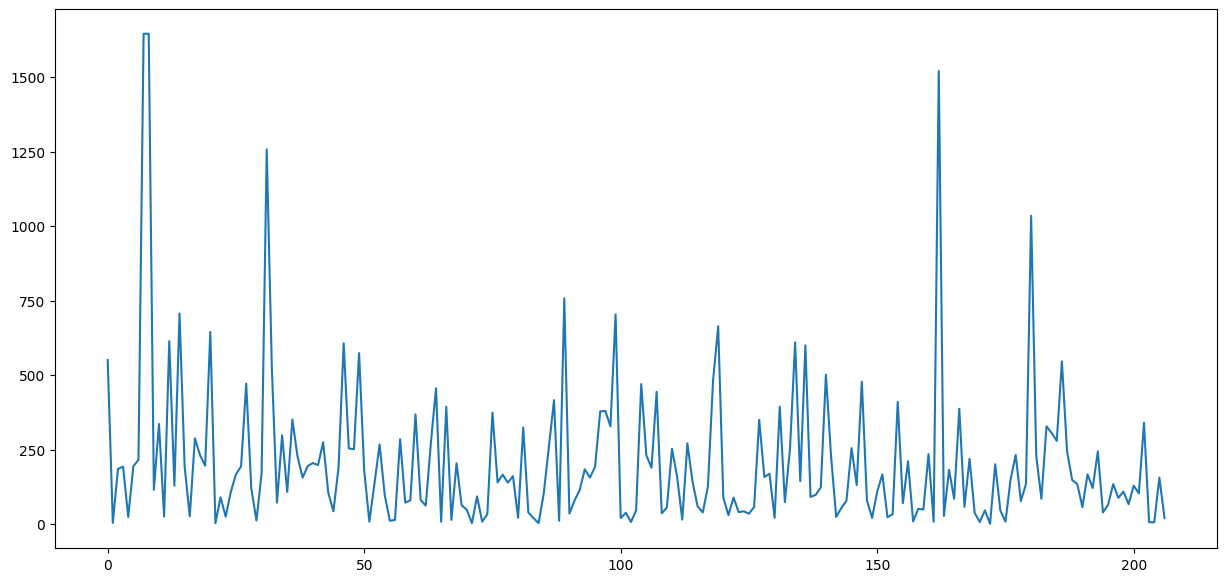

In [112]:
plt.subplots(figsize = (15,7))
plt.plot(y)
plt.show()

In [113]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [114]:
# Displaying the shape of the train and test datasets

print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (155, 50, 10)
y_train shape : (155,)
X_test shape : (52, 50, 10)
y_test shape : (52,)


In [115]:
# Converting data into tensorflow tensor objects and presenting the shape of tensors

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (155, 50, 10)
y_train shape :  (155,)
X_test shape :  (52, 50, 10)
y_test shape :  (52,)


#### Single Layer RNN model

In [116]:


# Creating a simple function that builds a simple RNN neural network
def create_rnn_model(n_neurons, shape, learning_rate):
    model = Sequential()
    model.add(SimpleRNN(n_neurons, input_shape=shape, activation='tanh'))   # One RNN layer
    model.add(Dense(1))                                                     # A linear layer to final output
    adam = Adam(learning_rate=learning_rate)                                # Choice of optimizer
    # Compiling the model by specifying the choice of loss function ('mse'), and performance metrics
    model.compile(loss='mse', optimizer=adam, metrics=['mse', tfa.metrics.RSquare()])
    return model

# Example usage
n_neurons = 64  # Number of neurons in the RNN layer
shape = (X.shape[1], X.shape[2])  # Shape of input data (number of time steps, number of features)
learning_rate = 0.001  # Learning rate for the optimizer

# Creating the RNN model
rnn_model = create_rnn_model(n_neurons, shape, learning_rate)
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4800      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


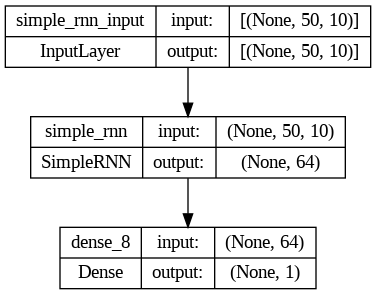

In [117]:
plot_model(rnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [118]:
# Training the model for  epochs

epochs = 50

rnn_model_history = rnn_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
5/5 [==============================] - 2s 101ms/step - loss: 126431.8984 - mse: 126431.8984 - r_square: -0.6673 - val_loss: 56493.0703 - val_mse: 56493.0703 - val_r_square: -0.8360
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 126294.3125 - mse: 126294.3125 - r_square: -0.6654 - val_loss: 56389.6836 - val_mse: 56389.6836 - val_r_square: -0.8326
Epoch 3/50
5/5 [==============================] - 0s 25ms/step - loss: 126154.5547 - mse: 126154.5547 - r_square: -0.6636 - val_loss: 56287.5859 - val_mse: 56287.5859 - val_r_square: -0.8293
Epoch 4/50
5/5 [==============================] - 0s 24ms/step - loss: 126007.7578 - mse: 126007.7578 - r_square: -0.6617 - val_loss: 56186.7109 - val_mse: 56186.7109 - val_r_square: -0.8260
Epoch 5/50
5/5 [==============================] - 0s 24ms/step - loss: 125863.5625 - mse: 125863.5625 - r_square: -0.6598 - val_loss: 56086.6289 - val_mse: 56086.6289 - val_r_square: -0.8228
Epoch 6/50
5/5 [============================

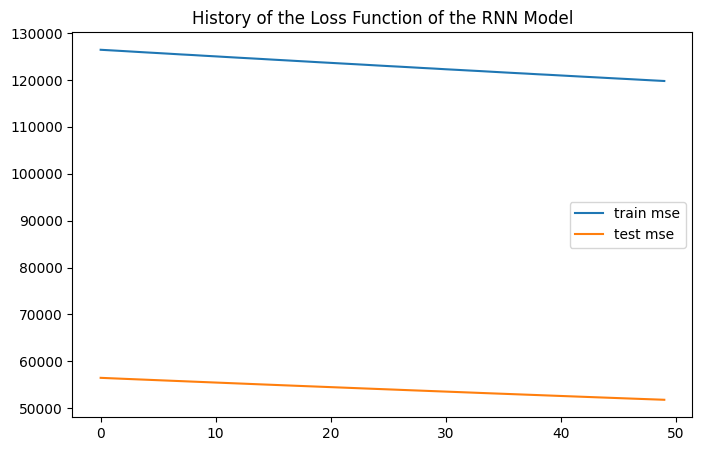

In [119]:
# Plotting the loss function from model's history

plt.figure(figsize=(8,5))
plt.plot(rnn_model_history.history['mse'], label = 'train mse')
plt.plot(rnn_model_history.history['val_mse'], label = 'test mse')
plt.title('History of the Loss Function of the RNN Model')
plt.legend(['train mse', 'test mse'])
plt.show()

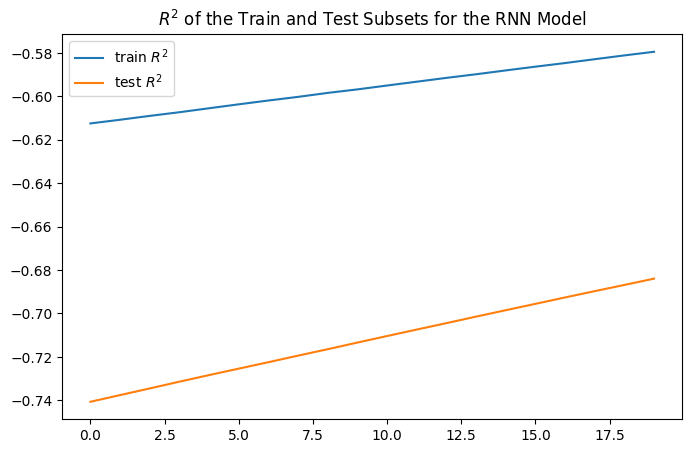

In [120]:
# Plotting R^2 score from model's history

plt.figure(figsize=(8,5))
plt.plot(rnn_model_history.history['r_square'][30:], label = 'train r^2')
plt.plot(rnn_model_history.history['val_r_square'][30:], label = 'test r^2')
plt.title(r'$R^2$ of the Train and Test Subsets for the RNN Model')
plt.legend([r'train $R^2$', r'test $R^2$'])
plt.show()

In [121]:
rnn_y_pred = rnn_model.predict(tf.convert_to_tensor(X))

7/7 [==============================] - 0s 5ms/step


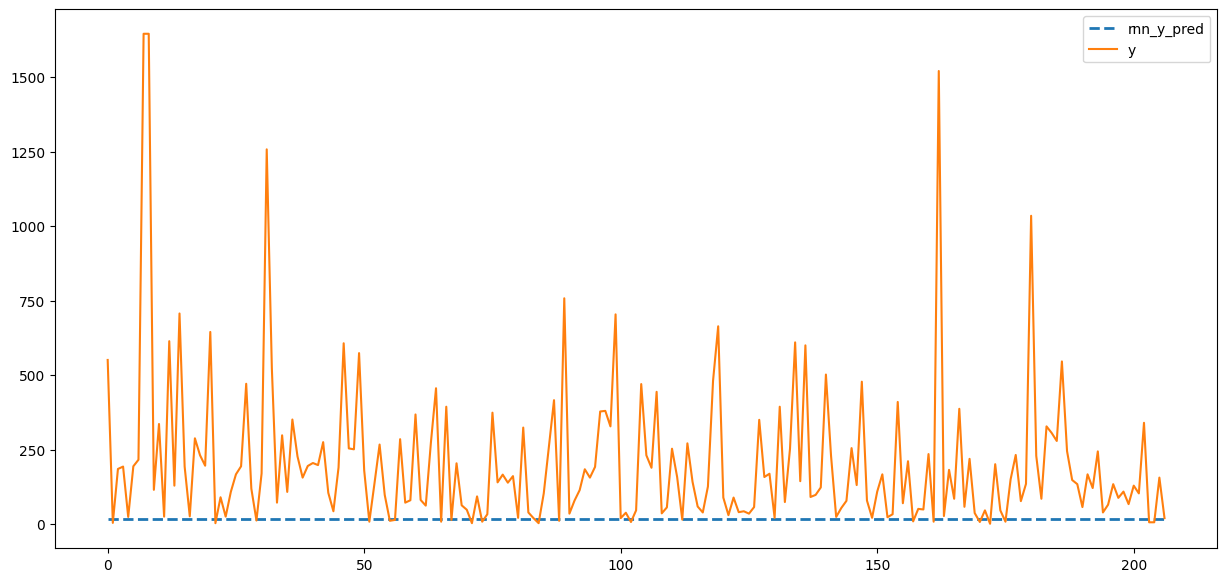

In [122]:
# Plotting the prediction vs the true behavior of the target

plt.figure(figsize = (15,7))
plt.plot(rnn_y_pred, ls='--', label='rnn_y_pred', lw=2)
plt.plot(y, label='y')
plt.legend()
plt.show()

#### Single Layer LSTM model

In [123]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv'
df = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()

(df_info, df_head, missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood        257 non-null    object 
 1   Violent_Crimes      257 non-null    int64  
 2   Vacancies           257 non-null    float64
 3   Gun_Offender_Count  257 non-null    float64
 4   Arrests             257 non-null    float64
 5   CitationsCount      257 non-null    float64
 6   311 Req             257 non-null    int64  
 7   Population          257 non-null    float64
 8   Male                257 non-null    float64
 9   Female              257 non-null    float64
 10  Med_Age             257 non-null    float64
 11  Shape__Area         257 non-null    float64
 12  Crime_Category      257 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 26.2+ KB


(None,
         Neighborhood  Violent_Crimes  Vacancies  Gun_Offender_Count  Arrests  \
 0              ABELL              96        2.0                 2.0    280.0   
 1          ALLENDALE             338       29.0                 9.0    889.0   
 2            ARCADIA              72        0.0                 1.0    346.0   
 3          ARLINGTON             348       51.0                 7.0   2226.0   
 4  ARMISTEAD GARDENS             170        0.0                 0.0    443.0   
 
    CitationsCount  311 Req  Population    Male  Female    Med_Age  \
 0             3.0    15612       975.0   473.0   502.0  33.400002   
 1            10.0    40209      3354.0  1489.0  1865.0  43.700001   
 2             6.0    15160      1077.0   501.0   576.0  41.900002   
 3            27.0    27143      2163.0  1034.0  1129.0  49.299999   
 4             1.0     8528      3779.0  1822.0  1957.0  34.299999   
 
     Shape__Area  Crime_Category  
 0  2.033969e+06             0.0  
 1  1.195420e

In [124]:
import pandas as pd
# Preprocess the dataset
# One-hot encode categorical variables like 'Neighborhood'
df_encoded = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# Exclude 'Violent_Crimes' as the target
X = df_encoded.drop(columns=['Violent_Crimes']).values
y = df_encoded['Violent_Crimes'].values


In [125]:
pip install tensorflow

In [126]:
import numpy as np

# Convert DataFrame to NumPy arrays
X = df.drop(columns=['Neighborhood', 'Crime_Category']).values
y = df['Violent_Crimes'].values

# Reshape X for RNN input shape (samples, time steps, features)
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape, activation='tanh'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mse', optimizer='adam', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])
    return model

# Initialize the model
rnn_model = create_rnn_model((1, X.shape[1]))

# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = rnn_model.predict(X_test)

# Evaluate model performance
train_loss = rnn_model.evaluate(X_train, y_train, verbose=0)
test_loss = rnn_model.evaluate(X_test, y_test, verbose=0)

train_loss, test_loss


Epoch 1/50
7/7 [==============================] - 2s 58ms/step - loss: 130704.5469 - mse: 130704.5469 - root_mean_squared_error: 361.5309 - val_loss: 109505.6719 - val_mse: 109505.6719 - val_root_mean_squared_error: 330.9164
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 130502.0156 - mse: 130502.0156 - root_mean_squared_error: 361.2506 - val_loss: 109305.3672 - val_mse: 109305.3672 - val_root_mean_squared_error: 330.6136
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 130309.3750 - mse: 130309.3750 - root_mean_squared_error: 360.9839 - val_loss: 109102.7891 - val_mse: 109102.7891 - val_root_mean_squared_error: 330.3071
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 130109.2266 - mse: 130109.2266 - root_mean_squared_error: 360.7066 - val_loss: 108905.0938 - val_mse: 108905.0938 - val_root_mean_squared_error: 330.0077
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 129913.5547 - mse: 129913.5547

([121502.0546875, 121502.0546875, 348.5714416503906],
 [100332.734375, 100332.734375, 316.75341796875])

In [127]:
# Refined RNN Model with LSTM layer
from tensorflow.keras.layers import LSTM, Dropout

# Define the refined RNN model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, activation='tanh', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mse', optimizer='adam', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])
    return model

# Initialize the refined model
lstm_model = create_lstm_model((1, X.shape[1]))

# Train the refined model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Make predictions
lstm_y_pred = lstm_model.predict(X_test)

# Evaluate refined model performance
train_loss_lstm = lstm_model.evaluate(X_train, y_train, verbose=0)
test_loss_lstm = lstm_model.evaluate(X_test, y_test, verbose=0)

(train_loss_lstm, test_loss_lstm)


Epoch 1/50
7/7 [==============================] - 10s 177ms/step - loss: 130701.1016 - mse: 130701.1016 - root_mean_squared_error: 361.5261 - val_loss: 109488.6172 - val_mse: 109488.6172 - val_root_mean_squared_error: 330.8907
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 130488.7188 - mse: 130488.7188 - root_mean_squared_error: 361.2322 - val_loss: 109246.0547 - val_mse: 109246.0547 - val_root_mean_squared_error: 330.5239
Epoch 3/50
7/7 [==============================] - 0s 13ms/step - loss: 130235.0938 - mse: 130235.0938 - root_mean_squared_error: 360.8810 - val_loss: 108977.1562 - val_mse: 108977.1562 - val_root_mean_squared_error: 330.1169
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 129979.8281 - mse: 129979.8281 - root_mean_squared_error: 360.5272 - val_loss: 108664.8438 - val_mse: 108664.8438 - val_root_mean_squared_error: 329.6435
Epoch 5/50
7/7 [==============================] - 0s 16ms/step - loss: 129616.8125 - mse: 129616.8

([119357.7890625, 119357.7890625, 345.4819641113281],
 [98171.2890625, 98171.2890625, 313.3229675292969])

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, activation='tanh', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mse', optimizer='adam', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])
    return model


In [129]:
lstm_model = create_lstm_model((1, X.shape[1]))
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
7/7 [==============================] - 5s 180ms/step - loss: 130668.1172 - mse: 130668.1172 - root_mean_squared_error: 361.4804 - val_loss: 109445.2891 - val_mse: 109445.2891 - val_root_mean_squared_error: 330.8252
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 130444.5156 - mse: 130444.5156 - root_mean_squared_error: 361.1710 - val_loss: 109208.9844 - val_mse: 109208.9844 - val_root_mean_squared_error: 330.4678
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 130210.7734 - mse: 130210.7734 - root_mean_squared_error: 360.8473 - val_loss: 108931.0938 - val_mse: 108931.0938 - val_root_mean_squared_error: 330.0471
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 129889.1797 - mse: 129889.1797 - root_mean_squared_error: 360.4014 - val_loss: 108614.2969 - val_mse: 108614.2969 - val_root_mean_squared_error: 329.5668
Epoch 5/50
7/7 [==============================] - 0s 16ms/step - loss: 129581.5938 - mse: 129581.59

In [130]:
lstm_y_pred = lstm_model.predict(X_test)
train_loss_lstm = lstm_model.evaluate(X_train, y_train, verbose=0)
test_loss_lstm = lstm_model.evaluate(X_test, y_test, verbose=0)


2/2 [==============================] - 1s 8ms/step


In [131]:
pip install keras-tuner

In [132]:
# Install keras-tuner if not already installed
# pip install keras-tuner

from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        # Choose the number of units dynamically
        units1 = hp.Int('units1', min_value=32, max_value=256, step=32)
        model.add(LSTM(units1, activation='tanh', return_sequences=True))
        model.add(Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))

        # Second layer
        units2 = hp.Int('units2', min_value=32, max_value=256, step=32)
        model.add(LSTM(units2, activation='tanh'))
        model.add(Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))

        model.add(Dense(1))  # Output layer for regression

        # Tune the optimizer learning rate
        learning_rate = hp.Float('lr', 1e-4, 1e-2, sampling='log')
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

        model.compile(optimizer=optimizer, loss='mse', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])
        return model

# Instantiate the tuner
tuner = RandomSearch(
    LSTMHyperModel(),
    objective='val_loss',
    max_trials=10,  # Increase for thorough search
    executions_per_trial=1,
    directory='my_tuning_results',
    project_name='lstm_tuning'
)

# Run the tuning process
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Trial 10 Complete [00h 00m 21s]
val_loss: 72942.96875

Best val_loss So Far: 63318.34765625
Total elapsed time: 00h 03m 52s


In [133]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)


{'units1': 96, 'dropout1': 0.1, 'units2': 160, 'dropout2': 0.30000000000000004, 'lr': 0.004098638142173078}


In [ ]:
print(df.shape)

(257, 13)


In [ ]:
timesteps = X_train.shape[1]  # Number of time steps
features = X_train.shape[2]   # Number of features

# Define model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(timesteps, features)))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
7/7 [==============================] - 3s 108ms/step - loss: 130486.8203 - val_loss: 109357.4297
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 130404.5859 - val_loss: 109284.3750
Epoch 3/50
7/7 [==============================] - 0s 18ms/step - loss: 130330.3594 - val_loss: 109210.5781
Epoch 4/50
7/7 [==============================] - 0s 16ms/step - loss: 130259.9922 - val_loss: 109135.9922
Epoch 5/50
7/7 [==============================] - 0s 17ms/step - loss: 130187.8281 - val_loss: 109062.0391
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 130115.2109 - val_loss: 108989.4844
Epoch 7/50
7/7 [==============================] - 0s 16ms/step - loss: 130043.6797 - val_loss: 108917.0156
Epoch 8/50
7/7 [==============================] - 0s 13ms/step - loss: 129970.5000 - val_loss: 108844.4531
Epoch 9/50
7/7 [==============================] - 0s 13ms/step - loss: 129900.1562 - val_loss: 108771.6250
Epoch 10/50
7/7 [===================

In [134]:
import tensorflow as tf

# Define your LSTM model with the appropriate input shape
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, input_shape=(1, 266)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [135]:
# Example of defining X_test_trimmed (assuming X_test is already defined)
X_test_trimmed = X_test[:100]  # Take the first 100 samples as an example


In [138]:
import numpy as np

# Define the index you want to use
i = 0  # Example index, adjust as needed

# Desired shape and padding logic
desired_shape = (1, 1, 266)  # Define the desired shape
padded_input = np.zeros(desired_shape)  # Pad with zeros
padded_input[:, :, :X_test_trimmed.shape[2]] = X_test_trimmed[i]  # Copy existing features to the padded input


In [142]:
import tensorflow as tf

def compute_gradients(model, x, y):
    with tf.GradientTape() as tape:
        tape.watch(x)  # Ensure that the tape is watching the input tensor
        predictions = model(x)  # Pass the input through the model to get predictions
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, predictions))  # Calculate the loss

    # Compute gradients of the loss with respect to the input tensor
    gradients = tape.gradient(loss, x)
    return gradients


In [146]:
import tensorflow as tf

def compute_gradients(model, x, y):
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)  # Get model predictions
        # Reshape y to match the shape of predictions
        y_reshaped = tf.reshape(y, predictions.shape)
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_reshaped, predictions))

    gradients = tape.gradient(loss, x)
    return gradients

# Rest of the code remains the same
import numpy as np

desired_shape = (1, 1, 266)
all_gradients = np.zeros((len(X_test_trimmed), desired_shape[2]))

for i in range(len(X_test_trimmed)):
    padded_input = np.zeros(desired_shape)
    padded_input[:, :, :X_test_trimmed[i].shape[1]] = X_test_trimmed[i]

    sample = tf.convert_to_tensor(padded_input, dtype=tf.float32)
    y_sample = tf.convert_to_tensor([y_test[i]], dtype=tf.float32)  # This tensor is now a single dimension array

    gradients = compute_gradients(model, sample, y_sample)
    all_gradients[i] = gradients.numpy().reshape(-1)

aggregated_gradients = np.mean(np.abs(all_gradients), axis=0)


Number of feature names: 10
Number of gradients: 266


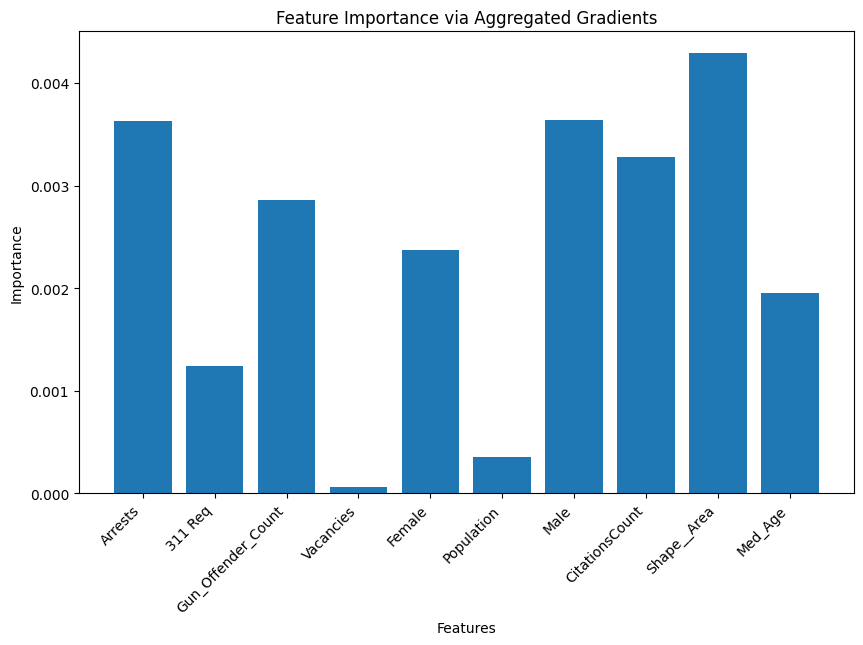

In [147]:
import matplotlib.pyplot as plt

encoded_features = [
    "Arrests",
    "311 Req",
    "Gun_Offender_Count",
    "Vacancies",
    "Female",
    "Population",
    "Male",
    "CitationsCount",
    "Shape__Area",
    "Med_Age"
] # Define your feature names here

# Print the lengths of both lists to verify mismatched sizes
print(f"Number of feature names: {len(encoded_features)}")
print(f"Number of gradients: {len(aggregated_gradients)}")

# Ensure the gradients array is trimmed to match the available feature names
if len(encoded_features) < len(aggregated_gradients):
    aggregated_gradients_to_plot = aggregated_gradients[:len(encoded_features)]
else:
    aggregated_gradients_to_plot = aggregated_gradients

# Plot using the adjusted lists
plt.figure(figsize=(10, 6))
plt.bar(encoded_features, aggregated_gradients_to_plot)
plt.title('Feature Importance via Aggregated Gradients')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


##Ensemble Techniques

* Logisitic Regression - Joseph
* Random Forest and Adaptive Boosting - Alex
* Stacking Classifier - Joseph

In [148]:
import pandas as pd
crime_df = pd.read_csv('Nei_Violent_Crime.csv')
crime_df.head()

Neighborhood  Violent_Crimes  Vacancies  Gun_Offender_Count  Arrests  \
0              ABELL              96        2.0                 2.0    280.0   
1          ALLENDALE             338       29.0                 9.0    889.0   
2            ARCADIA              72        0.0                 1.0    346.0   
3          ARLINGTON             348       51.0                 7.0   2226.0   
4  ARMISTEAD GARDENS             170        0.0                 0.0    443.0   

   CitationsCount  311 Req  Population    Male  Female    Med_Age  \
0             3.0    15612       975.0   473.0   502.0  33.400002   
1            10.0    40209      3354.0  1489.0  1865.0  43.700001   
2             6.0    15160      1077.0   501.0   576.0  41.900002   
3            27.0    27143      2163.0  1034.0  1129.0  49.299999   
4             1.0     8528      3779.0  1822.0  1957.0  34.299999   

    Shape__Area  Crime_Category  
0  2.033969e+06             0.0  
1  1.195420e+07             1.0  
2  6.301562e+06             0.0  
3  5.034912e+06             1.0  
4  1.345781e+07             0.0

In [149]:
from sklearn.model_selection import train_test_split

X = crime_df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', '311 Req', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area']]
y = crime_df['Crime_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [150]:
#check balance of dataset
print('The Size of Low Violent Crime Neighborhoods:', len(crime_df[crime_df['Crime_Category'] == 0]))
print('The Size of High Violent Crime Neighborhoods:', len(crime_df[crime_df['Crime_Category'] == 1]))

The Size of Low Violent Crime Neighborhoods: 190
The Size of High Violent Crime Neighborhoods: 67


As you can see, the dataset is slightly unbalanced with 191 low violent crime neighborhoods to 67 high violent crime neighborhoods.

###Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

train_y_pred = lr.predict(X_train)
test_y_pred = lr.predict(X_test)

train_report = classification_report(y_train, train_y_pred)
test_report = classification_report(y_test, test_y_pred)
print('Train Classification Report: \n\n', train_report,'\n\n')
print('Test Classification Report: \n\n', test_report)

Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       134
         1.0       0.60      0.78      0.68        45

    accuracy                           0.82       179
   macro avg       0.76      0.80      0.78       179
weighted avg       0.84      0.82      0.82       179
 


Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88        56
         1.0       0.70      0.73      0.71        22

    accuracy                           0.83        78
   macro avg       0.79      0.80      0.80        78
weighted avg       0.84      0.83      0.83        78



Logistic Regression gives acceptable results when comparing the test and train classification reports. The class 0 precision, recall, and f1-scores are close to ideal for test and train (around .9). The class 1 precision, recall, and f1-scores are significantly lower, but are still acceptable (hovering around .7). Overall the model seems to do well with class 0 data and struggles a bit more with data for class 1.

A flaw in our data would be the support. As there are not an exorbitant number of nieghborhoods in Baltimore to choose from our dataset is fairly limited. This can result in a biased model, overfitting, or lack of full representation of certain features.

Overall, with the data available, a logistic regression model has an accetable performance.

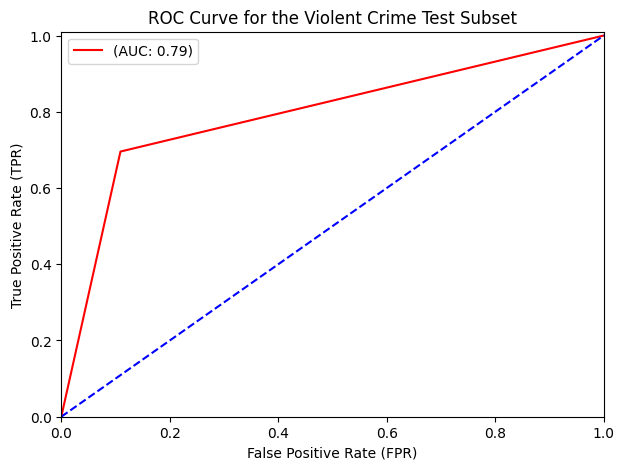

In [152]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='(AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Violent Crime Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

The AUC value of .79 suggests that our model does a fair to good job accurately classifying positive and negative samples.

In [153]:
coef = lr.coef_[0]
f = X.columns
fea_imp = {}
cnt = 0
for col in X.columns:
  fea_imp[col] = coef[cnt]
  cnt += 1

fea_imp

{'Vacancies': 0.00010926665788827316,
 'Gun_Offender_Count': 0.00014758679226746288,
 'Arrests': 0.0024528149019376233,
 'CitationsCount': 0.0009031300249893839,
 '311 Req': -4.9718545191472894e-05,
 'Population': -0.00014757960144370311,
 'Male': -0.005097477483830361,
 'Female': 0.004949897882418257,
 'Med_Age': -0.0059400629944545355,
 'Shape__Area': -1.259881388397001e-07}

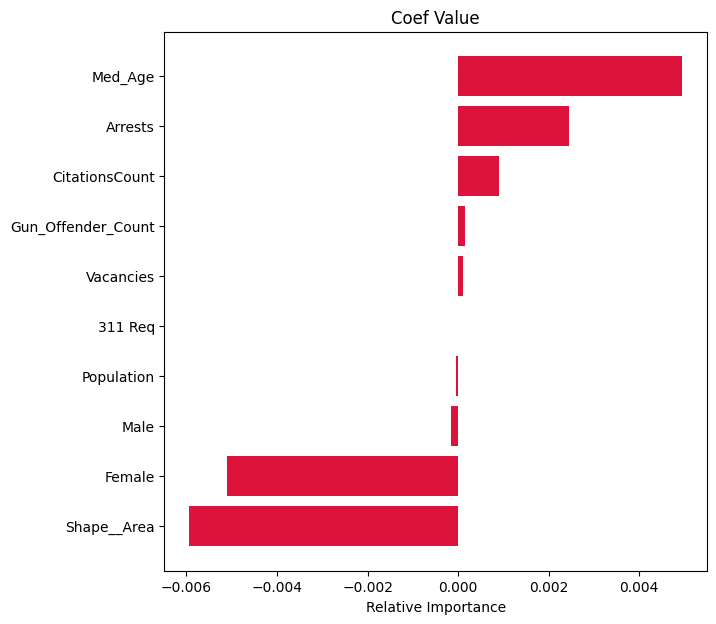

In [154]:
import numpy as np

sorted_idx = np.argsort(coef)
cols = ['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area', '311 Req']

sorted_cols = [cols[i] for i in sorted_idx]
pos=np.arange(sorted_idx.shape[0])+0.5

plt.figure(figsize=(7, 7))
plt.title("Coef Value")
plt.xlabel('Relative Importance')
plt.barh(pos, coef[sorted_idx], color='crimson', align="center")
plt.yticks(pos, np.array(cols)[sorted_idx])
plt.show()

As shown above, the logistic regression model has a very strong positive relationship with Med_Age and Arrests. Median age is very interesting because that means the older a neighborhood is the liklier it is to have high crime. On the other hand, arrests makes sense as many records of violent crimes result in one or multiple arrests.

Interestingly, on the other end of the spectrum we have 'female' and 'shape area'. Intuitively, we know males commit more crime than females, but it is cool to see this displayed in our model. Shape area makes sense as well (to a certain degree). The area is a bit more confusing because you would think that the larger an area, the more chance for crime.

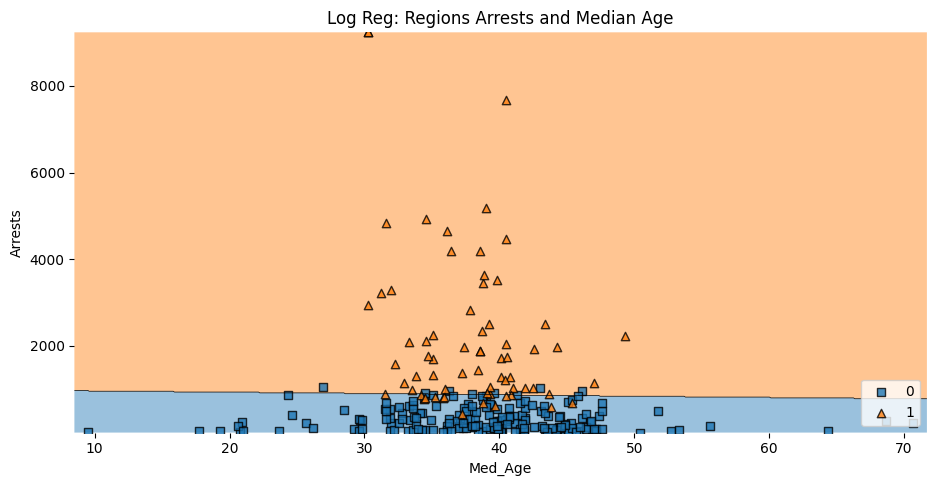

In [155]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

#plotting with only arrests and citation count features

X = crime_df[['Med_Age', 'Arrests']].values

lr_clf = LogisticRegression()
lr_clf.fit(X, y)

plot_decision_regions(X=X, y=crime_df['Crime_Category'].values.astype(np.int_), clf=lr_clf, legend=2)

plt.title('Log Reg: Regions Arrests and Median Age')
plt.xlabel('Med_Age')
plt.ylabel('Arrests')
plt.legend(loc='lower right')

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.show()

Here is a graph showing the high and low violent crime nieghborhoods when only looking at median age and arrests.

To me, it seems there is a pretty clear age range where violent crime is more likely (all high crime neighborhoods fall between age 30 and 50). You can likely rule out a neighborhood as 'high crime' if it has a median age not between those values.

It is important to note, just because a neighborhood has a median age betweeen 30 and 50 does not mean a neighborhood is high crime. As seen on the graph, there are a large amount of not 'high crime' nieghborhoods in that range.

We can also see as the amount of arrests increase in a certain neighborhood, so does the chance that a neighborhood is categorized as 'high crime'. This visualization does a good job showing that relationship.

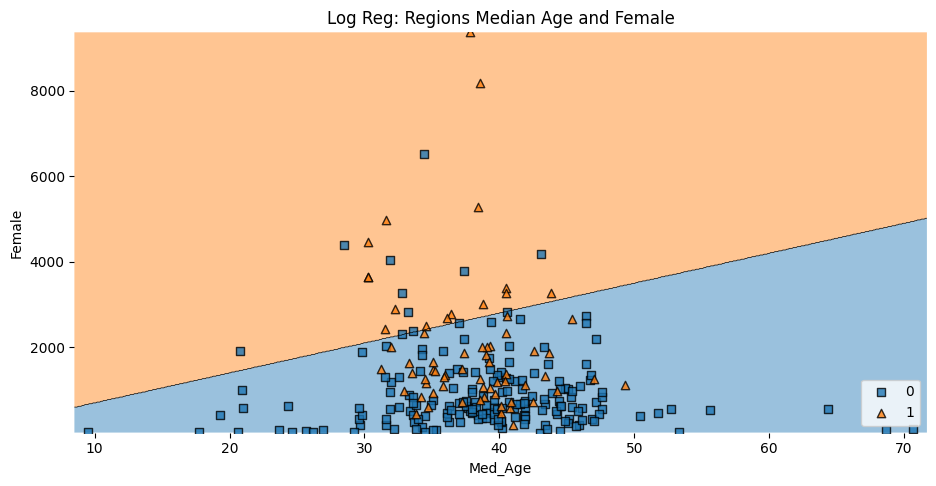

In [156]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

#plotting with only arrests and citation count features

X = crime_df[['Med_Age', 'Female']].values

lr_clf = LogisticRegression()
lr_clf.fit(X, y)

plot_decision_regions(X=X, y=crime_df['Crime_Category'].values.astype(np.int_), clf=lr_clf, legend=2)

plt.title('Log Reg: Regions Median Age and Female')
plt.xlabel('Med_Age')
plt.ylabel('Female')
plt.legend(loc='lower right')

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.show()

As a juxtaposition to the first graph, let's look at Med_Age and Female. This graph, similar to the 'Shape__Area'/'arrests' graph below may not have many positively correlated takeaways. As seen in the graph, There doesn't seem to be any immediate pattern between increase in 'female' and violent crime. In fact, the less a neighborhood has female population, the likelier a neighborhood will be 'high crime'.

I would take that preivous claim with a hesitation though, because as you can see, there are plenty of low female population neighborhoods that are in class 0 as well. There may not be much to takeaway from this feature.

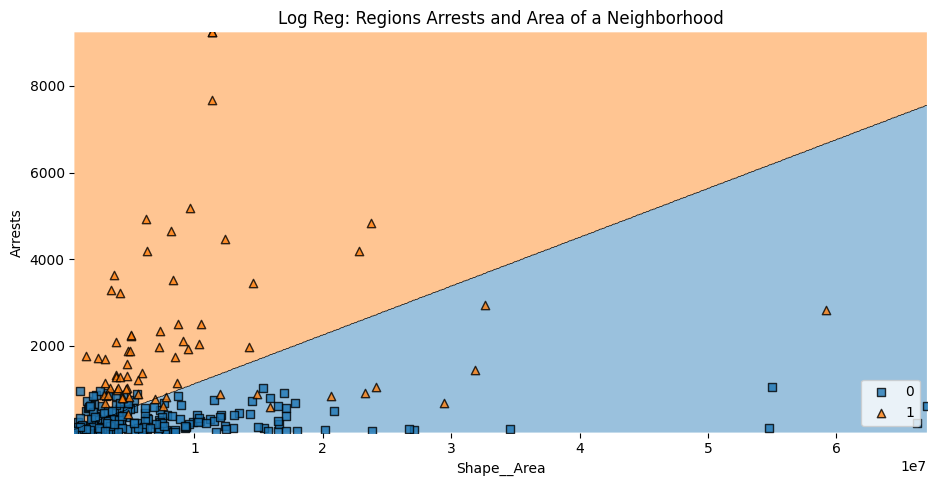

In [157]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

#plotting with only arrests and citation count features

X = crime_df[['Shape__Area', 'Arrests']].values

lr_clf = LogisticRegression()
lr_clf.fit(X, y)

plot_decision_regions(X=X, y=crime_df['Crime_Category'].values.astype(np.int_), clf=lr_clf, legend=2)

plt.title('Log Reg: Regions Arrests and Area of a Neighborhood')
plt.xlabel('Shape__Area')
plt.ylabel('Arrests')
plt.legend(loc='lower right')

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.show()

Lastly, as a pivot from the first two graphs, lets look at a negative coefficient in place of median age. When looking at the area of a neighborhood, it may be coincidence that the area has a strong relationship with not having high crime.

Based on the chart, it seems like most neighborhoods are of similar area. It would then make sense that most 'high crime' neighborhoods are on the smaller side, but that doesn't mean a small neighborhood has high crime. As seen in the visualization, there are plenty of neighborhoods that are small that fall in class 0 as well. In addition, of the few that are a bit larger, they have low arrests (for the most part), thus there is not a lot of crime. So, as a result, rather than area of a neighborhood being a good indicator of crime, it may have little effect.

It's a similar takeaway as the female chart. While high crime neighborhoods tend to be small, so do class 0 neighborhoods.

###Random Forest Classifier

In [158]:
# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

In [159]:
# Defining the features and target variables
X = crime_df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area', '311 Req']]
y = crime_df['Crime_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [160]:
print('X Train:', X_train.shape)
print('y Train:', y_train.shape, '\n')
print('X Test:', X_test.shape)
print('y Test:', y_test.shape)

X Train: (179, 10)
y Train: (179,) 

X Test: (78, 10)
y Test: (78,)


In [161]:
rf_clf = RandomForestClassifier(max_depth=2, max_features='log2', max_leaf_nodes=9, n_estimators=25, random_state=3)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25, random_state=3)

[16.24627316 29.23077171 20.66478017 12.62939064  5.32826648  3.89551075
  1.94803972  1.08478909  0.73160401  8.24057427]


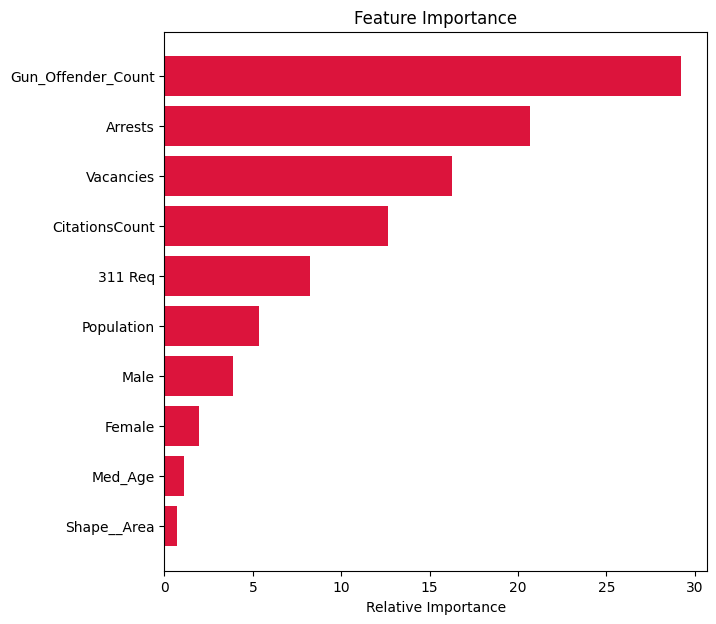

In [162]:
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
print(feature_importance)

sorted_idx = np.argsort(feature_importance)
cols = ['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area', '311 Req']

sorted_cols = [cols[i] for i in sorted_idx]
pos=np.arange(sorted_idx.shape[0])+0.5

plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, np.array(cols)[sorted_idx])
plt.show()

In [163]:
rf_top_features = X_train.columns[sorted_idx][-4:]
rf_top_features

Index(['CitationsCount', 'Vacancies', 'Arrests', 'Gun_Offender_Count'], dtype='object')

In [164]:
rf_train_y_pred = rf_clf.predict(X_train)
rf_test_y_pred = rf_clf.predict(X_test)

rf_train_report = classification_report(y_train, rf_train_y_pred)
rf_test_report = classification_report(y_test, rf_test_y_pred)

In [165]:
print('Top features with most impact:\n\n', rf_top_features, '\n')
print('Train Classification Report:\n\n', rf_train_report,'\n')
print('Test Classification Report:\n\n', rf_test_report)

Top features with most impact:

 Index(['CitationsCount', 'Vacancies', 'Arrests', 'Gun_Offender_Count'], dtype='object') 

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       134
         1.0       0.95      0.87      0.91        45

    accuracy                           0.96       179
   macro avg       0.95      0.93      0.94       179
weighted avg       0.96      0.96      0.95       179
 

Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        56
         1.0       0.95      0.82      0.88        22

    accuracy                           0.94        78
   macro avg       0.94      0.90      0.92        78
weighted avg       0.94      0.94      0.93        78



Random Forest Classifier model with max_depth=2, max_features='log2', max_leaf_nodes=9, and n_estimators=25 as hyperparameters to prevent overfitting was used with the dataset. The f1-score of this model is above 90% which is ideal. The train and test are also quite similar so there seems to be no overfitting occurring.

Additionally, in the Random Forest model 'CitationsCount', 'Vacancies', 'Gun_Offender_Count', and 'Arrests' are features that have the most impact on the model. However, 'Arrests' and 'Gun_Offender_Count' features contribute the most in shaping the model.

Random Forest Classifier was used to reduce the over-fitting seen prior. This is done by averaging the results of the model. It was used here to further prevent any over-fitting that may be present in the dataset.

###Adaptive Boosting

In [166]:
# Importing library
from sklearn.ensemble import AdaBoostClassifier

In [167]:
# Defining the features and target variables
X = crime_df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area', '311 Req']]
y = crime_df['Crime_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [168]:
# Defining the Adaptive Boosting model
ab_clf = AdaBoostClassifier(n_estimators=100, learning_rate=.009)

ab_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.009, n_estimators=100)

[ 1. 24. 72.  0.  0.  0.  0.  0.  0.  3.]


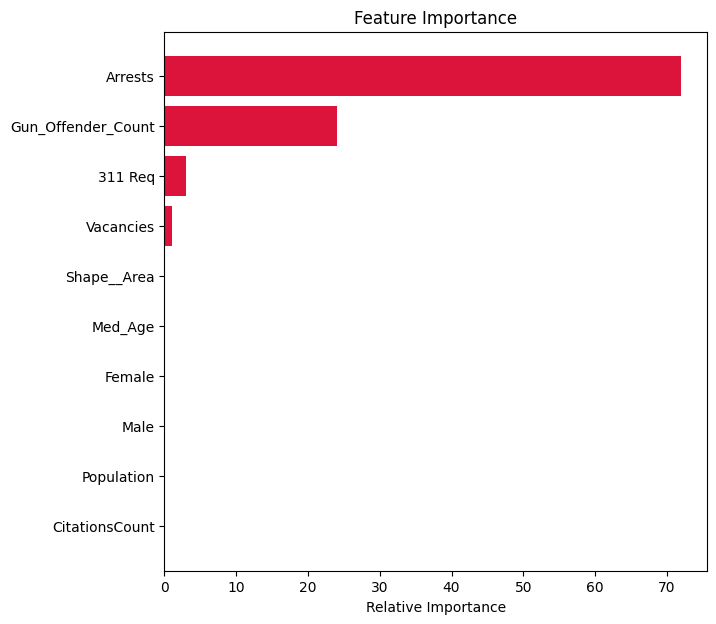

In [169]:
# Presenting the import features in a graph
feature_importance = ab_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
print(feature_importance)

sorted_idx = np.argsort(feature_importance)
cols = ['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', 'Population', 'Male', 'Female', 'Med_Age', 'Shape__Area', '311 Req']

sorted_cols = [cols[i] for i in sorted_idx]
pos=np.arange(sorted_idx.shape[0])+0.5

plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, np.array(cols)[sorted_idx])
plt.show()

In [170]:
# Gathering the the top features that contribute the most to the model
ab_top_features = X_train.columns[sorted_idx][-4:]

In [171]:
# Predictions for the accruacy of the model
ab_train_y_pred = ab_clf.predict(X_train)
ab_test_y_pred = ab_clf.predict(X_test)

ab_train_report = classification_report(y_train, ab_train_y_pred)
ab_test_report = classification_report(y_test, ab_test_y_pred)

In [172]:
# Presenting the results of the model
print('Top Features with most impact:\n\n', ab_top_features, '\n')
print('Train Classification Report:\n\n', ab_train_report,'\n')
print('Test Classification Report:\n\n', ab_test_report)

Top Features with most impact:

 Index(['Vacancies', '311 Req', 'Gun_Offender_Count', 'Arrests'], dtype='object') 

Train Classification Report:

               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       134
         1.0       0.97      0.80      0.88        45

    accuracy                           0.94       179
   macro avg       0.95      0.90      0.92       179
weighted avg       0.95      0.94      0.94       179
 

Test Classification Report:

               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        56
         1.0       0.95      0.86      0.90        22

    accuracy                           0.95        78
   macro avg       0.95      0.92      0.93        78
weighted avg       0.95      0.95      0.95        78



The Adaptive Boosting Classifier using n_estimators=100 and learning_rate=0.009 as hyperparameters to prevent the model from overfitting. The f1-score of the model is above 90% for unseen data, similarly to the Random Forest model. Additionally, 'arrests' and 'gun_offender_count' are shown to be the features that have the most impact on the Adaptive Boosting model. In fact, only 4 features have any impact on our model. It performs ideally based on the report above. Again the 'Arrests' and 'Gun_Offender_Count' features conrtibute the most to this model similar shown in the Random Forest Classifier model.

There is also no overfitting as our train data is also hovering around .9 for the precision, recall, and f1-score for both class 0 and class 1 as well.

Adaptive Boosting or AdaBoost is used for weak leaner and adaptive. This is because it is sensitive to data that consists of noise an outliers. The model was used here to prevent any noise and/or outliers from disrupting the outcome of the dataset.

###Stacking Classifier

In [173]:
from sklearn.ensemble import StackingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

est = [('ab', ab_clf), ('lr', lr), ('rf', rf_clf)]
sk_clf = StackingClassifier(estimators=est, final_estimator=LogisticRegression(), cv=5)
sk_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('ab',
                                AdaBoostClassifier(learning_rate=0.009,
                                                   n_estimators=100)),
                               ('lr', LogisticRegression()),
                               ('rf',
                                RandomForestClassifier(max_depth=2,
                                                       max_features='log2',
                                                       max_leaf_nodes=9,
                                                       n_estimators=25,
                                                       random_state=3))],
                   final_estimator=LogisticRegression())

In [174]:
train_y_pred = sk_clf.predict(X_train)
test_y_pred = sk_clf.predict(X_test)
train_report = classification_report(y_train, train_y_pred)
test_report = classification_report(y_test, test_y_pred)
print('Stacking Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Stacking Classifier Test Classification Report: \n\n', test_report)

Stacking Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       129
         1.0       0.96      0.90      0.93        50

    accuracy                           0.96       179
   macro avg       0.96      0.94      0.95       179
weighted avg       0.96      0.96      0.96       179
 


Stacking Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        61
         1.0       0.93      0.82      0.87        17

    accuracy                           0.95        78
   macro avg       0.94      0.90      0.92        78
weighted avg       0.95      0.95      0.95        78



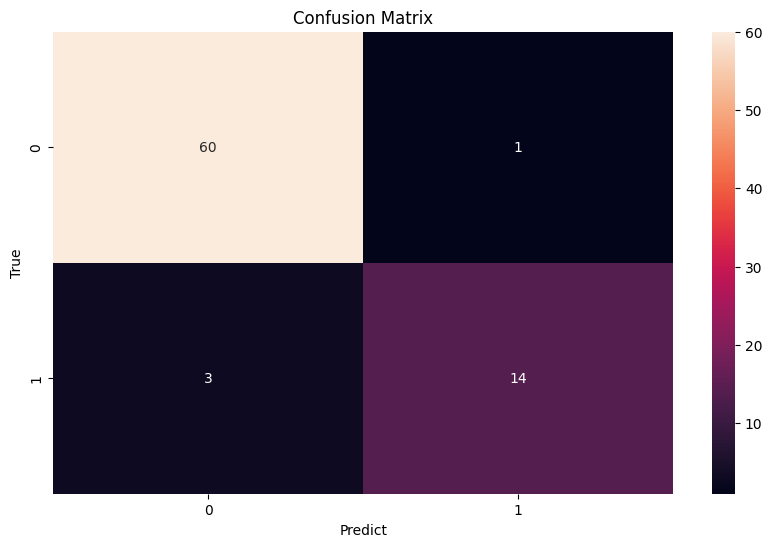

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

To reinforce the analysis above, here is a confusion matrix on the stacking classifier. As seen, there are only 4 misclassifications in the model out of 78 which is ideal performance (although accuracy is not a good measurement for our dataset).

As you can see above, a stacking classifier of the logistic regression classifier, adaptive boosting classifier, and the random forest classifier performs ideally as well. This makes sense as all 3 classifiers on their own also do very well. The scores of the stacking classifier are relatively similar to the other 3 models. I would say using a stacking classifier could be good to reinforce your confidence of your other models, but given the success of the other models, there is no need to spend more runtime on another model if not needed.

Again the main issue with our dataset is the sample size. This is a really hard problem to overcome with only neighborhoods related to Baltimore. If we were going to think about this question over a larger set of neighborhoods (for example, nationwide), it would allow for a much higher confidence in our model.

Based on the techniques used in our ensemble methods, some of the important features seem to be median age, gun offender count, and arrests. Overall, the techniques of Logistic Regression, Random Forest Classifier, Adaptive Boosting, and Stacking Classifier show similar results and have a good performance, but I would take them with a grain of salt. Intuitvely, I don't believe the classification problem of a 'high crime' neighborhood is as black and white as our project makes it seem. That is why I feel a bit less confident in binary classification.

## Linear regressor, polynomial(quadratic) regressor, tree regressor


Luis

In [176]:
import pandas as pd
import numpy as np
import pandas as pd
# Load the dataset
file_path = '/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv'
#file_path = '/content/Nei_Violent_Crime.csv'
df = pd.read_csv(file_path)
df.head()

Neighborhood  Violent_Crimes  Vacancies  Gun_Offender_Count  Arrests  \
0              ABELL              96        2.0                 2.0    280.0   
1          ALLENDALE             338       29.0                 9.0    889.0   
2            ARCADIA              72        0.0                 1.0    346.0   
3          ARLINGTON             348       51.0                 7.0   2226.0   
4  ARMISTEAD GARDENS             170        0.0                 0.0    443.0   

   CitationsCount  311 Req  Population    Male  Female    Med_Age  \
0             3.0    15612       975.0   473.0   502.0  33.400002   
1            10.0    40209      3354.0  1489.0  1865.0  43.700001   
2             6.0    15160      1077.0   501.0   576.0  41.900002   
3            27.0    27143      2163.0  1034.0  1129.0  49.299999   
4             1.0     8528      3779.0  1822.0  1957.0  34.299999   

    Shape__Area  Crime_Category  
0  2.033969e+06             0.0  
1  1.195420e+07             1.0  
2  6.301562e+06             0.0  
3  5.034912e+06             1.0  
4  1.345781e+07             0.0

In [177]:
unique_categories = df['Crime_Category'].unique()
print(unique_categories)

[0. 1.]


In [178]:
# Handling missing values by imputing the median
df['Vacancies'] = df['Vacancies'].fillna(df['Vacancies'].median())
df['Gun_Offender_Count'] = df['Gun_Offender_Count'].fillna(df['Gun_Offender_Count'].median())
df['CitationsCount'] = df['CitationsCount'].fillna(df['CitationsCount'].median())
df['311 Req'] = df['311 Req'].fillna(df['311 Req'].median())

# Check the dataset to ensure missing values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Neighborhood        257 non-null    object 
 1   Violent_Crimes      257 non-null    int64  
 2   Vacancies           257 non-null    float64
 3   Gun_Offender_Count  257 non-null    float64
 4   Arrests             257 non-null    float64
 5   CitationsCount      257 non-null    float64
 6   311 Req             257 non-null    int64  
 7   Population          257 non-null    float64
 8   Male                257 non-null    float64
 9   Female              257 non-null    float64
 10  Med_Age             257 non-null    float64
 11  Shape__Area         257 non-null    float64
 12  Crime_Category      257 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 26.2+ KB


In [179]:
# Count missing values in each column
missing_values_count = df.isna().sum()

# Print number of missing values in each column
print(missing_values_count)

Neighborhood          0
Violent_Crimes        0
Vacancies             0
Gun_Offender_Count    0
Arrests               0
CitationsCount        0
311 Req               0
Population            0
Male                  0
Female                0
Med_Age               0
Shape__Area           0
Crime_Category        0
dtype: int64


### Linear regression

We will start by training all our feature with out giving preference to the one with higher correlatio related to our target, to see how the model does and have a general idea of what is happening.

In [180]:
#Define the features to use and the target
X = df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', '311 Req', 'Population', 'Male', 'Female','Med_Age', 'Shape__Area']]  # Features
y = df['Violent_Crimes']  # Target

In [181]:
#We train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [182]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression

reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data
y_pred = reg.predict(X_test)     # Finding the predictions of the model for test dataset

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 2.57274030e-01  1.05097230e+01  1.56510549e-01 -2.63471230e-02
 -4.00167882e-04  1.01470156e-02 -9.36072604e-03  1.95077416e-02
 -5.68905471e-01  1.62228875e-06] 

Intercept: 32.28946046784088


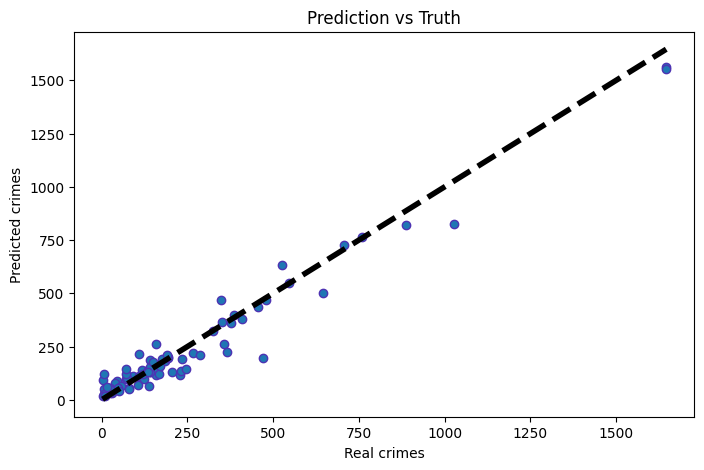

In [183]:
import matplotlib.pyplot as plt
# Let's plot predictions vs Truth for 'CRIMES'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crimes')
ax.set_ylabel('Predicted crimes')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

The model performed very good, it falls under the ideal category, although probably the reason for this is due 3 of the features are colinear with each other, creating some noise and it seems most of the features have great correlation with the target(this will be seen in the pearson heat map)

We did not use Lasso regularization to fix high variance, lasso is employed as a feature selection tool, as seen below.


In [184]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import Lasso

penalty_factor = [0.009, 0.09, 0.5, 3, 30]

for a in penalty_factor:
    lasso = Lasso(alpha=a, max_iter=int(10e5), tol=1e-4)   # Instantiate lasso regression
    lasso.fit(X_train, y_train)        # Fit the train data

    r2_train_score = lasso.score(X_train, y_train)   # Calculating R^2 score for train dataset
    y_pred = lasso.predict(X_test)       # Finding predictions of the model for test dataset
    r2_test_score = lasso.score(X_test, y_test)        # Calculating R^2 score for test dataset

    print('Penalty Factor:', a)
    print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
    print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
    print('Coefficients of Linear Model:', lasso.coef_, '\n')
    print('Intercept:', lasso.intercept_, '\n******************************')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+04, tolerance: 1.219e+03
  model = cd_fast.enet_coordinate_descent(


Penalty Factor: 0.009
R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 2.57257924e-01  1.05087144e+01  1.56513234e-01 -2.63485790e-02
 -4.00052687e-04  9.93600677e-03 -9.15388224e-03  1.97223722e-02
 -5.68624726e-01  1.62228846e-06] 

Intercept: 32.278316230328926 
******************************
Penalty Factor: 0.09
R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 2.57112893e-01  1.04996217e+01  1.56537424e-01 -2.63617133e-02
 -3.99013475e-04  7.44027701e-04 -0.00000000e+00  2.89474710e-02
 -5.66101469e-01  1.62228464e-06] 

Intercept: 32.17816580311808 
******************************
Penalty Factor: 0.5
R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9539 

Coefficients of Linear Model: [ 2.56378827e-01  1.04536028e+01  1.56659855e-01 -2.64281839e-02
 -3.93754238e-04  5.51439428e-04 -0.00000000e+00  2.93074907e-02
 -5.53328031e-01  1.62226

From lasso, Gun_offender_count is the one that seems will be the feature with nonzero weights at the end, I used different penalty factor(0.009, 0.09, 0.5, 3, 30)to see the weight transition to 0, and although i couldnt get many weights to become 0, it is noticeable that the weightsrelated to Gun_offender_count will be the last to turn 0.

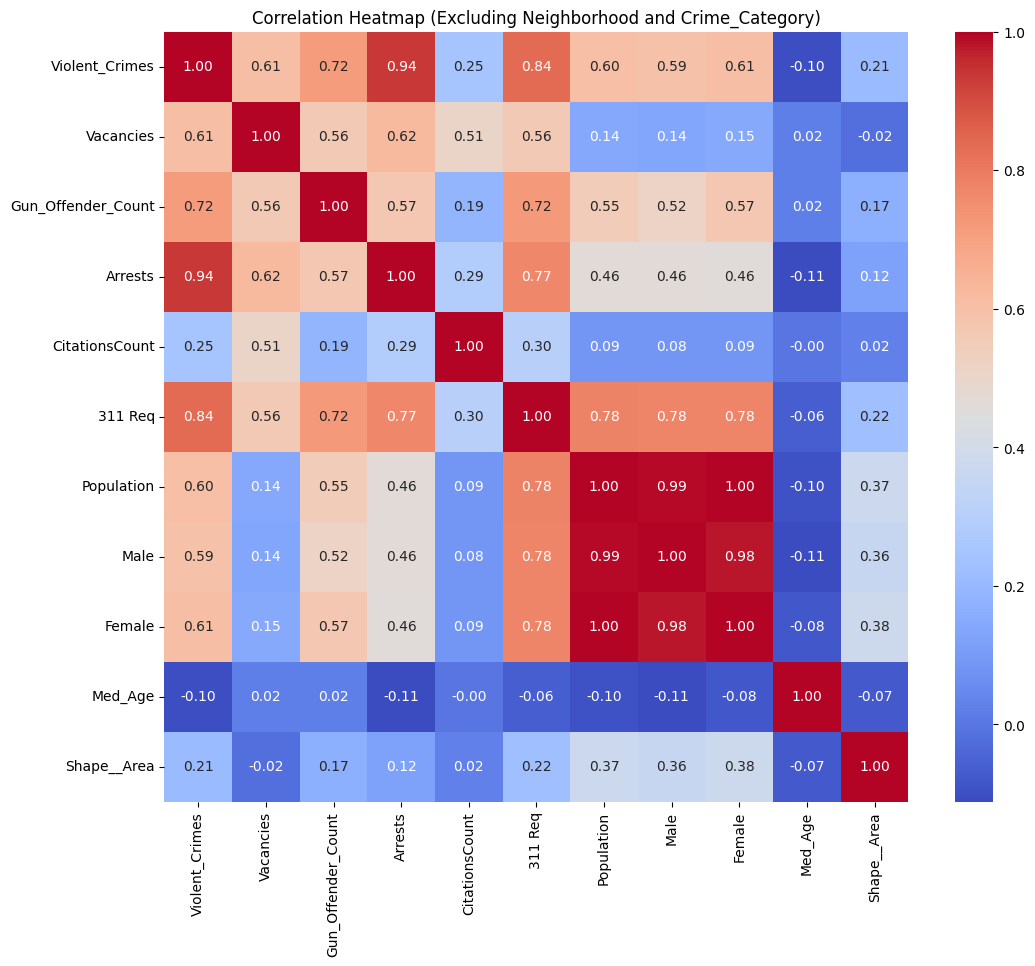

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Neighborhood' and 'Crime_Category' columns
df_numeric = df.drop(['Neighborhood', 'Crime_Category'], axis=1)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Neighborhood and Crime_Category)')
plt.show()



Ass seen above, population, male and female, are very correlated with each other, so it would not make much sense putting them individually. Ass seen in the first row, arrests, 311 request and Gun_Offender_Count are the ones that are higher correlated to our targe(violent_crimes)

We choose arrests, 311 request and Gun_Offender_Count due the fact that those were the ones with higher correlation related to the target in our Pearson correlation heat map. For lasso regression Gun_offender_count is the one with nonzero weights, That is the reason why we will use the three feature above to try to improve our regression.

In [186]:
X1 = df[['Arrests', '311 Req', 'Gun_Offender_Count']]  # Features
y1 = df['Violent_Crimes']  # Target

In [187]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=3)

In [189]:
reg = LinearRegression()         # Instantiate
reg.fit(X1_train, y1_train)        # Fit the train data
y1_pred = reg.predict(X1_test)     # Finding the predictions of the model for test dataset

r2_train_score = reg.score(X1_train, y1_train)   # Calculating R^2 score for train
r2_test_score = reg.score(X1_test, y1_test)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9197 

R^2 score for test dataset =  0.9522 

Coefficients of Linear Model: [1.46901263e-01 1.43537758e-03 1.15412747e+01] 

Intercept: 24.511323276540367


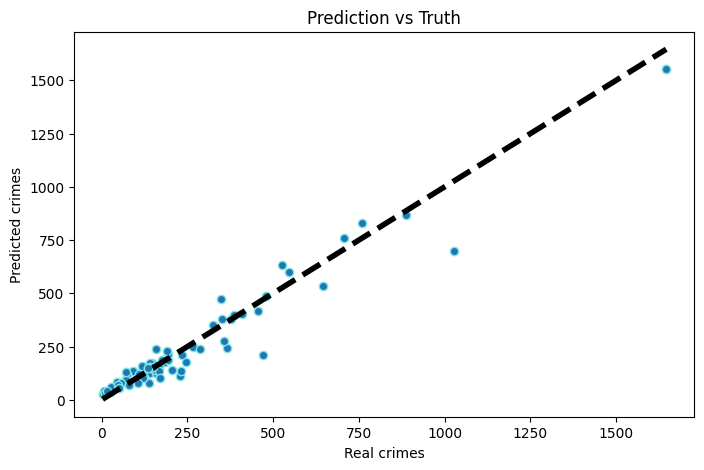

In [188]:
# Let's plot predictions vs Truth for 'CRIMES'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y1_test, y1_pred, edgecolors=(0.5, 0.9, 0.9))  # Scatter plot for predictions vs truth
ax.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crimes')
ax.set_ylabel('Predicted crimes')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

For this lionear regression our r^2 values are 0.9197 for the train and 0.9522 for the test data, the gap between these values grew compared to the last one, but my perception about this regression is that is a more consistent one due the fact we got rid of factor that might just had caused noise in the model like male, female and population.


### Quadratic regression

In [190]:
# Rename the features
renamed_df = df.rename(columns={
    'Vacancies': 'x1',
    'Gun_Offender_Count': 'x2',
    'Arrests': 'x3',
    'CitationsCount': 'x4',
    '311 Req': 'x5',
    'Population': 'x6',
    'Male': 'x7',
    'Female': 'x8',
    'Med_Age': 'x9',
    'Shape__Area': 'x10'

})

# Display the new DataFrame
renamed_df.head()

Neighborhood  Violent_Crimes    x1   x2      x3    x4     x5      x6  \
0              ABELL              96   2.0  2.0   280.0   3.0  15612   975.0   
1          ALLENDALE             338  29.0  9.0   889.0  10.0  40209  3354.0   
2            ARCADIA              72   0.0  1.0   346.0   6.0  15160  1077.0   
3          ARLINGTON             348  51.0  7.0  2226.0  27.0  27143  2163.0   
4  ARMISTEAD GARDENS             170   0.0  0.0   443.0   1.0   8528  3779.0   

       x7      x8         x9           x10  Crime_Category  
0   473.0   502.0  33.400002  2.033969e+06             0.0  
1  1489.0  1865.0  43.700001  1.195420e+07             1.0  
2   501.0   576.0  41.900002  6.301562e+06             0.0  
3  1034.0  1129.0  49.299999  5.034912e+06             1.0  
4  1822.0  1957.0  34.299999  1.345781e+07             0.0

In [191]:
renamed_df1 = renamed_df.drop(columns=['Neighborhood', 'Violent_Crimes','Crime_Category'])

In [192]:
def add_quadratic_monomials(renamed_df1):
    new_df = renamed_df1.copy()
    features = renamed_df1.columns
    for feature in features:
        squared_column_name = f"{feature}x2"
        new_df[squared_column_name] = renamed_df1[feature]
    return new_df

# Assuming df is the DataFrame with the features x1 to x9
new_df = add_quadratic_monomials(renamed_df1)


In [193]:
new_df

x1    x2      x3      x4      x5       x6      x7      x8         x9  \
0      2.0   2.0   280.0     3.0   15612    975.0   473.0   502.0  33.400002   
1     29.0   9.0   889.0    10.0   40209   3354.0  1489.0  1865.0  43.700001   
2      0.0   1.0   346.0     6.0   15160   1077.0   501.0   576.0  41.900002   
3     51.0   7.0  2226.0    27.0   27143   2163.0  1034.0  1129.0  49.299999   
4      0.0   0.0   443.0     1.0    8528   3779.0  1822.0  1957.0  34.299999   
5      3.0   3.0   240.0     2.0   24573   2243.0  1013.0  1230.0  46.700001   
6     12.0   7.0  3231.0    40.0   38143   3143.0  1660.0  1483.0  31.200001   
7     13.0   7.0  1323.0    21.0   36247   2692.0  1213.0  1479.0  35.099998   
8      0.0   0.0    69.0     7.0    6556    300.0   167.0   133.0  34.299999   
9      2.0   1.0   457.0    13.0   27386   2944.0  1496.0  1448.0  34.099998   
10     3.0   4.0   320.0    14.0   25799   4013.0  1820.0  2193.0  37.400002   
11    50.0  50.0  4199.0   182.0  182066  14680.0  6498.0  8182.0  38.599998   
12     1.0   0.0   247.0     4.0    6763    449.0   207.0   242.0  37.099998   
13     0.0   0.0    36.0     4.0    8152    706.0   288.0   418.0  41.799999   
14    50.0   9.0  1934.0    20.0   53804   3469.0  1556.0  1913.0  42.599998   
15    20.0   7.0   828.0     7.0   32790   2622.0  1166.0  1456.0  35.200001   
16     0.0   0.0    82.0     0.0    6745    637.0   307.0   330.0  46.900002   
17    52.0   1.0   855.0    25.0   19711    935.0   465.0   470.0  39.000000   
18     2.0   0.0   319.0     6.0   28181   5034.0  2218.0  2816.0  40.599998   
19    67.0   4.0   952.0    18.0   13263    516.0   255.0   261.0  36.299999   
20     0.0   0.0   213.0     5.0   17339   2356.0  1159.0  1197.0  32.000000   
21    11.0   4.0   609.0     2.0   19422   1679.0   762.0   917.0  39.700001   
22   371.0  13.0  5191.0  4431.0  109807   3376.0  1562.0  1814.0  39.000000   
23     2.0   0.0   548.0    13.0   16016   1971.0  1010.0   961.0  31.900000   
24    80.0  16.0  4842.0   104.0   93534   9549.0  4575.0  4974.0  31.600000   
25     4.0   0.0   233.0    18.0   14535   1582.0   750.0   832.0  45.299999   
26     0.0   3.0   126.0     4.0   13079   1310.0   560.0   750.0  44.400002   
27     8.0   1.0   798.0    22.0  126146  12725.0  6203.0  6522.0  34.400002   
28     0.0   0.0   231.0     1.0   10816    108.0    58.0    50.0  25.700001   
29    16.0   2.0   875.0    31.0   23634   1422.0   647.0   775.0  35.099998   
30     2.0   0.0   918.0     2.0    8903     27.0    15.0    12.0  34.500000   
31    31.0   3.0   406.0    26.0   17619   1241.0   548.0   693.0  37.000000   
32   312.0   8.0  4927.0   295.0   91042   2318.0  1151.0  1167.0  34.599998   
33     0.0   0.0    22.0     0.0    3926    626.0   302.0   324.0  45.200001   
34     3.0   5.0   270.0     0.0   21617   2524.0  1221.0  1303.0  40.000000   
35     0.0   6.0   400.0     3.0   20546   3168.0  1415.0  1753.0  39.200001   
36     5.0   1.0   344.0    10.0   10825   1097.0   522.0   575.0  46.099998   
37   171.0  22.0  4462.0   177.0   83378   4339.0  2007.0  2332.0  40.500000   
38     1.0   0.0  1290.0     8.0   21415   1085.0   613.0   472.0  40.099998   
39     2.0   2.0   513.0     7.0   38060   8749.0  4352.0  4397.0  28.500000   
40    40.0  16.0  2952.0     7.0   39116   7647.0  3181.0  4466.0  30.299999   
41     0.0   1.0    39.0     3.0   20684   7613.0  3578.0  4035.0  31.900000   
42     0.0   2.0    82.0     0.0   13201   1247.0   577.0   670.0  43.400002   
43     1.0   0.0  1028.0     0.0    8986     16.0     9.0     7.0  43.000000   
44     0.0   1.0    43.0     0.0    5826   1108.0   556.0   552.0  52.700001   
45   158.0  16.0  3448.0   348.0  104465   5638.0  2618.0  3020.0  38.799999   
46     8.0   1.0   380.0    12.0   11120   1141.0   553.0   588.0  41.099998   
47    87.0  12.0   900.0    45.0   39869   1845.0   807.0  1038.0  39.299999   
48     1.0   0.0    39.0     0.0   21277   5305.0  2476.0  2829.0  33.200001   
49     0

In [194]:
X2 = new_df # Features
y2 = renamed_df['Violent_Crimes']  # Target

In [195]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=3)

In [196]:
reg = LinearRegression()         # Instantiate
reg.fit(X2_train, y2_train)        # Fit the train data
y2_pred = reg.predict(X2_test)     # Finding the predictions of the model for test dataset

r2_train_score = reg.score(X2_train, y2_train)   # Calculating R^2 score for train
r2_test_score = reg.score(X2_test, y2_test)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9324 

R^2 score for test dataset =  0.9538 

Coefficients of Linear Model: [ 1.28637015e-01  5.25486153e+00  7.82552744e-02 -1.31735615e-02
 -2.00083941e-04  5.07350779e-03 -4.68036302e-03  9.75387081e-03
 -2.84452735e-01  8.10830947e-07  1.28637015e-01  5.25486153e+00
  7.82552744e-02 -1.31735615e-02 -2.00083941e-04  5.07350779e-03
 -4.68036302e-03  9.75387080e-03 -2.84452735e-01  8.11457805e-07] 

Intercept: 32.2894604679079


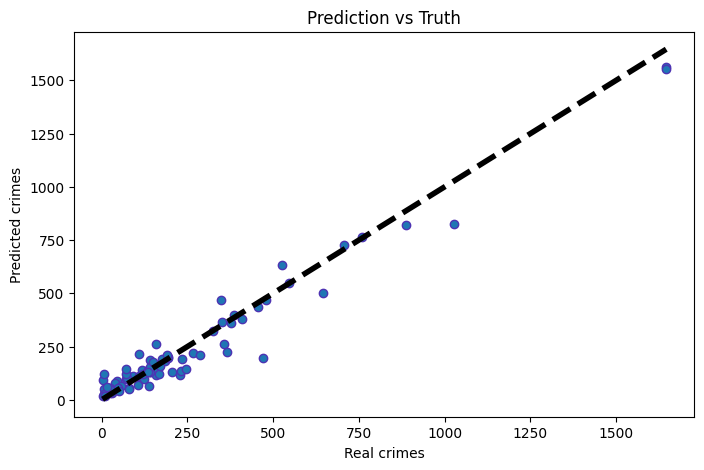

In [197]:
# Let's plot predictions vs Truth for 'CRIMES'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y2_test, y2_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crimes')
ax.set_ylabel('Predicted crimes')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

The cuadratic regression came out as the first linear regression.
Quadratic regression:
R^2 score for train dataset = 0.9324
R^2 score for test dataset = 0.9538
It is important to say that all features were used, to see any important change related to our original linear regression

### Tree regressor

In [198]:
# Drop 'Neighborhood' and 'Crime_Category' columns
df.drop(['Neighborhood', 'Crime_Category'], axis=1, inplace=True)

# Move 'Violent_Crimes' column to the last position
cols = df.columns.tolist()
cols.remove('Violent_Crimes')
cols.append('Violent_Crimes')
df = df[cols]


In [199]:
 # Defining the features and the target
X = df[['Vacancies', 'Gun_Offender_Count', 'Arrests', 'CitationsCount', '311 Req', 'Population', 'Male', 'Female','Med_Age', 'Shape__Area']]  # Features
y = df['Violent_Crimes']  # Target

In [200]:
# Importing 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor
tr_reg = DecisionTreeRegressor() # Instantiating the tree regressor
tr_reg.fit(X, y) # Fitting the data

DecisionTreeRegressor()

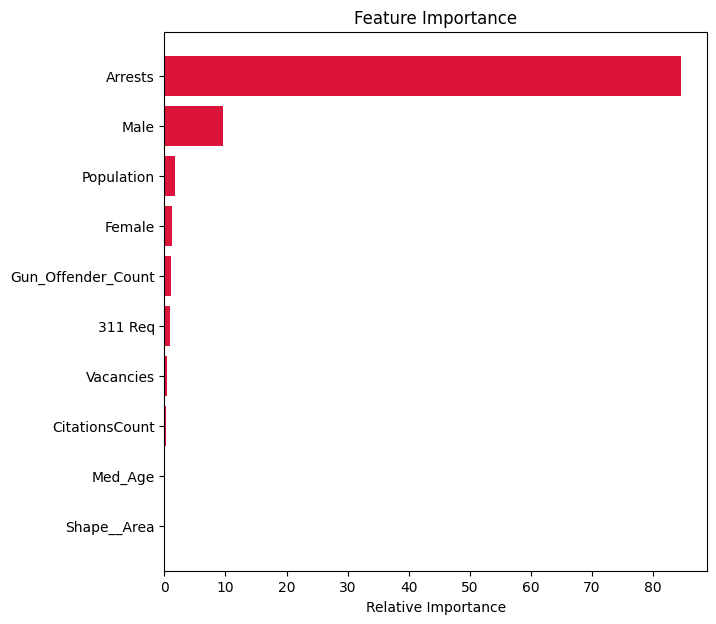

In [201]:
# Calculating the feature importance
feature_importance = tr_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
# Displaying feature importance through bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, df.columns[:-1][sorted_idx])
plt.show()

For tree regressor feature importance calculation we got arrests as the most important one, followed by female, it is neccessary to mention that the there is a big gap betwen the most important and the second mos timportant feature. Arrest as seen here and in the two other feature selection algorithm, seems to be of big importance to predict our target.

In [202]:
 # Defining the features and the target
X = df[['Arrests', 'Female']]  # Features
y = df['Violent_Crimes']  # Target

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

In [204]:
# Constructing a tree regressor
tr_reg = DecisionTreeRegressor()
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [205]:
# Finding the predictions of the tree regressor for train and test subsets
train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [206]:
r2_train_score = tr_reg.score(X_train, y_train) # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test) # Calculating R^2 score for test
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  1.0 

R^2 score for test dataset =  0.8788 



In [207]:
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [208]:
# Using 'GridSearchCV' to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=3),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [209]:
# Displaying the best parameters

grid_search_cv.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=14, random_state=3)

In [210]:
# Retraining the tree regressor with the best hyperparameters

tr_reg = DecisionTreeRegressor(max_leaf_nodes=14, random_state=3)
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=14, random_state=3)

In [211]:
# Finding the predictions of the latter tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [212]:
r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.975 

R^2 score for test dataset =  0.896 



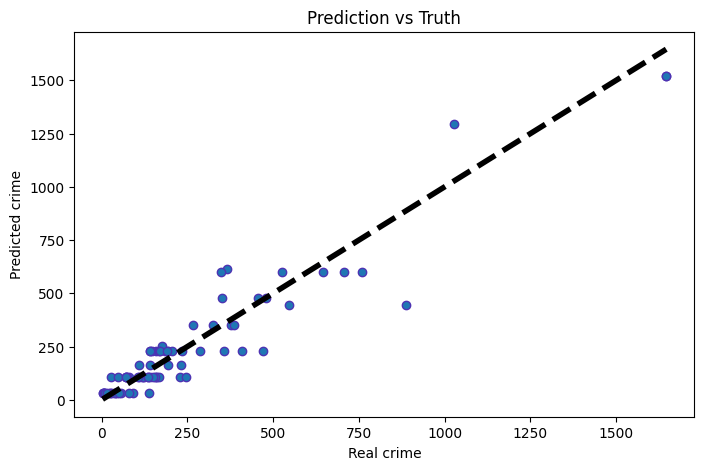

In [213]:
# Let's plot predictions vs ground truth for 'PRICE'

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, test_y_pred, edgecolors=(0.3, 0.2, 0.7))  # Scatter plot for predictions vs truth
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Draw line y=x

ax.set_xlabel('Real crime')
ax.set_ylabel('Predicted crime')
plt.title('Prediction vs Truth', fontdict=None, loc='center')
plt.show()

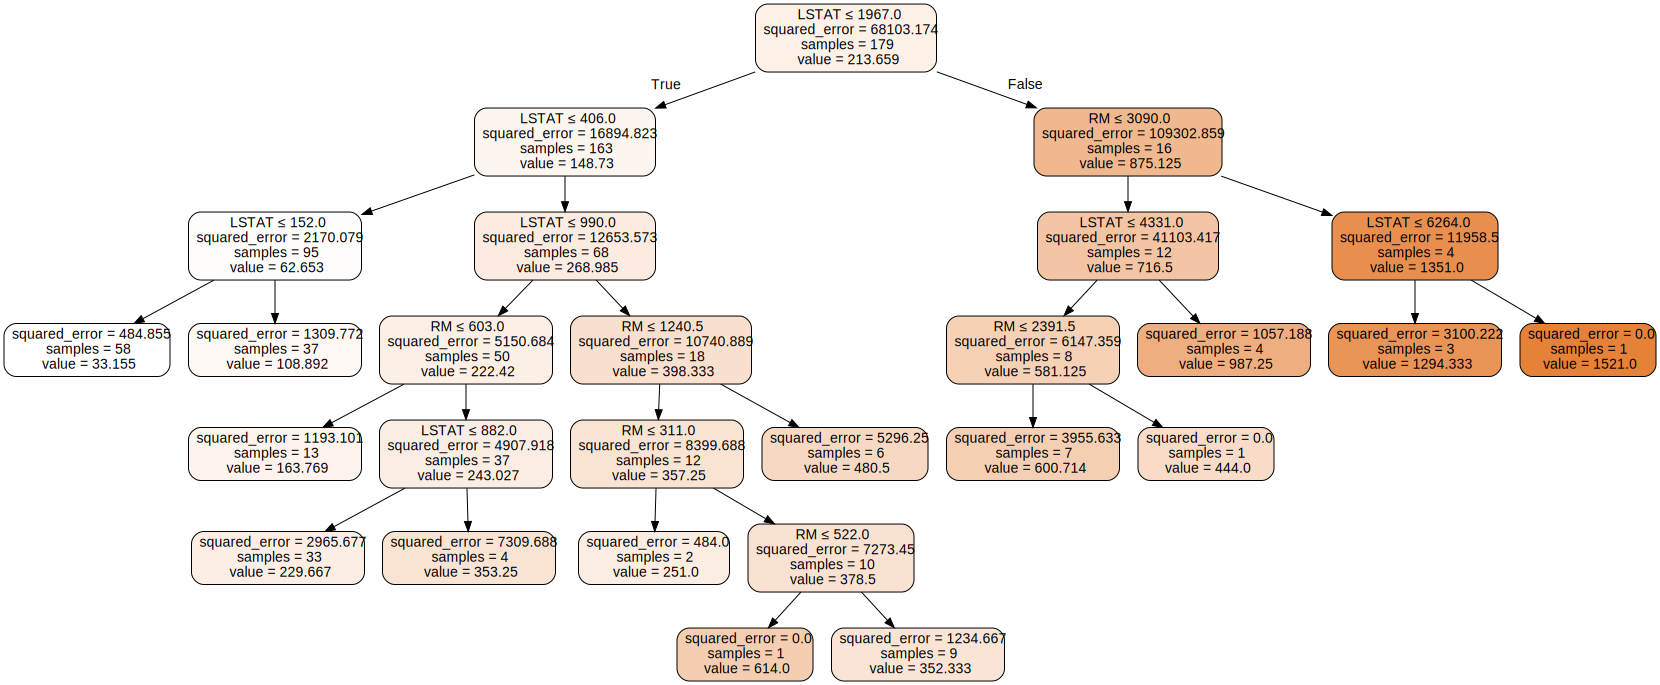

In [214]:
# Displaying the tree graph

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tr_reg, out_file=None,
                      feature_names=["LSTAT", "RM"],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)

graph

For our tree regressor:
R^2 score for train dataset = 1.0
R^2 score for test dataset = 0.9031
High variance
Tree regressor after ideal tree parameters:
R^2 score for train dataset = 0.975
R^2 score for test dataset = 0.896
High variance
As we can see both R^2 have some kind of variance in them, which probably is not high, but it is higher compared to the other R^2's. I would trust the linear regression model with the selected features more, because of the type of features we are working with(continous features and targets). There is still a lot to say related to the ideal feature, and this will depend on the other models we will try in this project.


## Clustering

In [215]:
import pandas as pd
data = pd.read_csv('/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv')

In [216]:
data.head()

Neighborhood  Violent_Crimes  Vacancies  Gun_Offender_Count  Arrests  \
0              ABELL              96        2.0                 2.0    280.0   
1          ALLENDALE             338       29.0                 9.0    889.0   
2            ARCADIA              72        0.0                 1.0    346.0   
3          ARLINGTON             348       51.0                 7.0   2226.0   
4  ARMISTEAD GARDENS             170        0.0                 0.0    443.0   

   CitationsCount  311 Req  Population    Male  Female    Med_Age  \
0             3.0    15612       975.0   473.0   502.0  33.400002   
1            10.0    40209      3354.0  1489.0  1865.0  43.700001   
2             6.0    15160      1077.0   501.0   576.0  41.900002   
3            27.0    27143      2163.0  1034.0  1129.0  49.299999   
4             1.0     8528      3779.0  1822.0  1957.0  34.299999   

    Shape__Area  Crime_Category  
0  2.033969e+06             0.0  
1  1.195420e+07             1.0  
2  6.301562e+06             0.0  
3  5.034912e+06             1.0  
4  1.345781e+07             0.0

### K-Means

In [217]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the data
data_path = '/content/drive/Shareddrives/602 project /Nei_Violent_Crime.csv'
data = pd.read_csv(data_path)

#all numerical columns
data_numerical = data.drop('Neighborhood', axis=1)

# Data scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Applying K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

# Evaluation
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_clusters)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_clusters)

print("K-means Silhouette Score:", kmeans_silhouette)
print("K-means Calinski-Harabasz Index:", kmeans_calinski)
print("K-means Davies-Bouldin Index:", kmeans_davies)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.3889935966231469
K-means Calinski-Harabasz Index: 104.15128810689951
K-means Davies-Bouldin Index: 1.2909632079304085


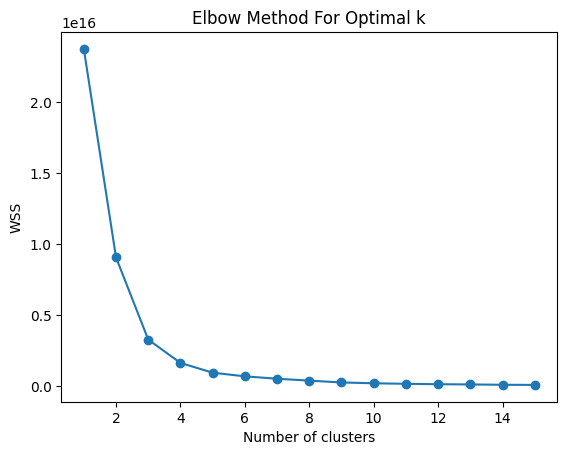

In [218]:

import matplotlib.pyplot as plt
# Elbow Method to determine 'n_clusters'
wss = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(data_numerical)
    wss.append(km.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 16), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method For Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.6447432656229275
K-means Calinski-Harabasz Index: 1141.533409695041
K-means Davies-Bouldin Index: 0.4387695008886071


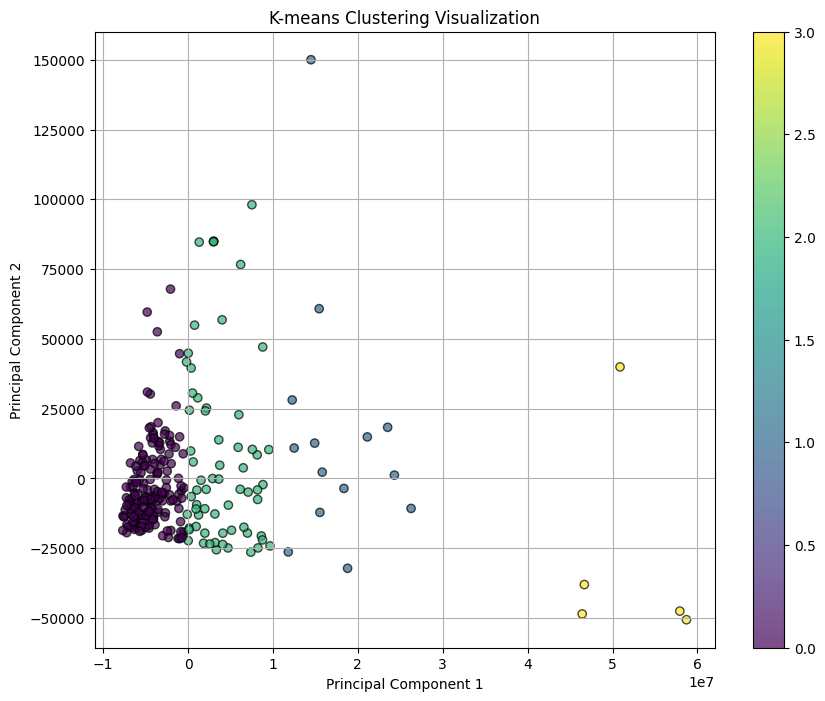

In [219]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Applying K-means
kmeans = KMeans(n_clusters=4, random_state=42)  # Choosing clusters based your previous output
kmeans_clusters = kmeans.fit_predict(data_numerical)

# Evaluation
kmeans_silhouette = silhouette_score(data_numerical, kmeans_clusters)
kmeans_calinski = calinski_harabasz_score(data_numerical, kmeans_clusters)
kmeans_davies = davies_bouldin_score(data_numerical, kmeans_clusters)

print("K-means Silhouette Score:", kmeans_silhouette)
print("K-means Calinski-Harabasz Index:", kmeans_calinski)
print("K-means Davies-Bouldin Index:", kmeans_davies)

# Reducing data to 2 dimensions using PCA for visualization purposes
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_numerical)

# Scatter plot of the first two principal components, colored by cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_clusters, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.grid(True)
plt.show()


The clustering is well-separated and cohesive clusters, as indicated by the metrics.

In [220]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

# Evaluation
dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "Only one cluster"
dbscan_calinski = calinski_harabasz_score(data_scaled, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "Only one cluster"
dbscan_davies = davies_bouldin_score(data_scaled, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else "Only one cluster"

print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Calinski-Harabasz Index:", dbscan_calinski)
print("DBSCAN Davies-Bouldin Index:", dbscan_davies)


DBSCAN Silhouette Score: -0.18775062546231966
DBSCAN Calinski-Harabasz Index: 10.608059088476617
DBSCAN Davies-Bouldin Index: 1.8170244518440632


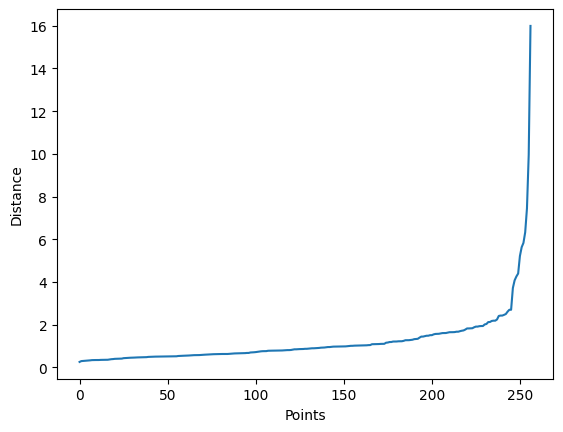

In [221]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Nearest Neighbors to help determine 'eps'
nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = nearest_neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)
distances = np.sort(distances[:,3], axis=0)

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

# Apply DBSCAN with chosen 'eps' and 'min_samples'
dbscan = DBSCAN(eps=0.5, min_samples=5)  # adjust these values based on your observations
dbscan_clusters = dbscan.fit_predict(data_scaled)


 ***Hierarchical***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical Silhouette Score: 0.4010041026790158
Hierarchical Calinski-Harabasz Index: 99.7071586170763
Hierarchical Davies-Bouldin Index: 1.2120372849643555


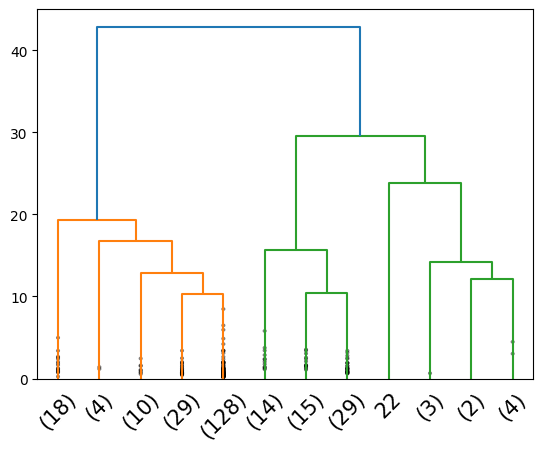

In [222]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)


# Generating the linkage matrix and plotting the dendrogram
Z = linkage(data_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

# Applying Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(data_scaled)

# Evaluation
agg_silhouette = silhouette_score(data_scaled, agg_clusters)
agg_calinski = calinski_harabasz_score(data_scaled, agg_clusters)
agg_davies = davies_bouldin_score(data_scaled, agg_clusters)

print("Hierarchical Silhouette Score:", agg_silhouette)
print("Hierarchical Calinski-Harabasz Index:", agg_calinski)
print("Hierarchical Davies-Bouldin Index:", agg_davies)


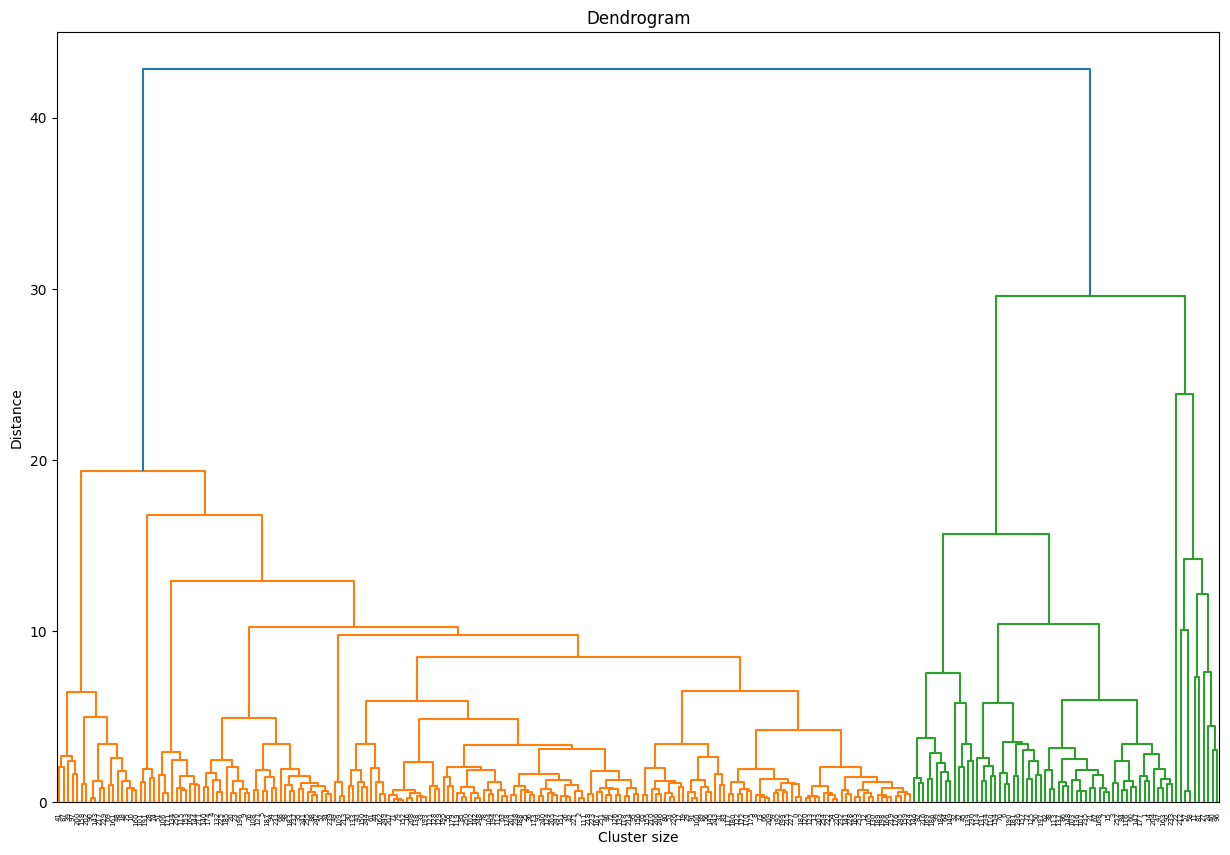

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [223]:
# Plotting a detailed dendrogram to help choose 'n_clusters'
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_scaled, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

# Apply Hierarchical Clustering with chosen parameters
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(data_scaled)


The dendrogram showa two major cluster groups orange and green with the green group showing significant dissimilarity from others  by the long vertical distance before merging.

#Conclusion

Joseph


What model (out of the ones above) are best suited to answer the question of 'What are the features that lead to a high rate of violent crime within a neighborhood in Baltimore from 2010 to 2020?'

Neural networks and regression are the models we are most confident. Regression is a very simple way to see how features effect a continuous target variable (without having to complicate things). This could be good for a preliminary search into what features you should consider when looking at high crime neighborhoods. Neural networks, on the otherhand, would be more complex, but may be able to capture a bigger portion of unseen data. This would help increase our models performance when looking at high crime neighborhoods that don't always follow linear regression trends.

What are the takeaways from these models?bold text

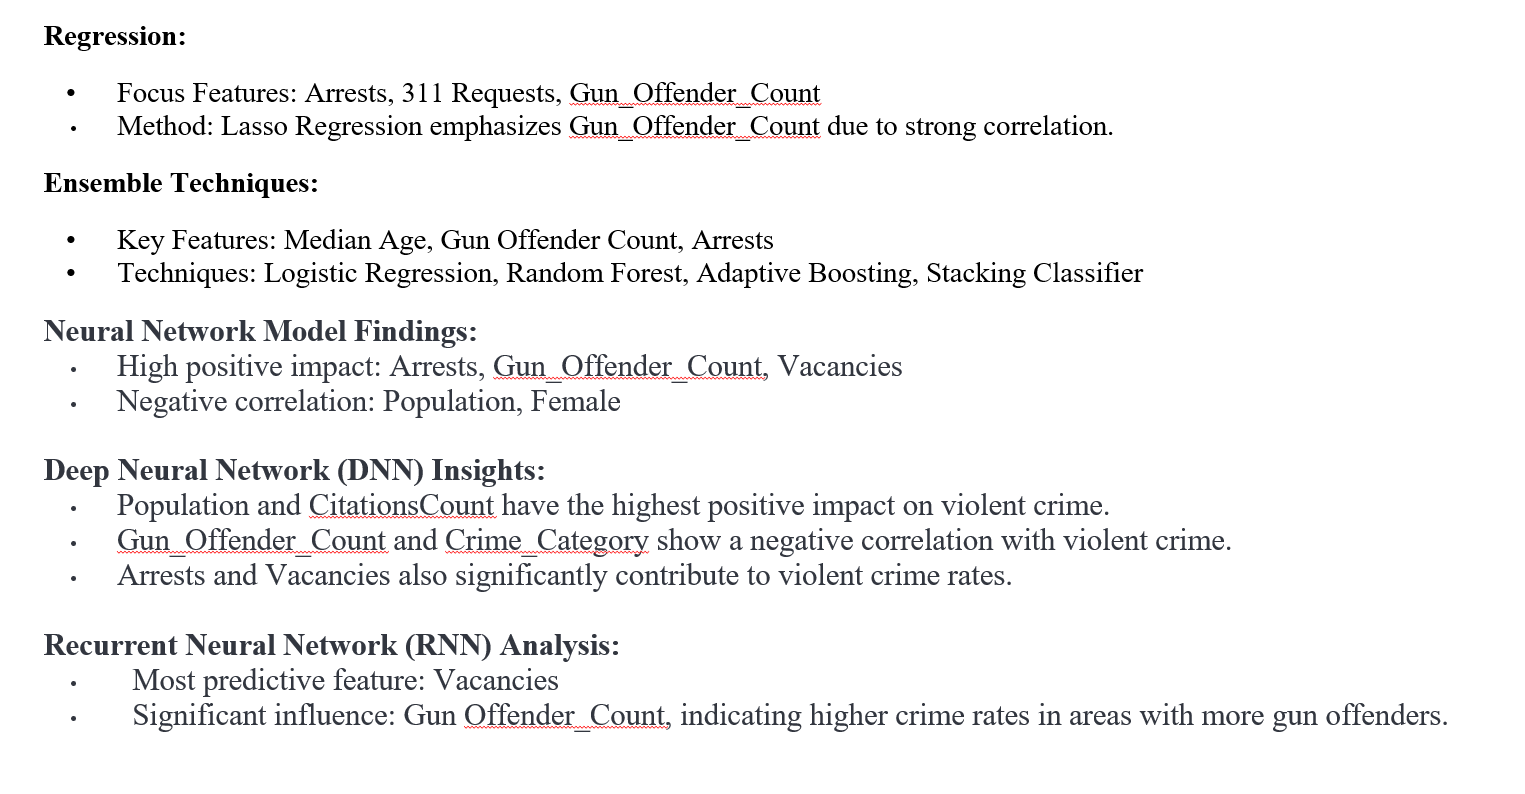

Overall, Arrests and gun offender count were very common significant features throughout our project. This would make sense intuitvely because, as stated in previous sections, one or more arrests happen for a majority of crimes committed. In addition, a lot of violent crimes occurr with a gun, so it would make sense it has a high impact on if a neighborhood is high crime or not.

Solutions: Obviously, reducing of the number of arrests may not result in a reduction of crime. Some could argue that policing more attentively (increase in arrests) could reduce crime to a certain point. Arrests is a difficult feature to solve.

Alternatively, some solutions that may help to reduce the number of high crime neighborhoods within Baltimore would be to reduce the number of guns within the city, demolish vacant buildings, sending violent offenders to prison, have more after school programs for high schools,or incentivize people to move out of the city.

I would say based on our project, reducing illegal guns in the city should be the main focus when attempting to reduce crime within Baltimore.